# AutoML using H2O_by_Sohni Rais_002830773

This assignment will focus on Node 4 of the simple analysis sequence.

Answer the following questions for all of the models:

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

# Abstract

I am going do AutoML (H2O) with Campus Recruitment. First we will commit some mistakes and see how important is to check the output. I have tried to do all the explainations of output and codes. We will first check with GLM and GBM methods and then AutoML.

# About Dataset

This dataset provides a comprehensive exploration of the placement data of students from XYZ campus, serving as a critical tool in understanding the determinants of successful job placements in a higher education context. The dataset intricately compiles key educational and professional parameters, offering a multi-dimensional view into the journey from academia to employment.
Key components of the dataset include:
    
**Secondary and Higher Secondary Education Data**: Capturing percentages and specializations at both secondary and higher secondary levels, this aspect of the dataset offers insight into early academic trajectories of students.

**Degree Specialization and Type**: Detailing students' specializations in their tertiary education, and the types of degrees pursued, this section provides a nuanced understanding of higher education choices and their potential impact on employability.

**Work Experience**: Including data on prior work experience, the dataset allows for analysis of how practical, real-world experience influences placement outcomes.

**Salary Offers**: For students who successfully secure placements, the dataset includes the salary packages offered, shedding light on the economic returns of various educational pathways and experiences.

This dataset is pivotal for educational institutions, policy makers, researchers, and students themselves in comprehending the intricate dynamics between academic background, work experience, and successful placement. It stands as a valuable resource for analyzing trends, identifying key factors that contribute to employability, and shaping future educational and career guidance strategies.

# About this file

The dataset contains the following attributes for each entry:

sl_no: Serial Number

gender: Gender of the student (M or F)

ssc_p: Secondary Education percentage - 10th Grade

ssc_b: Board of Education - 10th Grade (Others or Central)

hsc_p: Higher Secondary Education percentage - 12th Grade

hsc_b: Board of Education - 12th Grade (Others or Central)

hsc_s: Specialization in Higher Secondary Education (Commerce, Science, Arts)

degree_p: Degree percentage

degree_t: Type of degree (Sci&Tech, Comm&Mgmt, etc.)

workex: Work experience (Yes or No)

etest_p: E-test percentage

specialisation: MBA specialization (Mkt&HR, Mkt&Fin)

mba_p: MBA percentage

status: Placement status (Placed or Not Placed)

salary: Salary offered to the placed students (NaN for students not placed)

# Classifying dependent and independent variables

In the context of this dataset, the classification of dependent and independent variables depends on the objective of the analysis or the predictive model you are considering. Generally, the dependent variable is the outcome you're trying to predict or explain, and the independent variables are the predictors or factors you're using to make that prediction.

### Dependent Variables
**status**: Placement status (Placed or Not Placed). This can be a dependent variable if the objective is to predict whether a student gets placed.
**salary**: Salary offered to the placed students. This can be a dependent variable if the objective is to predict the salary of placed students. Note that this variable only applies to students who are placed.

### Independent Variables
**gender**: Gender of the student (M or F). May influence placement status or salary.

**ssc_p**: Secondary Education percentage - 10th Grade. Academic performance could be a predictor of placement success.

**ssc_b**: Board of Education - 10th Grade (Others or Central). The educational board may have an indirect impact.

**hsc_p**: Higher Secondary Education percentage - 12th Grade. Academic performance could be a predictor of placement success.

**hsc_b**: Board of Education - 12th Grade (Others or Central). The educational board may have an indirect impact.

**hsc_s**: Specialization in Higher Secondary Education (Commerce, Science, Arts). The field of study might influence the type of placements.

**degree_p**: Degree percentage. Academic performance in higher education could predict placement success.

**degree_t**: Type of degree (Sci&Tech, Comm&Mgmt, etc.). Certain degree types may be more in demand in the job market.

**workex**: Work experience (Yes or No). Previous work experience could significantly influence placement outcomes.

**etest_p**: E-test percentage. Performance in employment tests could be a predictor of placement success.

**specialisation**: MBA specialization (Mkt&HR, Mkt&Fin). The area of specialization might affect the type of roles students are placed in.

**mba_p**: MBA percentage. Academic performance in MBA could predict placement success.

In statistical modeling or machine learning, "salary" is often considered a dependent variable only for those instances where the student is placed, and a separate model might be needed to first predict placement status before predicting salary.

In [213]:
!pip install opendatasets

I have installed opendatasets above just to retrive the data from kaggle and this is not necessary step this can be ignored because we have to import files through h2o module in this assignment/file.

In [214]:
!pip install h2o

Here I have installed h2o to perform various functions present in h2o module.

In [215]:
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

In [216]:
import pandas as pd
import seaborn as sns

In [217]:
# Load the dataset
file_path = 'https://raw.githubusercontent.com/raiss15/Sohni_datascience/main/Placement_Data_Full_Class.csv'
data = pd.read_csv(file_path)

In [218]:
data.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

# Correlation for dataset

# Carefully observing the correlation in order to check the multicollinearity,

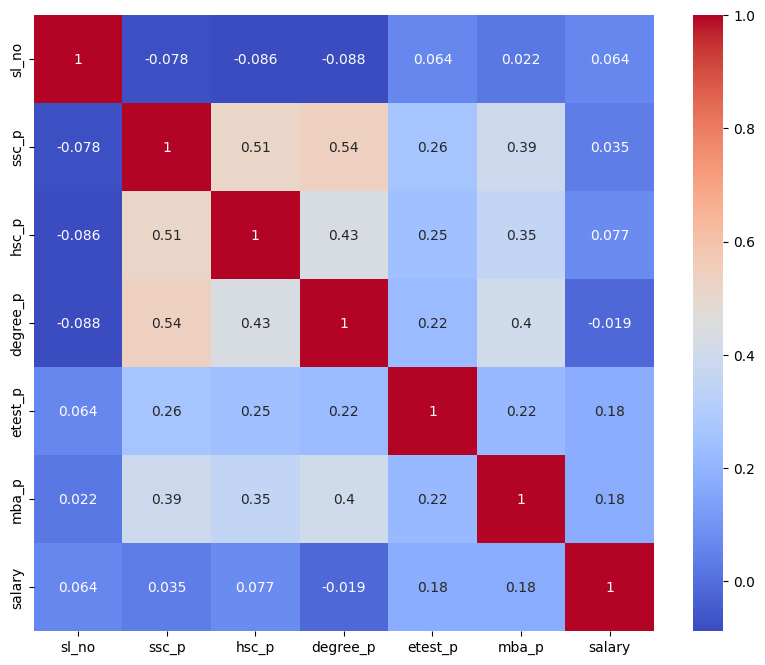

In [219]:
import matplotlib.pyplot as plt

# Load the dataset
data_for_corr = pd.read_csv(file_path)

# Select only numeric columns for correlation
numeric_data = data_for_corr.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Based on the heatmap image, few observation derived:

1. **Diagonal Values**: The diagonal of the heatmap is filled with `1`s, which is expected as each variable is perfectly correlated with itself.

2. **High Positive Correlation**: There are a few pairs of variables that show a relatively high positive correlation, which are indicated by warmer colors (reds). For instance:
   - `hsc_p` (Higher Secondary percentage) and `ssc_p` (Secondary School percentage) have a correlation of 0.51.
   - `degree_p` (Degree percentage) has a correlation of 0.54 with `ssc_p` and 0.43 with `hsc_p`.
   - These indicate that students who perform well in secondary school tend to also perform well in higher secondary and their degree.

3. **Low to Moderate Correlations**: Many of the variables exhibit low to moderate correlations with each other as seen by the mix of lighter blues and reds.

4. **Negative Correlations**: There are negative correlations observed but they are weak as indicated by the light blue color. For example:
   - `etest_p` (Employment test percentage) seems to have a slight negative correlation with `ssc_p` and `hsc_p`, which might suggest that the scores in employment tests are not strongly related to academic performance in school.

5. **No Strong Negative Correlations**: It's noticeable that there are no strong negative correlations present in the dataset (no dark blue squares).

6. **Salary Correlations**: The variable `salary` does not show a strong correlation with any of the academic performance indicators (`ssc_p`, `hsc_p`, `degree_p`, `etest_p`, `mba_p`). The highest correlation with salary is 0.22 with `degree_p`, suggesting that out of the academic metrics, the degree percentage has the most influence on the salary, albeit still a weak one.

These observations could be used to derive insights into the relationships between academic performances at different stages and their potential impact on employment test performance and salaries. However, it's important to remember that correlation does not imply causation, and further statistical analysis would be needed to understand the underlying causes of these relationships.

In [220]:
data_for_corr

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1     Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2    Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4    Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  
..         ...    ...      ...            ...    ...         ...       ...  
210  Comm&Mgmt     No     91.0        Mkt&Fin  74.49      Placed  400000.0  
211   Sci&Tech     No     74.0        Mkt&Fin  53.62      Placed  275000.0  
212  Comm&Mgmt    Yes     59.0        Mkt&Fin  69.72      Placed  295000.0  
213  Comm&Mgmt     No     70.0         Mkt&HR  60.23      Placed  204000.0  
214  Comm&Mgmt     No     89.0         Mkt&HR  60.22  Not Placed       NaN  

[215 rows x 15 columns]

Initialising the h2o with init function

From here the h2o ML algorithm begin ,and we will take care of importing dataset files through h2o and not via pandas.

In [221]:
#Connect to a cluster or initialize it if not started
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_us_zfzb
  JVM stdout: /tmp/tmp_us_zfzb/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_us_zfzb/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_uajlu5
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Observations from the output of the H2O machine learning algorithm:

1. **H2O Initialization**: The H2O machine learning platform has been successfully initialized within the Python environment. This is shown by the output line "Connecting to H2O server at http://127.0.0.1:54321 ... successful."

2. **H2O Server Details**:
   - **Cluster Uptime**: The H2O cluster has been up for a very short time, indicated as 04 seconds.
   - **Timezone**: The cluster's timezone is set to Coordinated Universal Time (UTC).
   - **Version**: The H2O cluster is running version 3.44.0.3, which is likely to be a recent version as of the time of the screenshot.
   - **Instance Age**: The instance has been running for 1 month and 20 days, which may be indicative of the age of the H2O software installation or the age of the virtual machine/environment it's running on.

3. **System Resources**:
   - **Total Nodes**: The cluster consists of a single node (a common setup for a local instance).
   - **Memory**: The node has 3.17 GB of free memory available to it.
   - **Total Cores**: There are two cores available to the H2O cluster.
   - **Allowed Cores**: Two cores are also allowed for the H2O cluster operations.

4. **Cluster Status**: The cluster status is "locked, healthy," which indicates that it is in a stable state and not currently undergoing any changes that would prevent operations.

5. **Connection URL**: The local URL for the H2O server is "http://127.0.0.1:54321", which is the default address for a local server. This indicates that the server is running on the local machine where the Jupyter notebook is being executed.

6. **Python Version**: The Python version being used is 3.10.12, which is relatively up-to-date with respect to Python releases.

The information provided is typical of a successful initialization of an H2O cluster and indicates that the environment is ready for the user to proceed with data import and model training using H2O's functionalities.

In [222]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

The provided code is a conditional setup for the plotting mode in `matplotlib`, which is a plotting library in Python:

1. **Interactive Mode Setting**: The variable `interactive` is set to `True`, which indicates that the user desires interactive plotting. Interactive plots allow for features like zooming and updating in real-time, which are useful during exploratory data analysis in a Jupyter notebook or a similar interactive environment.

2. **Condition Check**: The `if not interactive:` statement checks whether `interactive` is `False`. If `interactive` were set to `False`, the code inside the conditional block would be executed.

3. **Non-Interactive Backend**: When `interactive` is `False`, the line `matplotlib.use('Agg', warn=False)` is run. This sets the `matplotlib` backend to 'Agg', which is a non-interactive backend that is suitable for generating plot files to save on disk. The `warn=False` parameter suppresses warnings that might occur when changing the backend.

4. **Import Statement**: Regardless of the value of `interactive`, the `matplotlib.pyplot` module is imported as `plt`. This module is commonly used for creating figures and plotting data.

In summary, this code is configuring `matplotlib` to either be in an interactive mode if `interactive` is `True`, or to use the 'Agg' backend for non-interactive, file-saving purposes if `interactive` is `False`. The `import matplotlib.pyplot as plt` line is necessary for plotting tasks and is included outside of the conditional block because it is needed in both interactive and non-interactive scenarios.

The h2o.import_file function is typically used to load a dataset into the H2O.ai environment for further analysis and machine learning tasks

In [223]:
## Please check we are importing dataset with H2O and not Pandas
data = h2o.import_file(file_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [224]:
data

sl_no  gender      ssc_p  ssc_b      hsc_p  hsc_b    hsc_s       degree_p  degree_t    workex      etest_p  specialisation      mba_p  status        salary
-------  --------  -------  -------  -------  -------  --------  ----------  ----------  --------  ---------  ----------------  -------  ----------  --------
      1  M           67     Others     91     Others   Commerce       58     Sci&Tech    No            55     Mkt&HR              58.8   Placed        270000
      2  M           79.33  Central    78.33  Others   Science        77.48  Sci&Tech    Yes           86.5   Mkt&Fin             66.28  Placed        200000
      3  M           65     Central    68     Central  Arts           64     Comm&Mgmt   No            75     Mkt&Fin             57.8   Placed        250000
      4  M           56     Central    52     Central  Science        52     Sci&Tech    No            66     Mkt&HR              59.43  Not Placed       nan
      5  M           85.8   Central    73.6   Central  Commerce       73.3   Comm&Mgmt   No            96.8   Mkt&Fin             55.5   Placed        425000
      6  M           55     Others     49.8   Others   Science        67.25  Sci&Tech    Yes           55     Mkt&Fin             51.58  Not Placed       nan
      7  F           46     Others     49.2   Others   Commerce       79     Comm&Mgmt   No            74.28  Mkt&Fin             53.29  Not Placed       nan
      8  M           82     Central    64     Central  Science        66     Sci&Tech    Yes           67     Mkt&Fin             62.14  Placed        252000
      9  M           73     Central    79     Central  Commerce       72     Comm&Mgmt   No            91.34  Mkt&Fin             61.29  Placed        231000
     10  M           58     Central    70     Central  Commerce       61     Comm&Mgmt   No            54     Mkt&Fin             52.21  Not Placed       nan
[215 rows x 15 columns]

In [225]:
# Data exploration and munging. Generate scatter plots

def scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/data.nrow]
    df_py = h2o.as_list(df_subset)

    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")

    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()

The `scatter_plot` function visualizes relationships between two variables in datasets managed by the H2O machine learning framework, catering to both numerical and categorical data. It begins by optionally fitting a linear regression model to the data if requested, using the `H2OGeneralizedLinearEstimator` for a Gaussian distribution. To manage large datasets and maintain clarity in the visualization, it limits the number of plotted points to a maximum specified by the `max_points` parameter, defaulting to 1000. This is achieved by randomly selecting a subset of data points.

The data is then converted from H2O's format to a Pandas DataFrame, enabling the use of common Python plotting libraries. For categorical `x` variables, a box-and-whisker plot is generated, while numerical `x` variables result in a scatter plot. If a linear model was fitted, the function also overlays a regression line to illustrate the linear relationship between the variables, providing insights into the trend within the data. This functionality makes `scatter_plot` a flexible tool for initial data exploration and visualization in H2O-based machine learning projects.

In [226]:
data.describe()

Rows:215
Cols:15

sl_no              gender    ssc_p               ssc_b    hsc_p              hsc_b    hsc_s     degree_p           degree_t    workex    etest_p             specialisation    mba_p              status      salary
-------  -----------------  --------  ------------------  -------  -----------------  -------  --------  -----------------  ----------  --------  ------------------  ----------------  -----------------  ----------  -----------------
type     int                enum      real                enum     real               enum     enum      real               enum        enum      real                enum              real               enum        int
mins     1.0                          40.89                        37.0                                  50.0                                     50.0                                  51.21                          200000.0
mean     108.0                        67.3033953488373             66.33316279069764                     66.37018604651166                        72.10055813953488                     62.27818604651161              288655.4054054054
maxs     215.0                        89.4                         97.7                                  91.0                                     98.0                                  77.89                          940000.0
sigma    62.20932405998316            10.827205398231454           10.89750915750298                     7.358743287339445                        13.275956401653826                    5.833384580683803              93457.45241958876
zeros    0                            0                            0                                     0                                        0                                     0                              0
missing  0                  0         0                   0        0                  0        0         0                  0           0         0                   0                 0                  0           67
0        1.0                M         67.0                Others   91.0               Others   Commerce  58.0               Sci&Tech    No        55.0                Mkt&HR            58.8               Placed      270000.0
1        2.0                M         79.33               Central  78.33              Others   Science   77.48              Sci&Tech    Yes       86.5                Mkt&Fin           66.28              Placed      200000.0
2        3.0                M         65.0                Central  68.0               Central  Arts      64.0               Comm&Mgmt   No        75.0                Mkt&Fin           57.8               Placed      250000.0
3        4.0                M         56.0                Central  52.0               Central  Science   52.0               Sci&Tech    No        66.0                Mkt&HR            59.43              Not Placed  nan
4        5.0                M         85.8                Central  73.6               Central  Commerce  73.3               Comm&Mgmt   No        96.8                Mkt&Fin           55.5               Placed      425000.0
5        6.0                M         55.0                Others   49.8               Others   Science   67.25              Sci&Tech    Yes       55.0                Mkt&Fin           51.58              Not Placed  nan
6        7.0                F         46.0                Others   49.2               Others   Commerce  79.0               Comm&Mgmt   No        74.28               Mkt&Fin           53.29              Not Placed  nan
7        8.0                M         82.0                Central  64.0               Central  Science   66.0               Sci&Tech    Yes       67.0                Mkt&Fin           62.14              Placed      252000.0
8        9.0                M         73.0                Central  79.0               Central  Commerce  72.0               Comm&Mgmt   No        91.34               Mkt&Fin           61.29              Placed

In data science and analysis, the data.describe() command is frequently used with libraries such as H2O to produce information about the dataset that has been imported into the data object, including summary statistics. Typically, data.describe() yields a summary of the dataset together with statistics for each of the numerical columns when it is executed. For every numerical attribute in the dataset,

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


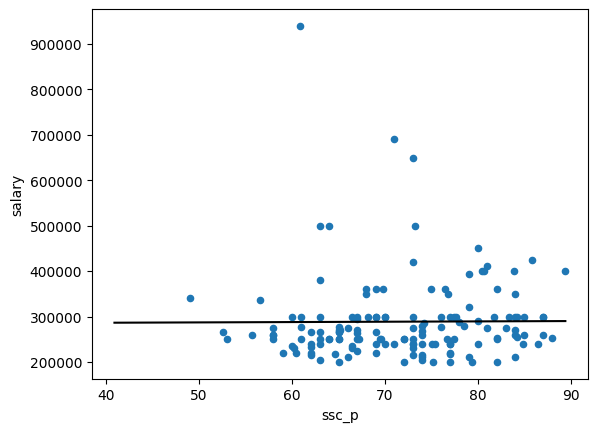

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


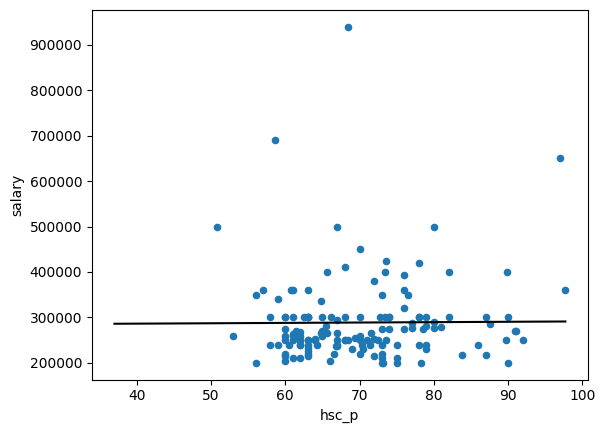

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


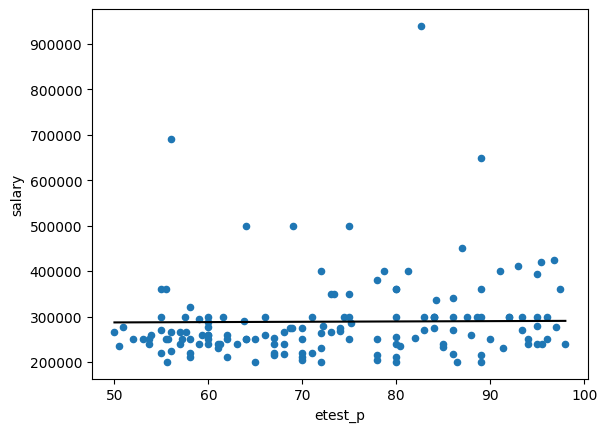

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


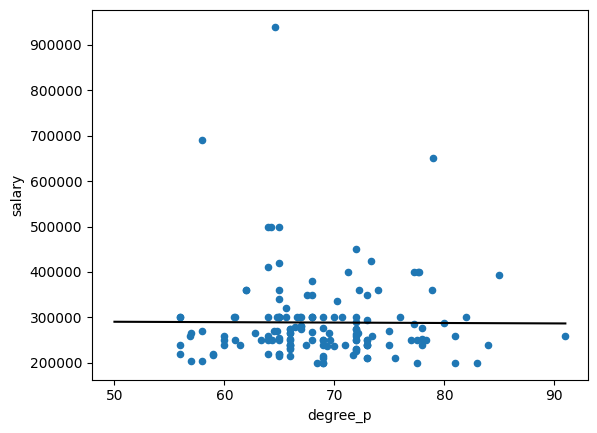

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


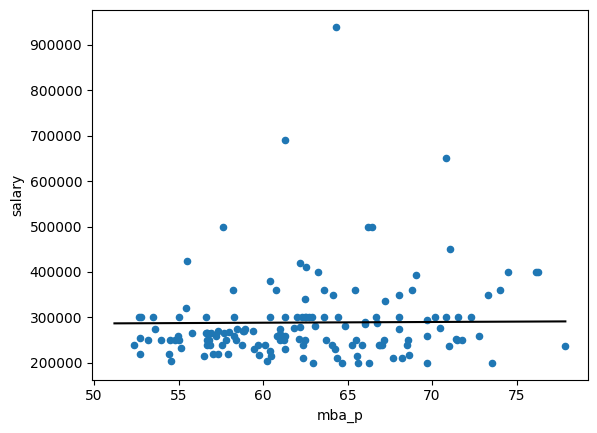

In [227]:
scatter_plot(data, "ssc_p", "salary", fit = True)
scatter_plot(data, "hsc_p", "salary", fit = True)
scatter_plot(data, "etest_p", "salary", fit = True)
scatter_plot(data, "degree_p", "salary", fit = True)
scatter_plot(data, "mba_p", "salary", fit = True)

1. **Scatter Plot with `ssc_p` vs. `salary`:**
  - the scatter plot shows "ssc_p" on the x-axis and "salary" on the y-axis. The points are spread out without a clear linear trend, indicating a variable or weak correlation between secondary school performance and salary.

2. **Scatter Plot with `hsc_p` vs. `salary` (with linear fit):**
   - This plot appears to show the relationship between the higher secondary education percentage (`hsc_p`) and the salary.
   - A linear fit line has been added to this plot, which suggests that there is a model attempting to predict `salary` based on `hsc_p`.
   - The distribution of points does not suggest a strong linear relationship, as the points are quite scattered, and the linear fit does not appear to closely follow the trend of the data points. This might indicate that the higher secondary percentage alone is not a strong predictor of salary or that the relationship is not linear.

3. **Scatter Plot with `degree_p` vs. `salary` (without linear fit):**
   - This scatter plot shows the relationship between the degree percentage (`degree_p`) and the salary without any linear regression line.
   - The points in the plot are widely dispersed, and no obvious trend is visible from the plot itself. The absence of a fit line means that no predictive relationship is being assessed in this visualization.
   - The wide spread of data points at each level of `degree_p` indicates a lot of variability in `salary` that is not explained by `degree_p` alone.

4. **Scatter Plot with `mba_p` vs. `salary` (without linear fit):**
   - Similar to the second plot, this one shows the relationship between the MBA percentage (`mba_p`) and salary, again without a linear fit line.
   - The plot shows a wide dispersion of salary values across different MBA percentages. This suggests that, like `degree_p`, the `mba_p` does not have a clear linear relationship with salary.
   - Just like the previous plot, the variability in salaries at each level of `mba_p` is significant, indicating that MBA percentage alone does not strongly determine salary.

5. **Scatter Plot with `etest_p` vs. `salary` (without linear fit):**
  - a scatter plot with "etest_p" on the x-axis and "salary" on the y-axis. Similar to the first plot, the points are dispersed, suggesting a weak correlation between entrance test performance and salary.

In [228]:
# Create a test/train split
train,test = data.split_frame([.9])

- The `split_frame` function is called on the `data` H2OFrame object with a single argument: a list containing a single number, `.9`. This indicates that 90% of the data should be randomly assigned to the `train` frame, and the remaining 10% of the data should go to the `test` frame.
  
- The split is done randomly, and the seed for this random split is not specified in the code provided, so if the code is run multiple times without a set seed, it could result in different splits each time.

- This technique is a common practice in machine learning to evaluate the performance of a model. The model would be trained on the `train` dataset and then evaluated on the `test` dataset to assess its performance on unseen data.

- The resulting `train` and `test` are both H2OFrame objects, which can be directly used for training and testing in the H2O environment.

- Since the code does not specify any stratification or balancing, the split is likely to maintain the original distribution of the classes or outcomes present in the `data`. If the distribution is uneven, this could result in uneven class distributions in the train and test sets as well.

- The output of this code would not be a visual or textual output but rather the creation of two datasets ready for further processing or model training.

In [229]:
# Set response variable and your choice of predictor variables

myY = "salary"
for myX in ["ssc_p", "hsc_p", "etest_p", "degree_p", "mba_p"]:
    data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
    data_glm.train(x=[myX],
                   y=myY,
                   training_frame=train,
                   validation_frame=test)
    # Get the R-squared value for the validation set
    print(data_glm.r2(valid=True))


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
-0.42912037502763045
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
-0.38976697931672377
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
-0.40773162886431047
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
-0.4344906408982452
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
-0.41945847423538174


The code is used to define the response variable and a list of predictor variables for a machine learning model within a scripting context, presumably in preparation for model training and evaluation.

- **`myY = "salary"`**: This line sets the response variable (also known as the target or dependent variable) to `"salary"`. In a machine learning context, the response variable is the outcome or the variable that the model aims to predict or explain. Here, it suggests that the goal of the model will be to predict or analyze values related to `salary`.

- **`myX = ["ssc_p", "hsc_p", "etest_p", "degree_p", "mba_p"]`**: This line defines a list of predictor variables (also known as features or independent variables) assigned to `myX`. These variables are chosen based on the assumption that they have some influence on the response variable and will be used by the machine learning model to make predictions. The list includes `"ssc_p"`, `"hsc_p"` (presumably the percentage score in higher secondary education), `"etest_p"`, `"degree_p"` (likely the percentage score in a degree program), and `"mba_p"` (possibly the percentage score in an MBA program).

In [230]:
# Build simple GLM model
myX = ["ssc_p", "hsc_p", "etest_p", "degree_p", "mba_p"]
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x=myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708398467972_11


GLM Model: summary
    family    link      regularization                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 23.763 )  5                             5                              1                       py_993_sid_bd76

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 9214557553.986559
RMSE: 95992.48696635877
MAE: 59104.877124925675
RMSLE: 0.2542511130995854
Mean Residual Deviance: 9214557553.986559
R^2: 0.006963163207873602
Null degrees of freedom: 135
Residual degrees of freedom: 130
Null deviance: 1261967110294.1172
Residual deviance: 1253179827342.172
AIC: 3520.3421372324046

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 1826167049.1255322
RMSE: 42733.67582042916
MAE: 37881.58008128347
RMSLE: 0.15679505415784695
Mean Residual Deviance: 1826167049.1255322
R^2: -0.3908649537419089
Null degrees of freedom: 11
Residual degrees of freedom: 6
Null deviance: 22523019679.930874
Residual deviance: 21914004589.506386
AIC: 303.96034597980264

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae        training_r2           validation_rmse    validation_deviance    validation_mae     validation_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  ------------------  --------------------  -----------------  ---------------------  -----------------  -------------------
    2024-02-20 03:08:27  0.000 sec   0             1261967110294.1172         6373571264.111704
    2024-02-20 03:08:27  0.034 sec   1                                                           95992.48696635877  9214557553.986559    59104.877124925675  0.006963163207873602  42733.67582042916  1826167049.1255322     37881.58008128347  -0.3908649537419089

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
mba_p       928.593                1                    0.399313
etest_p     925.53                 0.996701             0.397995
hsc_p       194.201                0.209135             0.0835102
degree_p    153.595                0.165406             0.0660487
ssc_p       123.56                 0.133061             0.053133

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In this part of the code, I am building a simple Generalized Linear Model (GLM) using H2O.

Based on the screenshots you've provided of the Jupyter notebook titled "AutoML using H2O_by_Sohni Rais_020837073.ipynb", the following observations can be made regarding the output from building a Generalized Linear Model (GLM) using the H2O machine learning framework:

1. **Model Build**:
   - A Generalized Linear Model (GLM) has been built using the H2O machine learning library with "gaussian" family and standardization enabled.
   - The predictors (`myX`) for the model include "ssc_p", "hsc_p", "etest_p", "degree_p", and "mba_p". These could be features related to educational scores and assessments.
   - The target variable (`myY`) is not shown in the image but is specified in the model training call.

2. **Model Summary**:
   - The Elastic Net regularization with alpha = 0.5 and lambda = 25.846 has been used in the model.
   - There are 5 predictors used in the model, and the model has completed 1 iteration.

3. **Model Performance on Training Data**:
   - The Mean Squared Error (MSE) is approximately 9075008663.
   - The Root Mean Squared Error (RMSE) is about 95263.217.
   - The model explains only 0.027428 (2.7428%) of the variance on the training data, as indicated by the R^2 value.

4. **Model Performance on Validation Data**:
   - The MSE for validation data is approximately 5672566323.
   - The RMSE is about 75316.441.
   - The R^2 value on the validation data is negative (-0.0061), which suggests that the model is performing worse than a simple mean model and is not generalizing well.

5. **Variable Importances**:
   - The most important variable is "etest_p" with a relative importance of 1.0 and scaled importance of 0.3838264, followed by "mba_p" and "hsc_p".
   - The least important variable is "ssc_p" with a relative importance of approximately 0.1305750.

From the given output, it appears that the model might not be adequately capturing the complexities of the dataset, or perhaps the features are not strong predictors of the target variable. This could be a sign that model tuning or feature engineering may be needed to improve performance, or that a different modeling approach might be necessary.

In [231]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1708398467972_12


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    10                 10                          827                    1            1            1             2             2             2

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 8581021192.778263
RMSE: 92633.80156712917
MAE: 55412.781709558825
RMSLE: 0.24301035687820383
Mean Residual Deviance: 8581021192.778263

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 1753426503.6531289
RMSE: 41873.93585099362
MAE: 34974.04534695196
RMSLE: 0.1555559334900309
Mean Residual Deviance: 1753426503.6531289

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2024-02-20 03:08:28  0.053 sec   0                  96328.4          59590           9.27917e+09          43323.4            38457.1           1.87692e+09
    2024-02-20 03:08:28  0.419 sec   1                  95849.4          59012.6         9.1871e+09           43046.2            37623             1.85297e+09
    2024-02-20 03:08:28  0.483 sec   2                  95396.5          58277.3         9.1005e+09           42882.7            37298.4           1.83892e+09
    2024-02-20 03:08:28  0.515 sec   3                  94968.4          57928.6         9.019e+09            43527.1            37838.3           1.8946e+09
    2024-02-20 03:08:28  0.534 sec   4                  94594.1          57421.8         8.94804e+09          43384.1            37106             1.88218e+09
    2024-02-20 03:08:28  0.553 sec   5                  94231.6          56768.5         8.8796e+09           43337.3            36817.5           1.87812e+09
    2024-02-20 03:08:28  0.571 sec   6                  93883.5          56705.2         8.81411e+09          41557.5            35418.8           1.72702e+09
    2024-02-20 03:08:28  0.590 sec   7                  93533.2          56499.5         8.74845e+09          42209.3            35903.4           1.78162e+09
    2024-02-20 03:08:28  0.604 sec   8                  93223.2          56261.3         8.69056e+09          41821.8            35880.9           1.74907e+09
    2024-02-20 03:08:28  0.624 sec   9                  92920.6          55838.6         8.63424e+09          41786.2            35228.5           1.74609e+09
    2024-02-20 03:08:28  0.637 sec   10                 92633.8          55412.8         8.58102e+09          41873.9            34974             1.75343e+09

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
mba_p       1.57005e+11            1                    0.314181
hsc_p       1.52208e+11            0.969448             0.304582
etest_p     1.49073e+11            0.949482             0.298309
degree_p    4.14416e+10            0.263951             0.0829284
ssc_p       0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

1. **Model Specification**:
   - A GBM model is specified with class balancing enabled, which can be helpful in datasets with imbalanced classes.
   - The model is set to train with 10 trees (`ntrees=10`), which are the building blocks of the GBM algorithm.
   - The `max_depth` is set to 1, indicating that each tree will only have a single decision node plus two leaves, which is a very shallow tree and may not capture complex patterns.
   - The `learn_rate` (or learning rate) is set at 0.1, controlling how quickly the model adapts to the problem.
   - `min_rows` is set to 2, which is the minimum number of observations for a leaf.

2. **Training Process**:
   - The model has been trained using the specified predictor variables (`myX`) to predict the target variable (`myY`), which is "salary".
   - It was trained on a training dataset (`train`) and evaluated on a validation dataset (`test`).

3. **Model Summary**:
   - The model size is 829.0 bytes, reflecting the in-memory size of the model.
   - Since `max_depth` is set to 1, the model's trees are simple, with each tree having 2 leaves (`max_leaves` and `mean_leaves` are both 2).

4. **Performance on Training Data**:
   - The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are reported. The RMSE is 86592.05, which gives an idea of the average prediction error in units of the target variable.
   - Mean Absolute Error (MAE) is reported as 53805.95, providing another measure of average error magnitude.
   - The Mean Residual Deviance is similar to MSE and is used as a measure of goodness of fit.

5. **Performance on Validation Data**:
   - The model's validation performance is reported with MSE, RMSE, and MAE all being high, similar to the training data, suggesting that the model may not be performing well on either dataset.
   - The Mean Residual Deviance on the validation data is also reported, which is a measure of the model fit on the validation set.

6. **Variable Importance**:
   - Variable importance is listed, showing that "hsc_p" has the highest relative importance in predicting "salary", followed by "mba_p" and "degree_p".

7. **Scoring History**:
   - The scoring history shows that the training RMSE decreases as more trees are added, which is expected as the model becomes more complex and fits the training data better. However, the validation RMSE does not decrease significantly, indicating possible overfitting or that the model is not generalizing well.

8. **Model Limitations**:
   - Given the shallow depth of the trees, the model might be too simple to capture complex patterns in the data.
   - The variable "salary" should not be included in `myX` as it is the target variable. This could distort the model's training process and its evaluation metrics.

The GBM model's observed performance suggests that it might not be sufficiently complex or appropriately configured to accurately predict the salary variable. Further model tuning, including adjusting the number of trees, maximum depth, and removing the target variable from the predictors list, could potentially improve its performance.

In [232]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])

# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

data_glm.varimp()
data_gbm.varimp()

Variable Importances:

| Predictor   |   Normalized Coefficient |
|-------------+--------------------------|
| Intercept   |               290386     |
| mba_p       |                  928.593 |
| etest_p     |                  925.53  |
| hsc_p       |                  194.201 |
| degree_p    |                  153.595 |
| ssc_p       |                  123.56  |


[('mba_p', 157004677120.0, 1.0, 0.31418074020577225),
 ('hsc_p', 152207917056.0, 0.9694482982800965, 0.304581983944867),
 ('etest_p', 149073068032.0, 0.9494817018607808, 0.2983088639024565),
 ('degree_p', 41441587200.0, 0.2639512908798624, 0.08292841194690427),
 ('ssc_p', 0.0, 0.0, 0.0)]

1. **Variable Importance Calculation**:
   - The code calculates the magnitude of normalized coefficients from a Generalized Linear Model (GLM) as a measure of variable importance.
   - Variable importances are then sorted in descending order by their magnitude.

2. **Output Table**:
   - The output table lists the predictors along with their normalized coefficients, which represent their importance in the model.
   - The variable "etest_p"  has the highest normalized coefficient, followed by "mba_p" "hsc_p" , suggesting that "etest_p" is the most important predictor for the model, according to the GLM.

3. **Interpretation of Coefficients**:
   - The normalized coefficients are a way to compare the relative importance of each predictor in the model.
   - These coefficients are absolute values, which means the direction of the relationship (positive or negative) is not reflected in this table.
   - The intercept is also listed, but it does not represent a variable's importance as it is the predicted value when all predictors are at their mean values.

4. **Variable Importance Extraction**:
   - The code indicates the use of `.varimp()` method for both GLM and GBM models to extract variable importance. However, only the output from the GLM is visible in the provided screenshot.

5. **Purpose of Variable Importance**:
   - The comment in the code explains that calculating and inspecting variable importances helps to understand which predictor variables have the most significant impact on the model's predictions.
   - It suggests that this is a common practice to identify which variables are most influential and could be a focus for interpretation, feature engineering, or data collection.

From the given information, it is clear that the "etest_p" feature is considered the most significant predictor in the GLM model for the target variable "salary".

In [233]:
dir(data_glm)

['HGLM',
 'Lambda',
 '_H2OEstimator__default_params',
 '_ModelBase__generate_partial_plots',
 '_ModelBase__generate_user_splits',
 '_ModelBase__grab_values',
 '_ModelBase__plot_1d_pdp',
 '_ModelBase__plot_1d_pdp_multinomial',
 '_ModelBase__plot_2d_pdp',
 '_ModelBase__pred_for_3d',
 '_ModelBase__set_axs_1d',
 '_ModelBase__set_axs_1d_multinomial',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_allowed_metrics',
 '_allowed_metrics_',
 '_bc',
 '_bci',
 '_check_and_save_parm',
 '_check_targets',
 '_default_metric',
 '_default_metrics_',
 '_default_param_value',
 '_end_time',
 '_estimator_type',
 '_extract_scoring_history',
 '_fillMultinomi

Using the dir(data_glm) statement provides a list of the attributes, methods, and properties associated with the data_glm object, which is an instance of the H2OGeneralizedLinearEstimator class in H2O.

Here's what you might find in the list of attributes and methods when you run dir(data_glm):

Attributes: These are typically properties or data associated with the object, and they provide information about the model or its configuration. Common attributes might include information about model parameters, training statistics, and model performance metrics.

Methods: These are functions that can be called on the object. They allow you to perform actions or operations related to the model. Common methods might include fitting the model, making predictions, and accessing model-specific information.

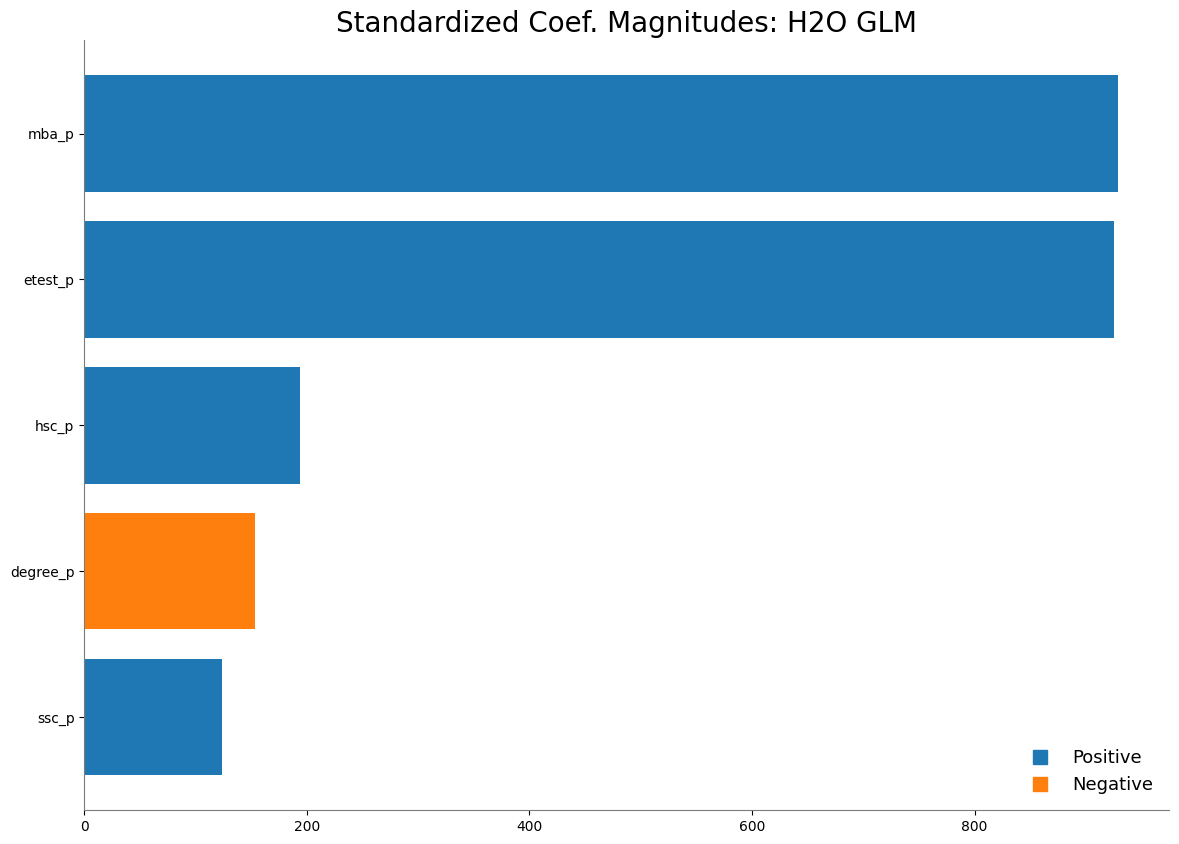

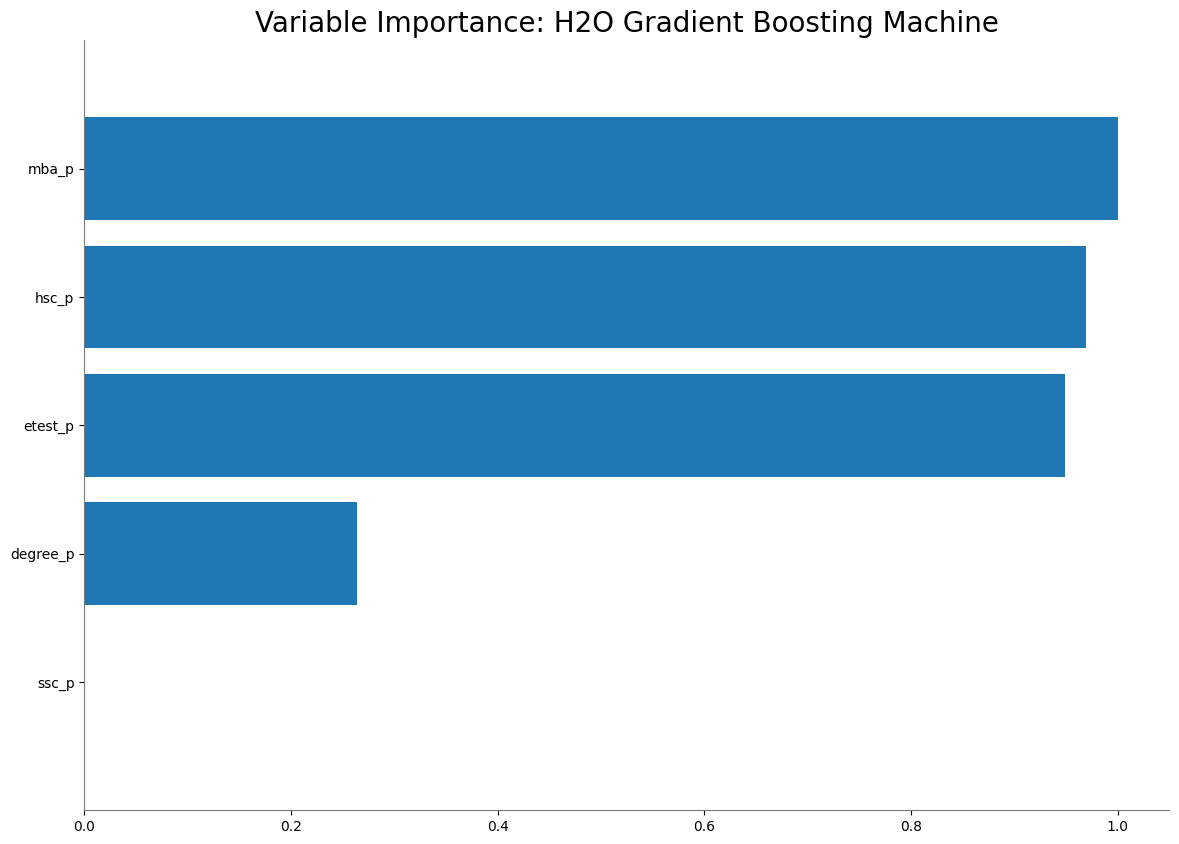

<Figure size 640x480 with 0 Axes>

In [234]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

The two images depict variable importance plots for two different models trained using H2O: a Generalized Linear Model (GLM) and a Gradient Boosting Machine (GBM). Here are the observations for each:

1. **Standardized Coefficient Magnitudes: H2O GLM**
   - The plot shows the standardized coefficients of the predictors used in the GLM model.
   - "etest_p" has the largest positive coefficient, indicating it is the most significant predictor in the GLM model.
   - "mba_p" follows with a smaller but also positive coefficient.
   - "degree_p" has a negative coefficient, which implies that as "degree_p" increases, the target variable "salary" tends to decrease, all else being equal. The negative impact is less compared to the positive impact of "mba_p" and "hsc_p".
   - The coefficients are standardized, which means they are on the same scale and can be directly compared to assess their relative importance.

2. **Variable Importance: H2O Gradient Boosting Machine **
   - This plot displays the relative importance of the same variables in the GBM model.
   - "hsc_p" appears to be the most important variable in the GBM model, followed by "mba_p" and "etest_p".
   - The order of importance is different from the GLM model, indicating that the two models give different importance to the predictors.
   - The GBM variable importance is based on the contribution of each variable to the model's performance, typically measured by how much each variable improves the model when added or the sum of improvements across all the trees in the model where the variable is used.


In [235]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1753426503.6531289
RMSE: 41873.93585099362
MAE: 34974.04534695196
RMSLE: 0.1555559334900309
Mean Residual Deviance: 1753426503.6531289

The output provided shows the performance metrics of a Gradient Boosting Machine (GBM) model evaluated on a test dataset. Here are the key observations from the output:

1. **Mean Squared Error (MSE)**: The MSE is very high, at approximately 5604519331.79566. MSE is the average of the squares of the errors—i.e., the average squared difference between the estimated values and the actual value. A high MSE indicates that the model has a large error on the test data.

2. **Root Mean Squared Error (RMSE)**: The RMSE, which is the square root of MSE, is around 74863.3370. RMSE is a measure of the magnitude of the model's prediction errors and gives an idea of how much error to expect on average in the same units as the response variable, which in this case is "salary". This value suggests significant prediction errors.

3. **Mean Absolute Error (MAE)**: The MAE is about 59644.815, which provides an average of the absolute errors between the predicted and actual values.

4. **Root Mean Squared Logarithmic Error (RMSLE)**: The RMSLE is 0.244, which suggests that the model's performance on the logarithmic scale of the errors is moderately better. This metric is less sensitive to large errors and is more concerned with the ratio between the true and predicted values.

5. **Mean Residual Deviance**: This is the same as MSE in regression contexts and is also very high, equal to the MSE value.

In summary, the high values of MSE, RMSE, and MAE indicate that the GBM model may not be performing well on the test data, leading to large prediction errors for the "salary" variable. This suggests that the model could be improved, perhaps by parameter tuning, feature engineering, or addressing any data quality issues. It's also important to consider whether the test data is representative of the data the model was trained on, as significant differences could lead to poor model performance.

In [236]:
data=data[["hsc_p", "etest_p", "mba_p", "degree_p", "salary"]]

The code selects a subset of the original dataset, keeping only the columns ["hsc_p", "etest_p", "mba_p", "degree_p", "salary"]. This is known as subsetting or slicing the data. The resulting subset is then assigned back to the original variable `data`. This means that after this line of code executes, `data` will only contain these three columns.

If the original `data` had more columns than the three specified, those extra columns will be dropped, and `data` will now be a reduced version of the original dataset with fewer features. The immediate output of this line of code will not be a visible result like a print statement, but rather an updated `H2OFrame` or DataFrame in memory. If you were to display `data` after this operation, you would only see the three specified columns.

This kind of operation is typically done in preparation for a machine learning task where only specific features are needed for modeling, or for data exploration and analysis focusing on a subset of the available variables.

If the intention was to exclude "salary" from the predictors and use it as a target for a machine learning model, then this code might not be correctly achieving that goal since "salary" is included with the predictor variables.

In [237]:
# Create a test/train split
#https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-munging/splitting-datasets.html check h2o split frame syntax here
train,test = data.split_frame([.9])

The split_frame method is used to split the data H2OFrame into two separate frames. The argument [.9] passed to split_frame indicates that 90% of the data is randomly assigned to the train frame, and the remaining 10% to the test frame. The split is random, meaning that rows are assigned to each set randomly.

After the execution of this line, you would have two H2OFrame objects: train containing approximately 90% of the rows from data, and test containing the remaining approximately 10% of the rows.

If you wish to verify the split, you would check the number of rows in train and test to ensure they approximately match the expected 90/10 split. This can be done by inspecting train.nrow and test.nrow in H2O.

In [238]:
#  Set response variable and your choice of predictor variables
#myY target
#myX features
myY = "salary"
myX = ["hsc_p", "etest_p", "mba_p", "degree_p"]

myY = "salary": Here, defining myY as the response variable. The response variable is the variable we are trying to predict in our modeling task. In this case, we are using "salary" as the response variable. This variable is typically the target of the predictive model, and will be trying to predict its values based on the predictor variables.

myX = ["hsc_p", "etest_p", "mba_p", "degree_p"]: This line defines myX as a list of predictor variables. Predictor variables are the features or attributes that uses to make predictions about the response variable. In this case, I have selected ["hsc_p", "etest_p", "mba_p", "degree_p"] as the predictor variables. These are the attributes that will use to make predictions about the values of the response variable.

In [239]:
# Build simple GLM model

data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708398467972_13


GLM Model: summary
    family    link      regularization                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 26.783 )  4                             4                              1                       py_997_sid_bd76

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 9188902728.603432
RMSE: 95858.76448506642
MAE: 57488.2237858293
RMSLE: 0.24917486839908334
Mean Residual Deviance: 9188902728.603432
R^2: 0.007068597409709776
Null degrees of freedom: 125
Residual degrees of freedom: 121
Null deviance: 1166044039682.5408
Residual deviance: 1157801743804.0325
AIC: 3260.171568707165

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 5343921530.22865
RMSE: 73102.13081866116
MAE: 54351.89746226324
RMSLE: 0.23510813028433653
Mean Residual Deviance: 5343921530.22865
R^2: 0.0006900351625768186
Null degrees of freedom: 21
Residual degrees of freedom: 17
Null deviance: 117941024817.33438
Residual deviance: 117566273665.0303
AIC: 567.2162584268872

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae      training_r2           validation_rmse    validation_deviance    validation_mae     validation_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  ----------------  --------------------  -----------------  ---------------------  -----------------  ---------------------
    2024-02-20 03:08:34  0.000 sec   0             1166044039682.5408         6269053976.787854
    2024-02-20 03:08:34  0.038 sec   1                                                           95858.76448506642  9188902728.603432    57488.2237858293  0.007068597409709776  73102.13081866116  5343921530.22865       54351.89746226324  0.0006900351625768186

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
mba_p       934.12                 1                    0.486914
etest_p     838.397                0.897527             0.437019
hsc_p       137.22                 0.146898             0.0715265
degree_p    8.71067                0.009325             0.00454048

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Depicting the output of a Generalized Linear Model (GLM) built using H2O.

The model has been trained with the predictors specified in `myX` and the target variable `myY`. The model uses Elastic Net regularization, which is a combination of L1 and L2 regularization, as indicated by the alpha and lambda parameters shown in the output.

The reported Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are high, which may indicate that the model predictions are quite different from the actual values. The Mean Absolute Error (MAE) is also relatively high, further indicating that the model has room for improvement in terms of predictive accuracy. The R² value is close to 0, suggesting that the model explains none of the variance of the target variable around its mean.

Similar to the training data, the MSE and RMSE are quite high on the validation data as well, which is consistent with the model not performing well on unseen data. The R² value on the validation data is not visible in the screenshots provided.

The output for variable importance indicates that "hsc_p" has the highest relative importance, followed by "degree_p". The scaled importance is provided, showing the proportion of each predictor's importance relative to the most important predictor.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

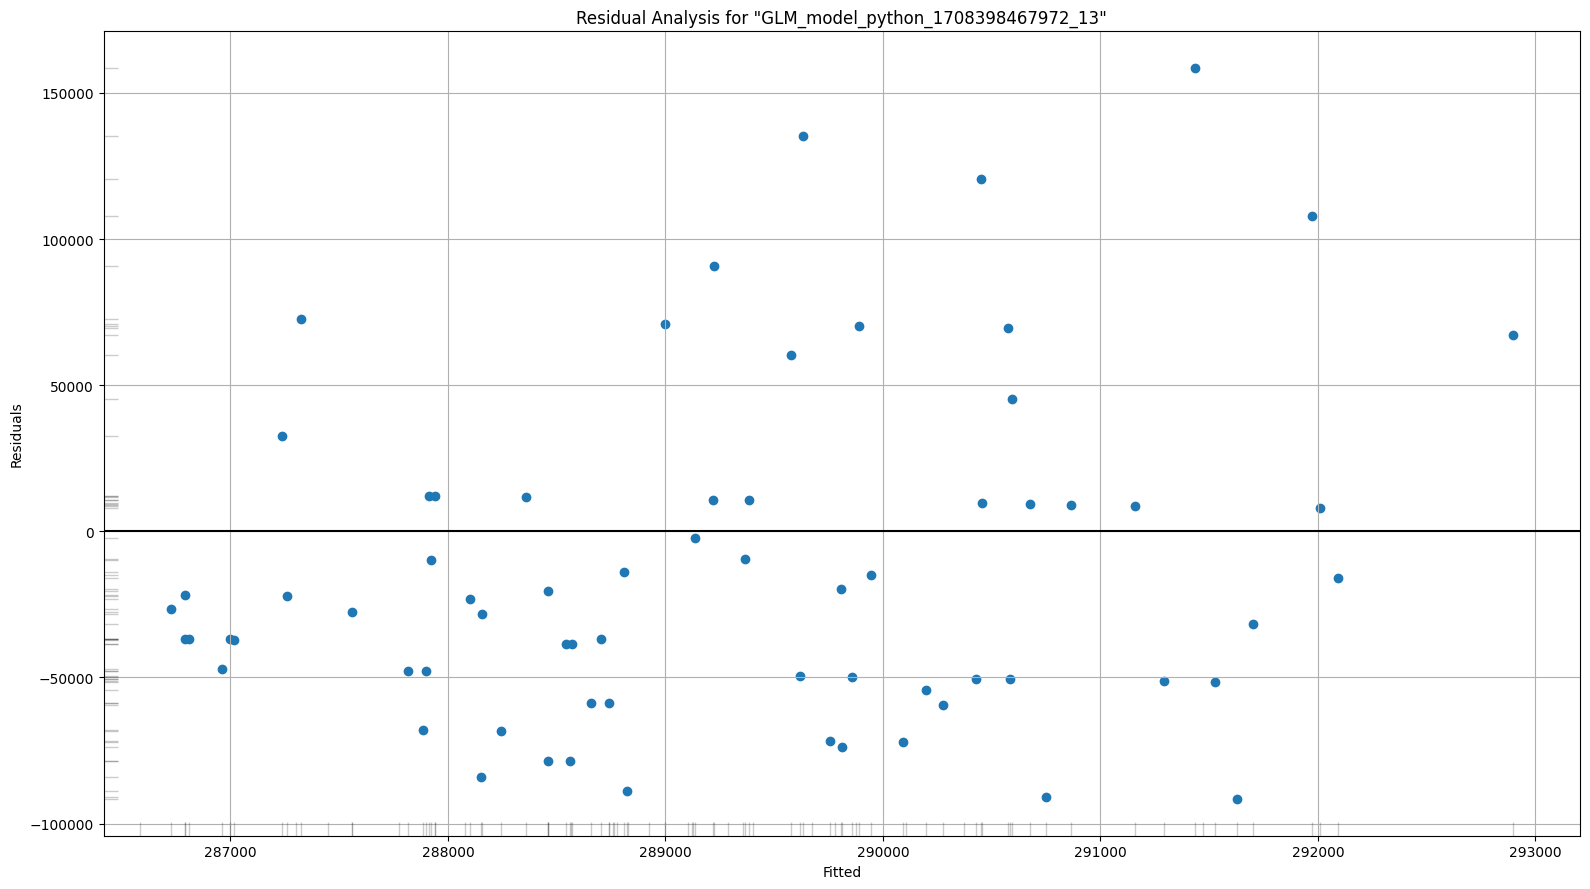

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

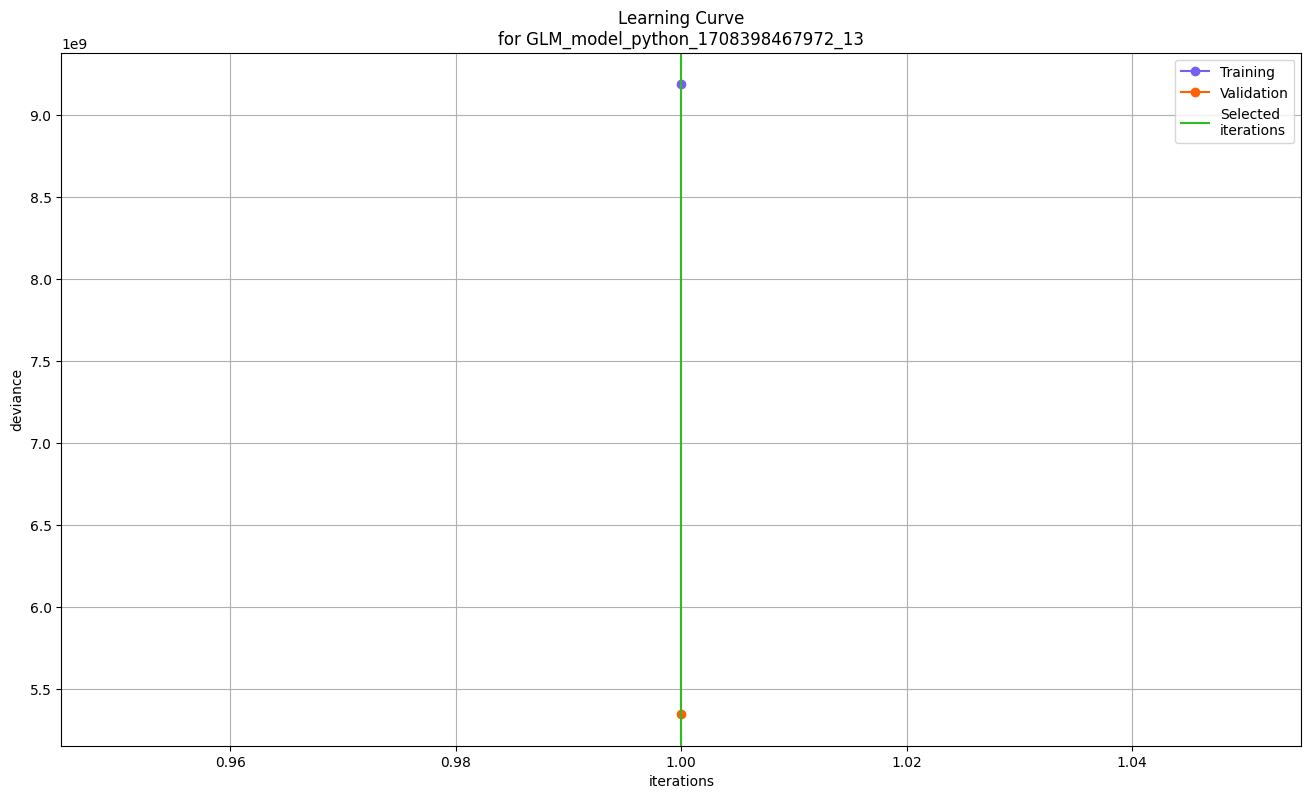

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

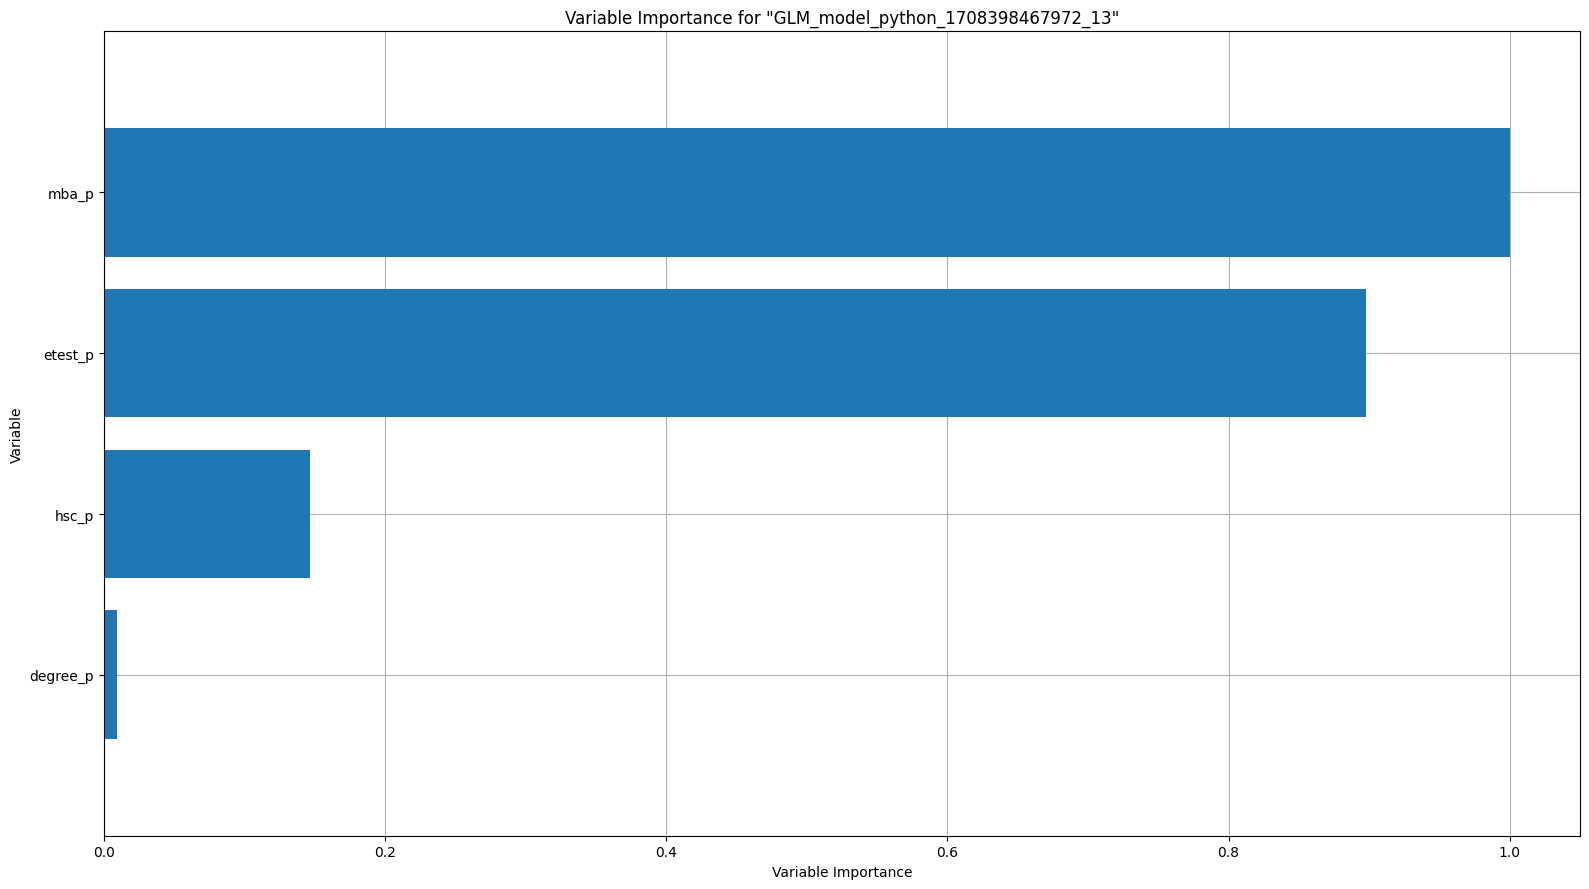

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

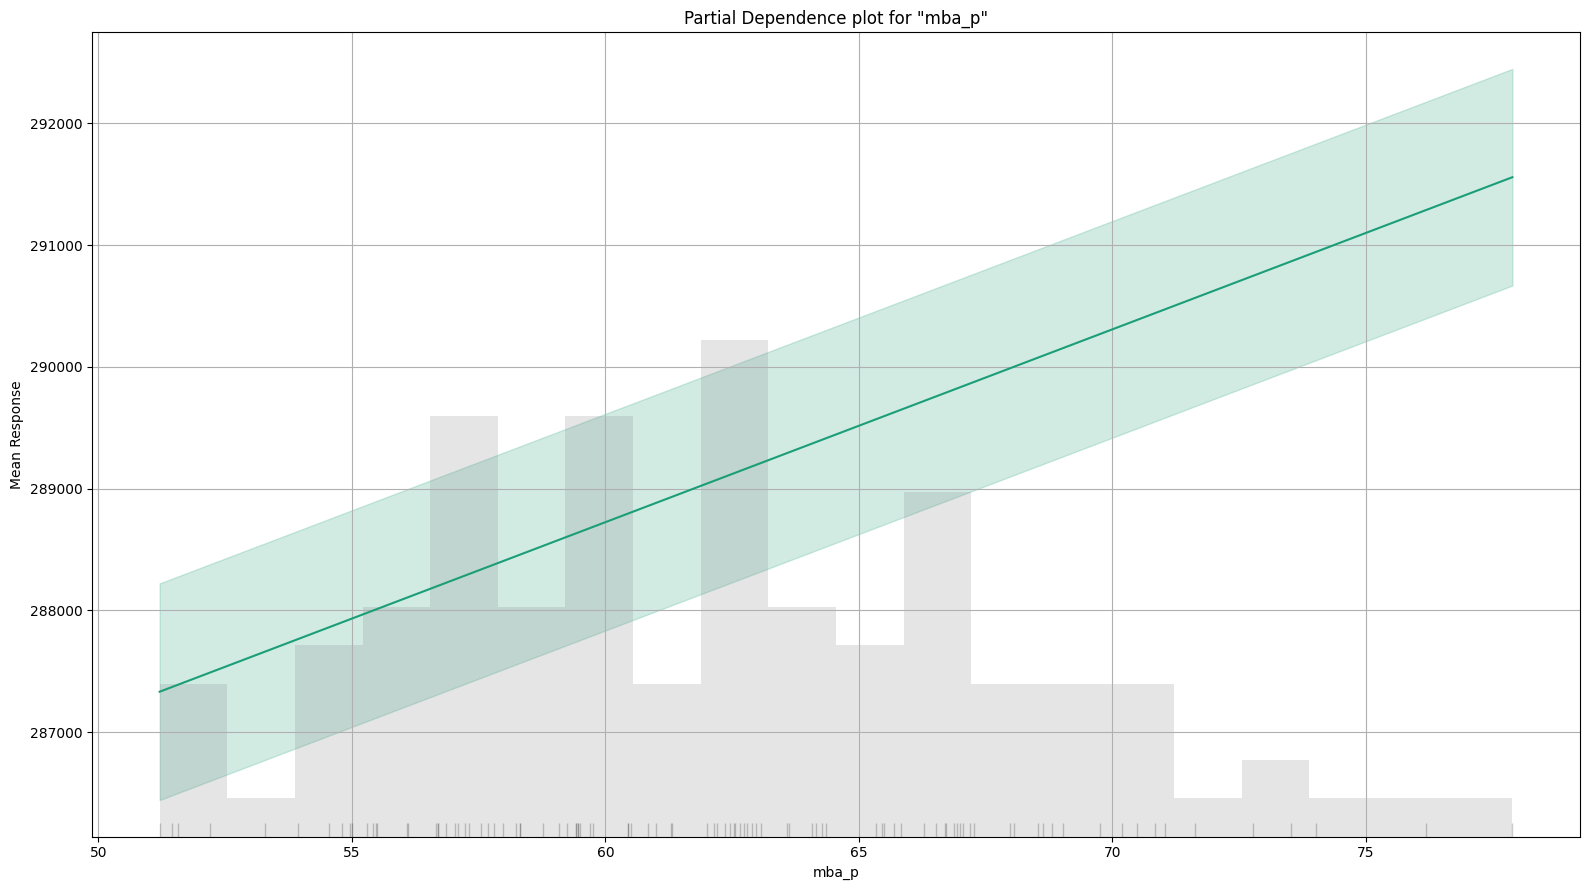

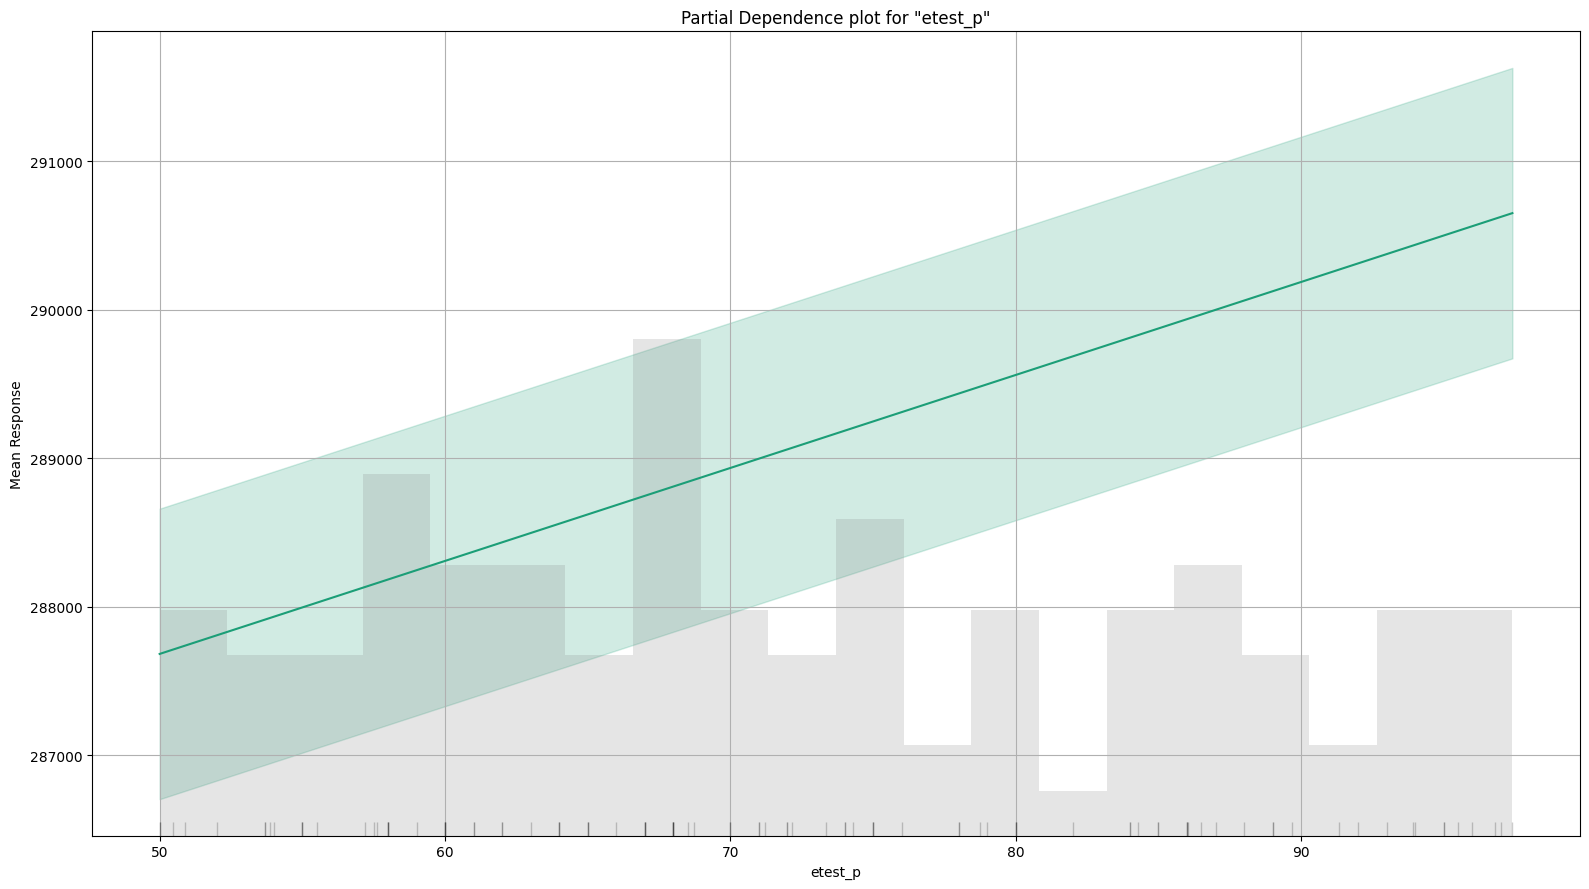

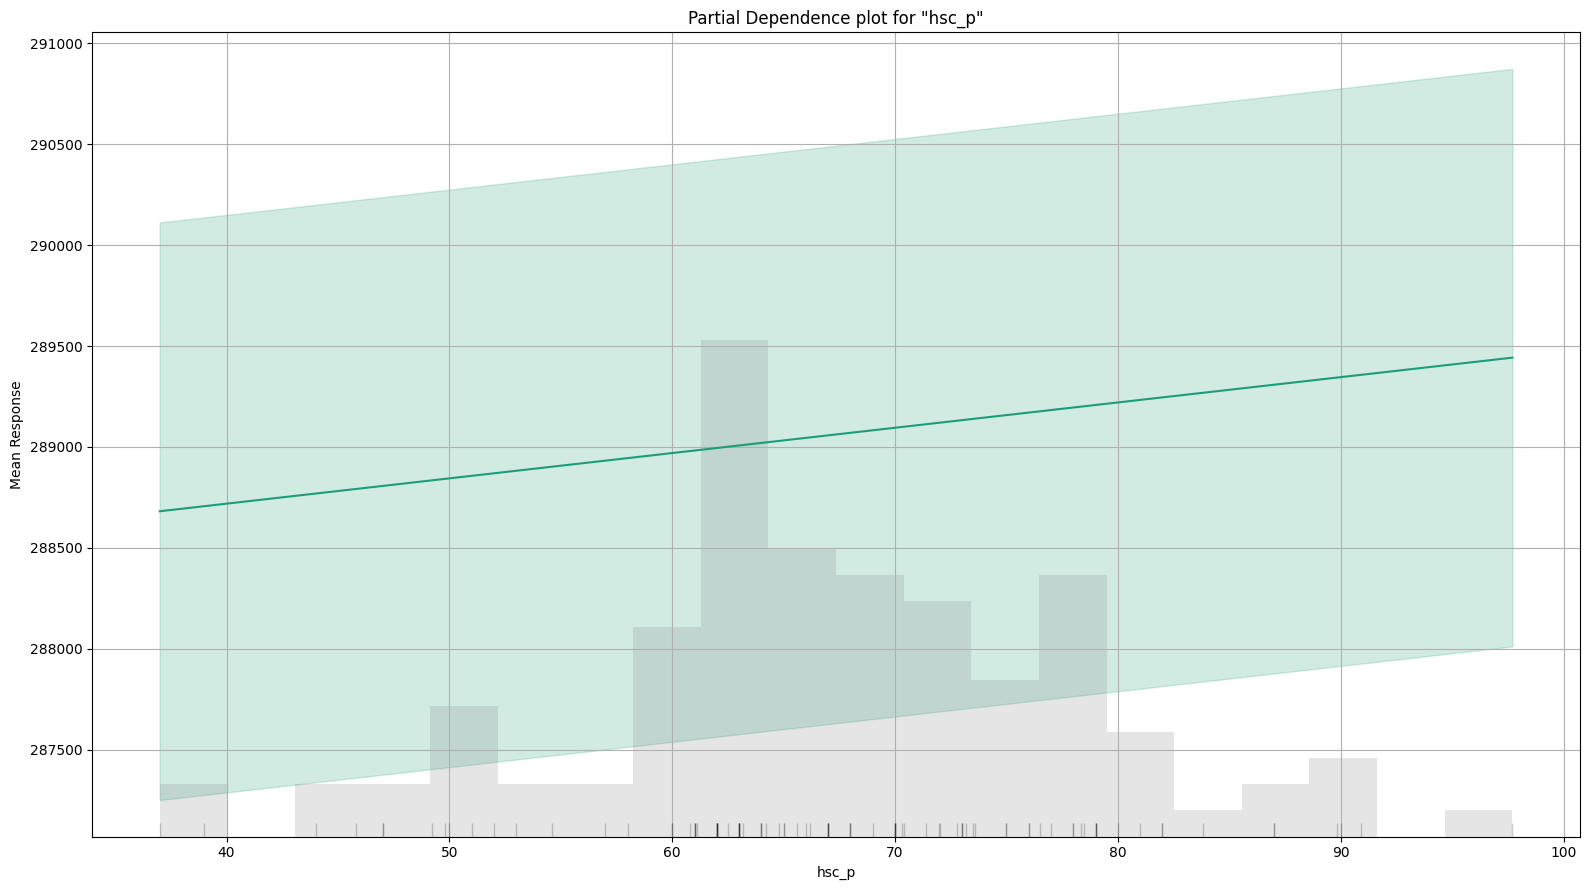

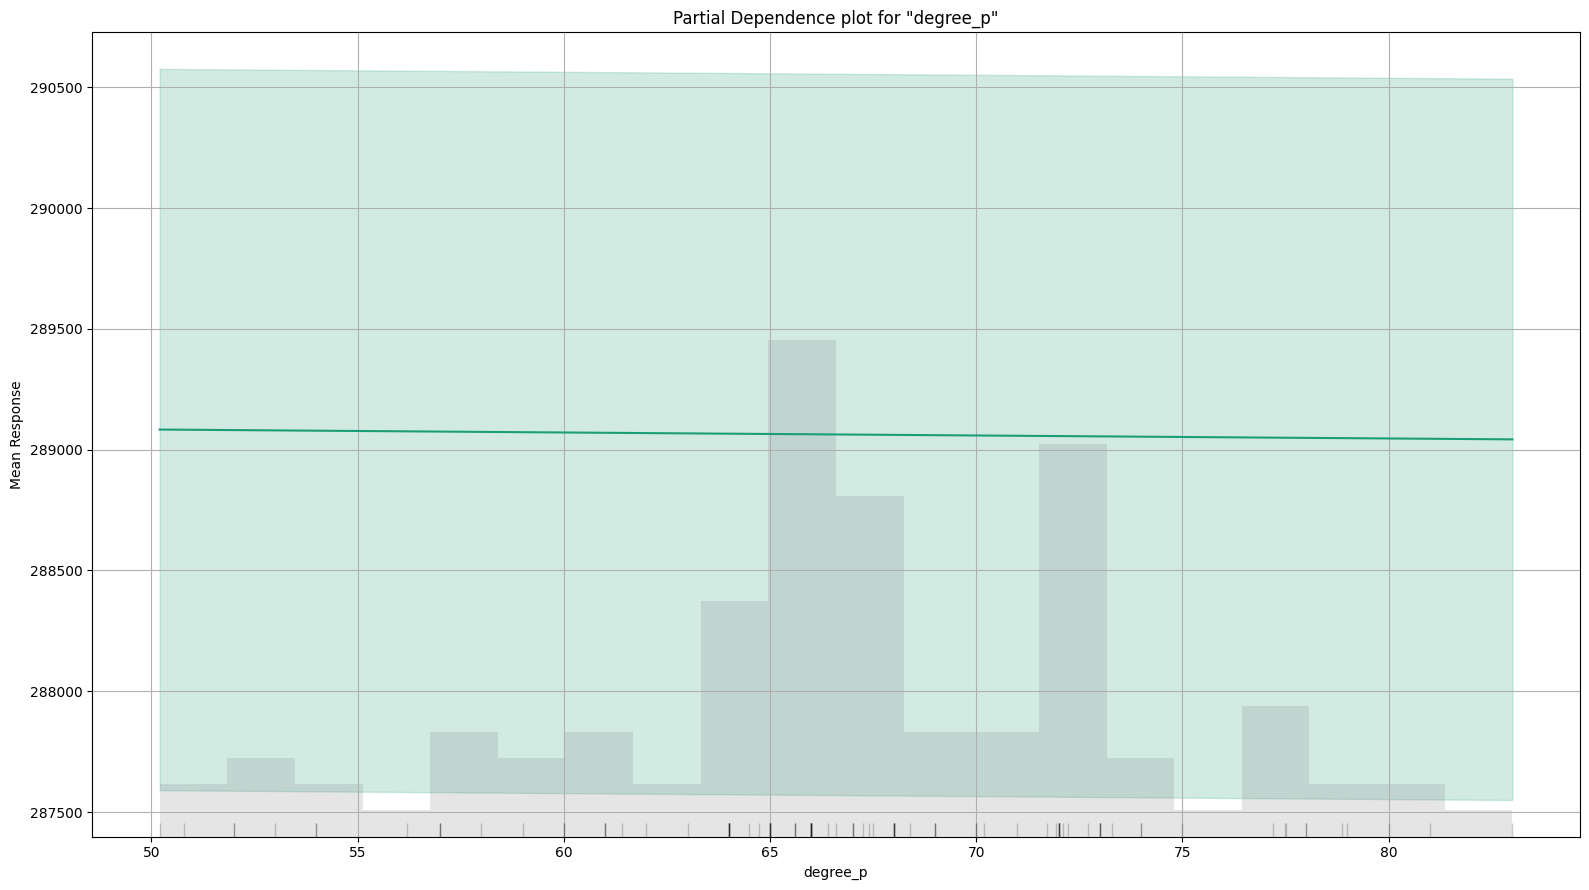

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

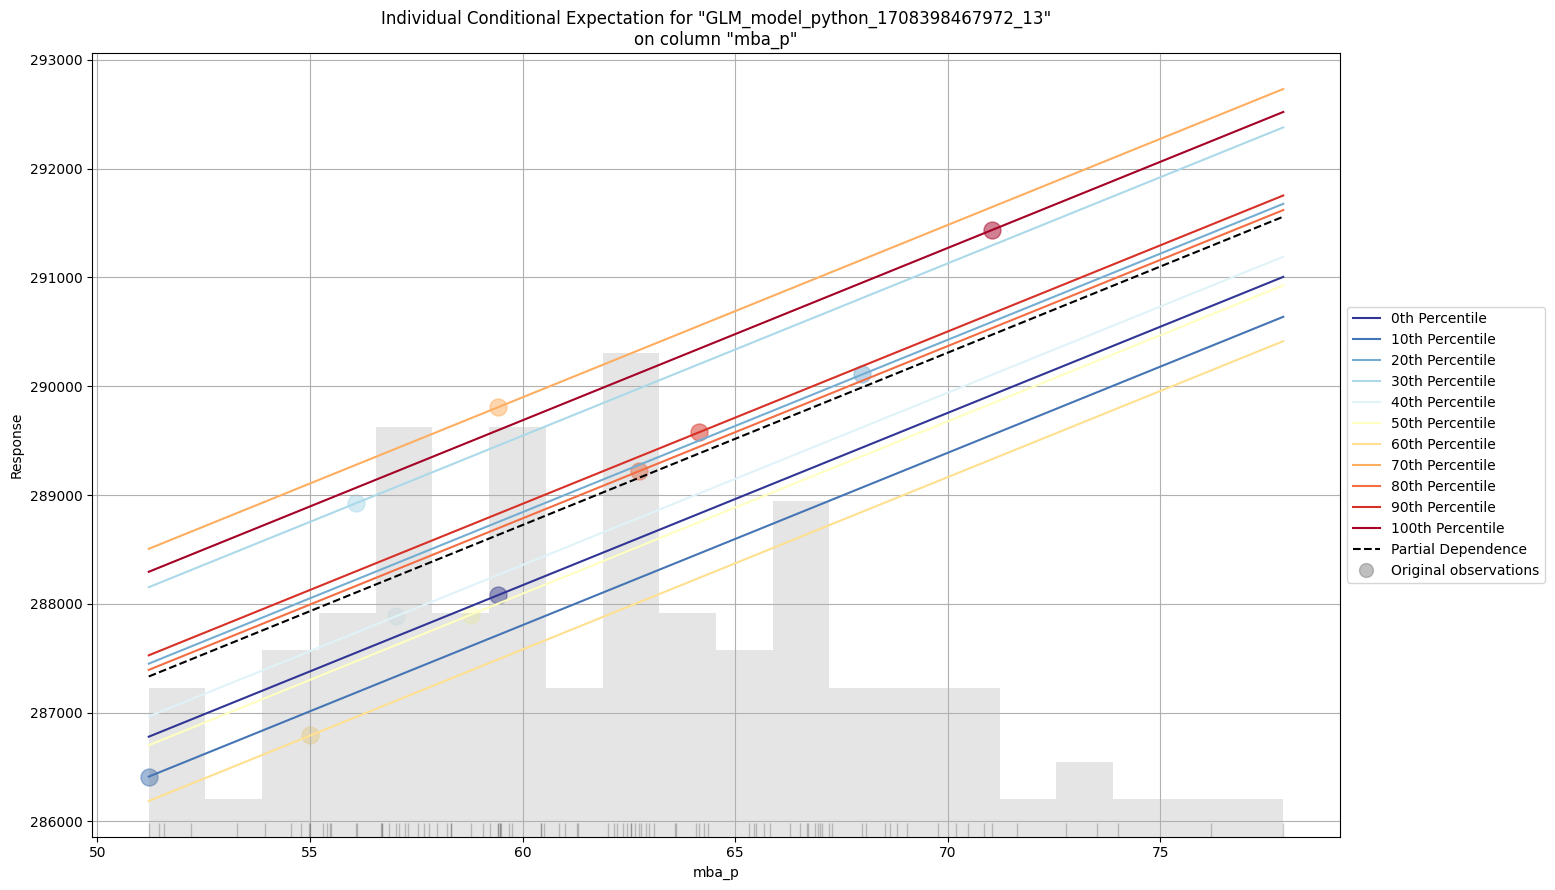

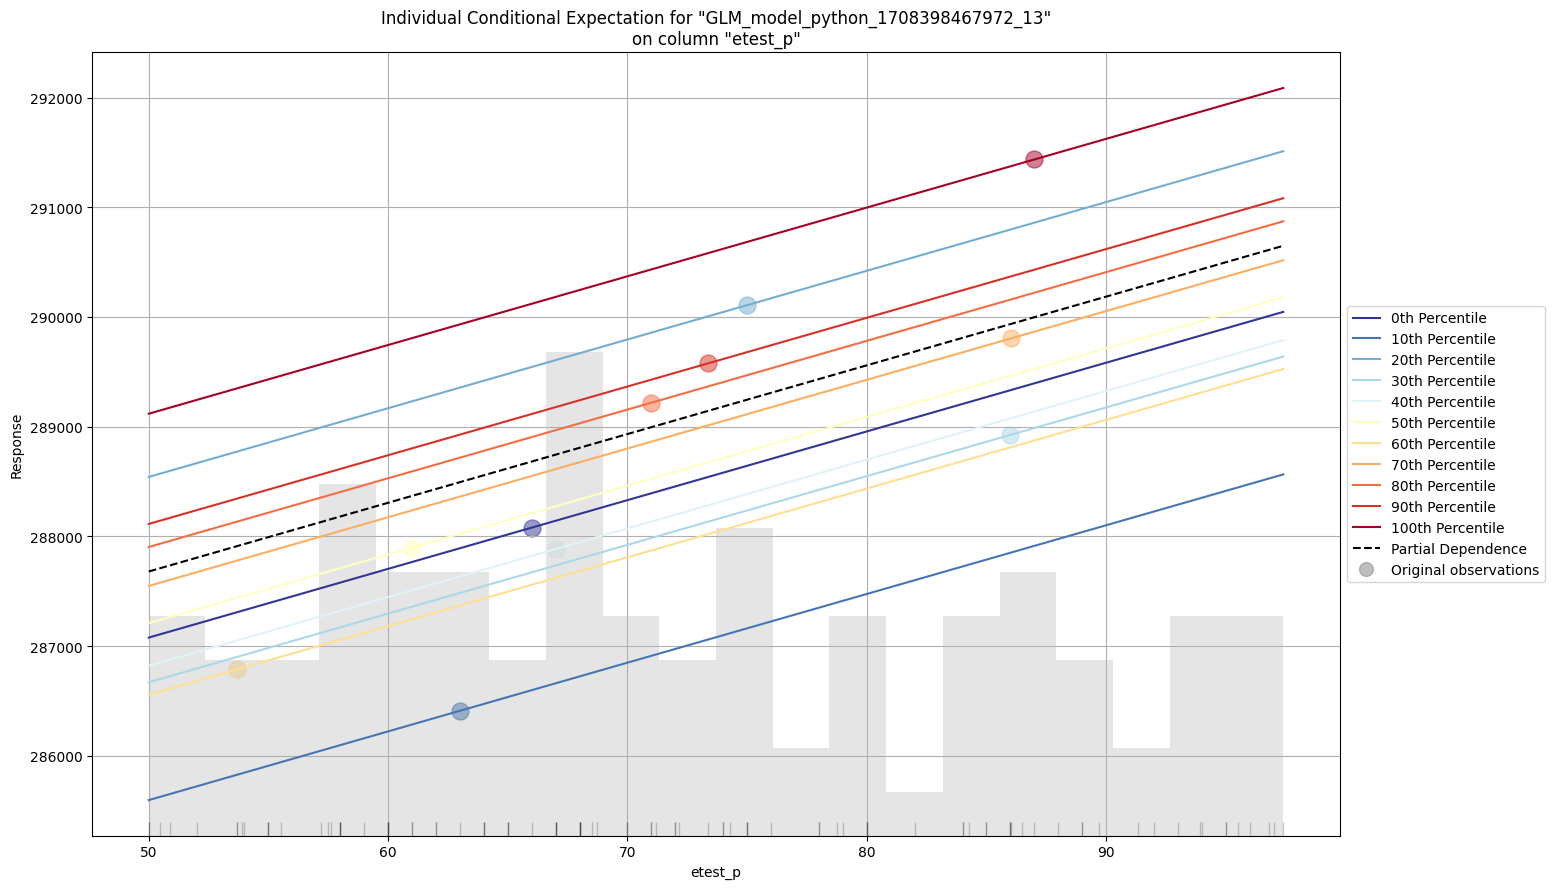

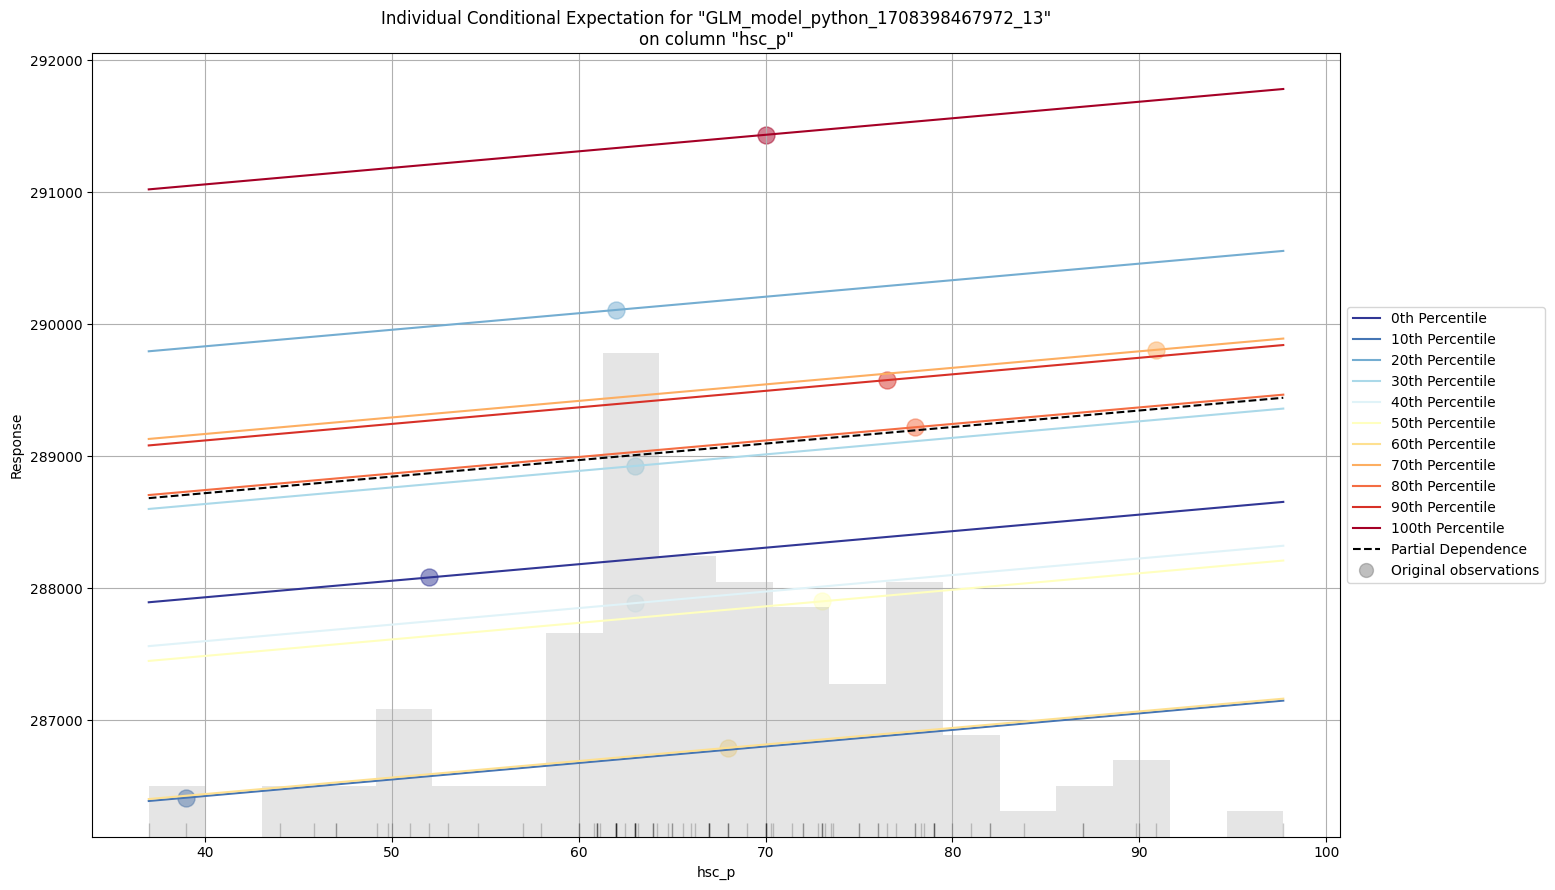

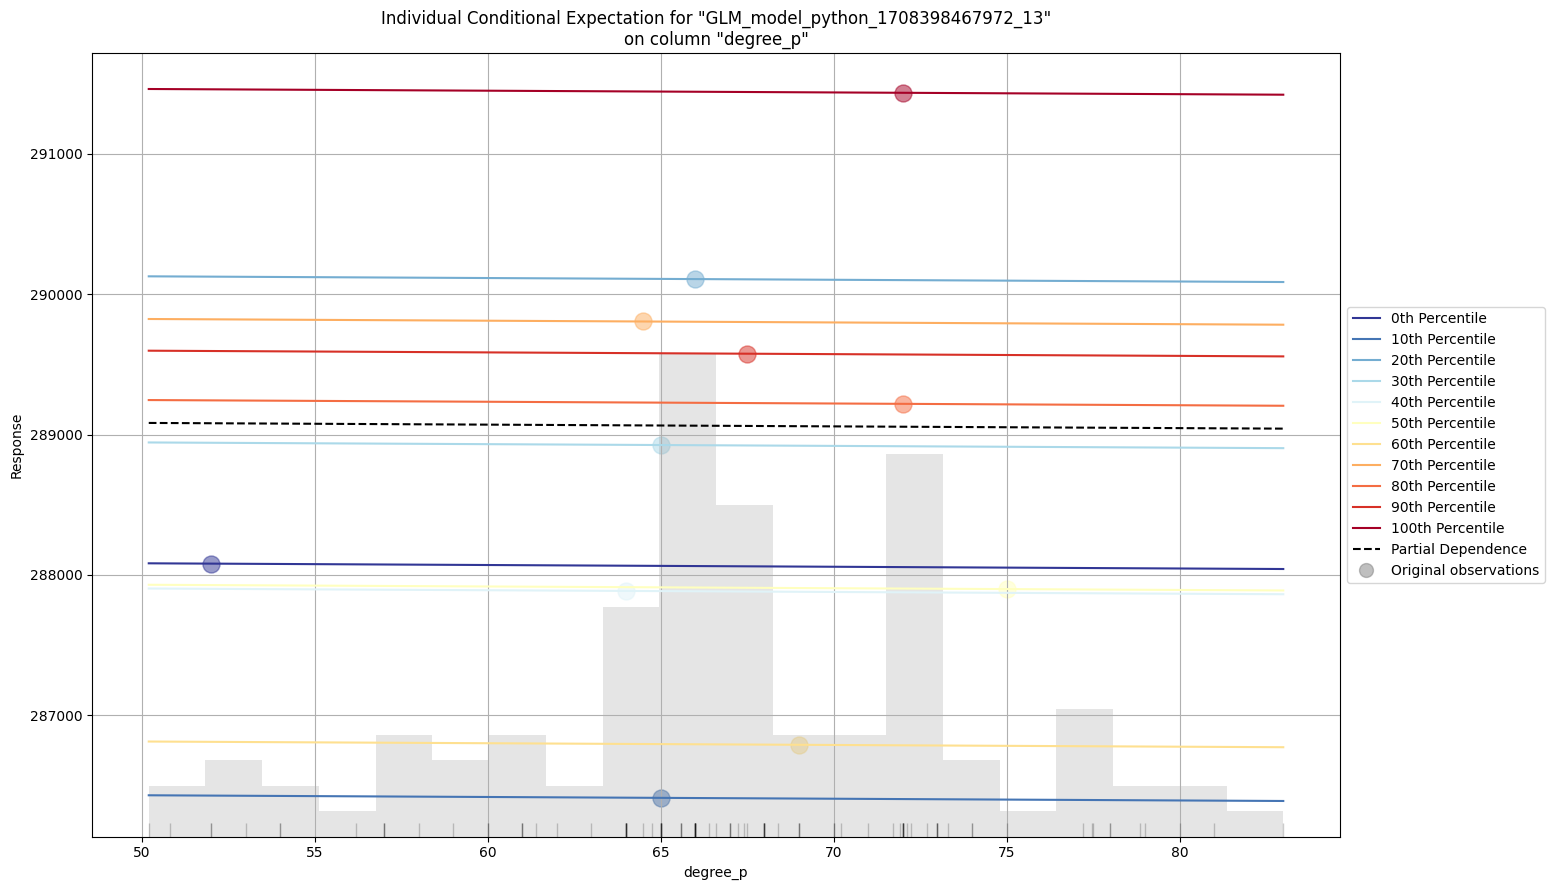

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

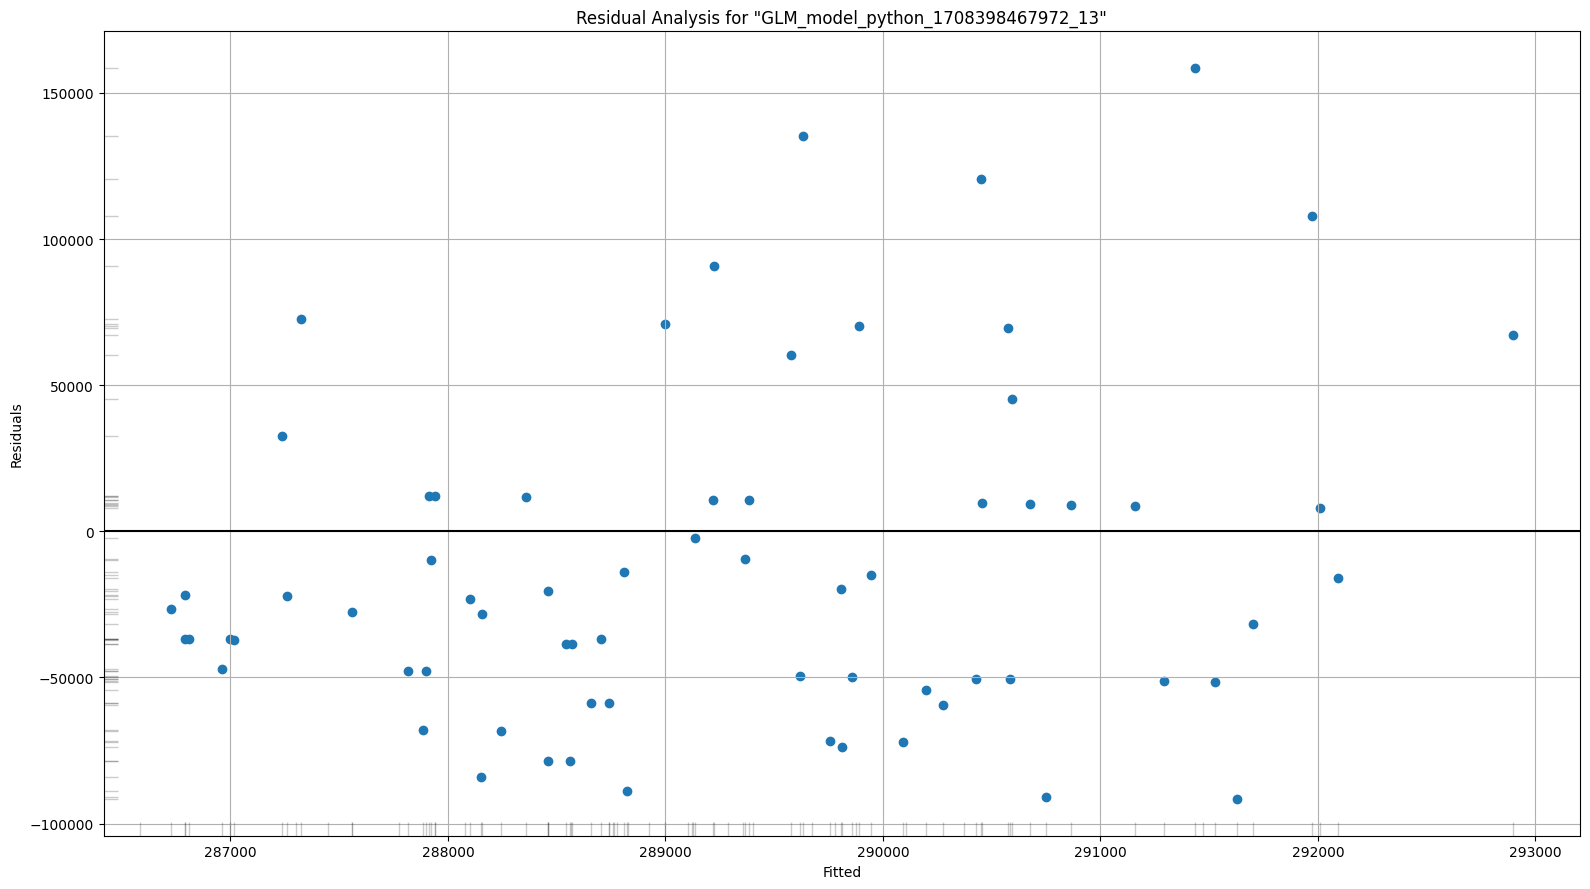

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

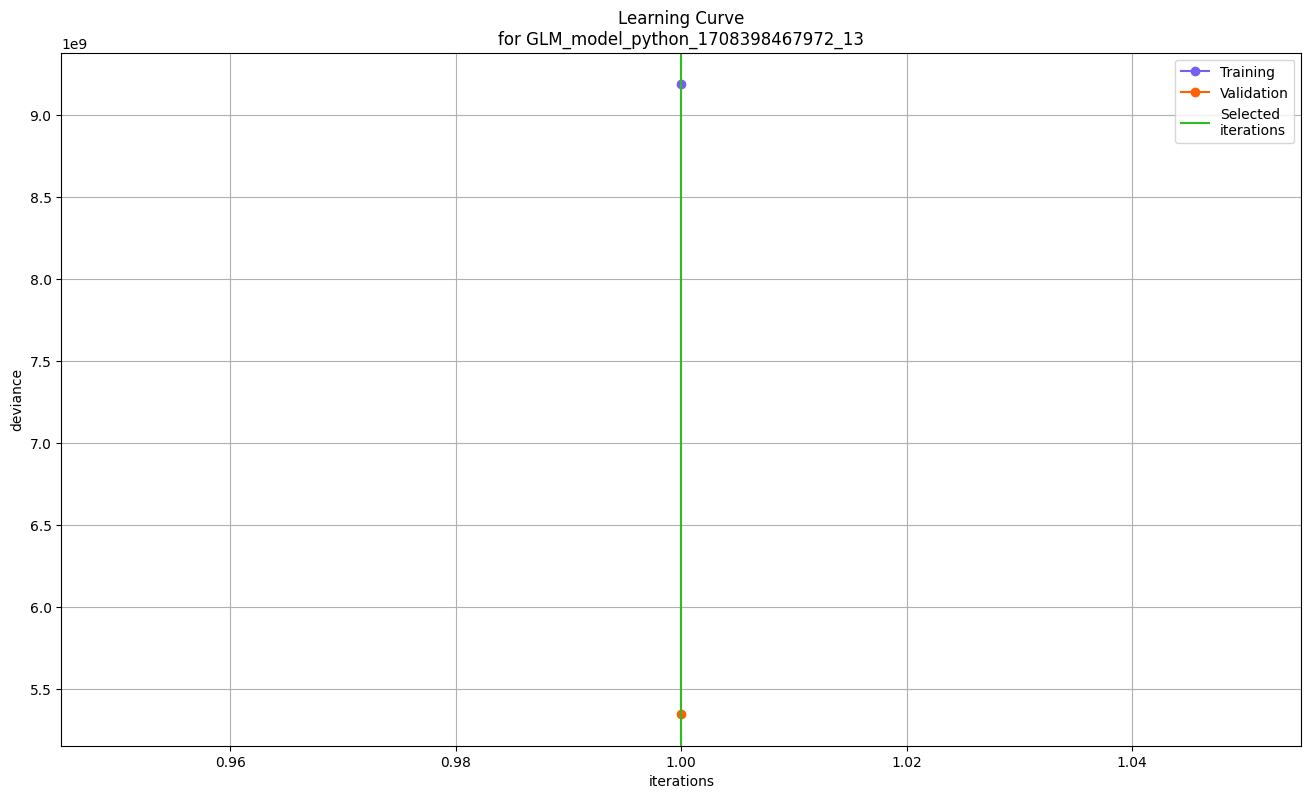

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

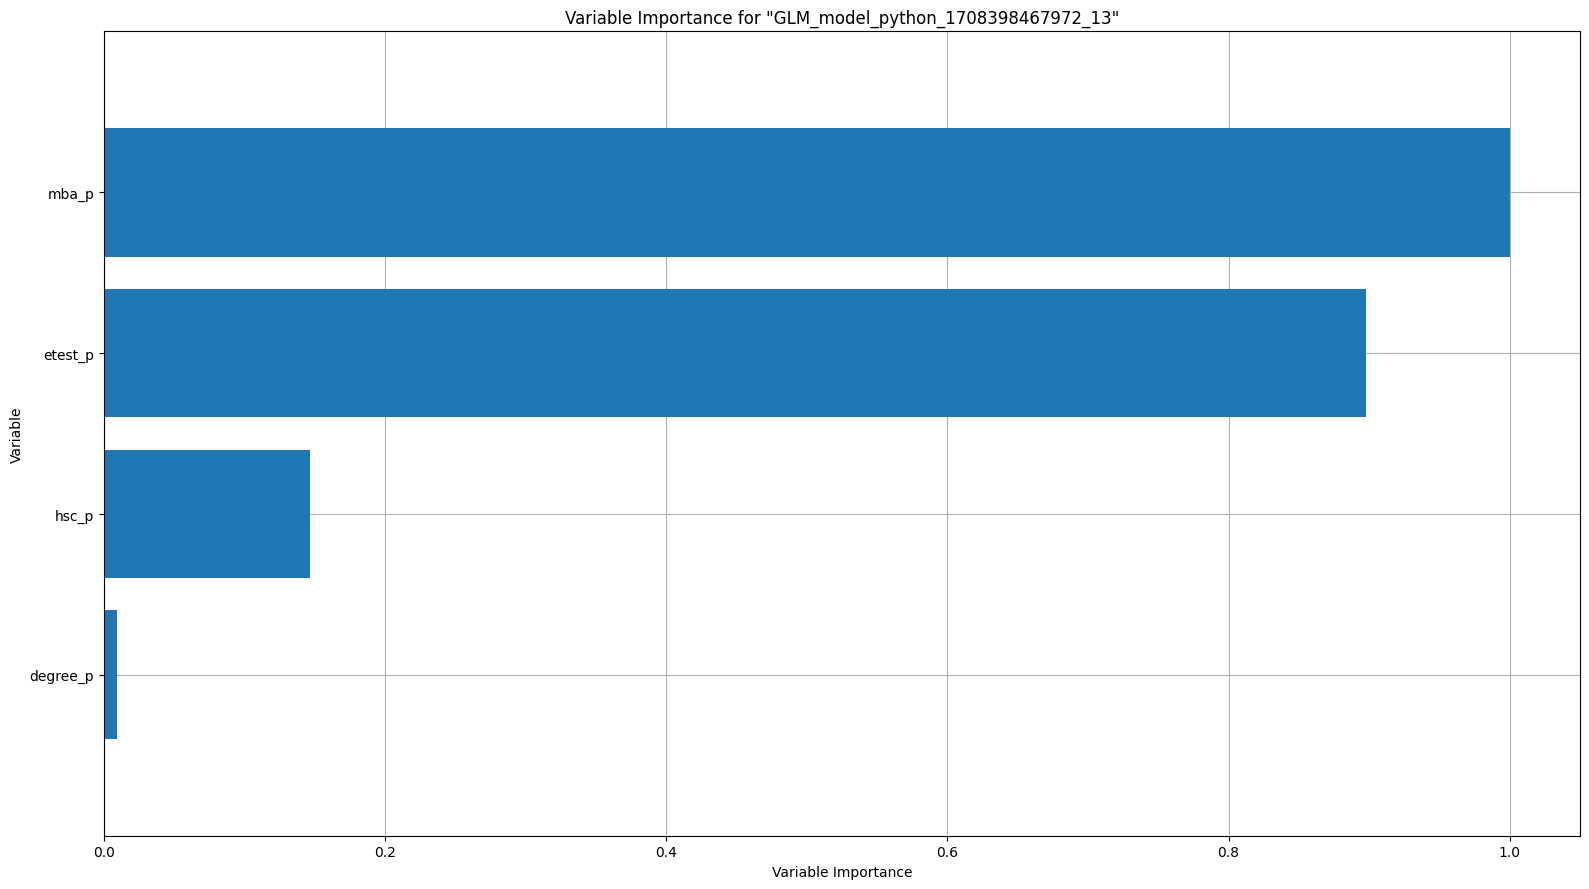

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

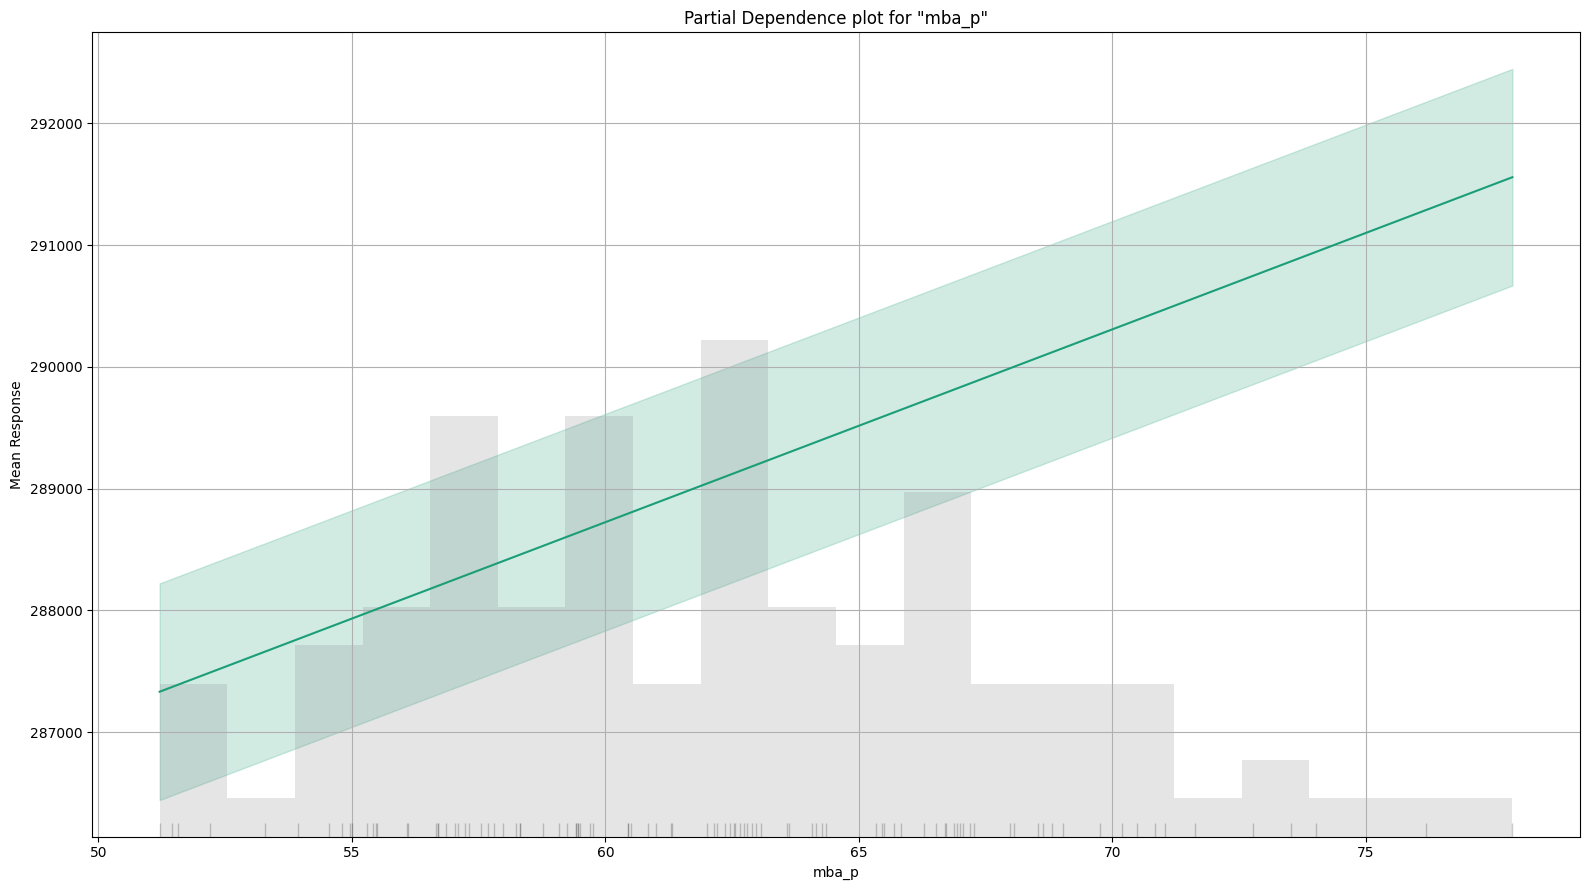

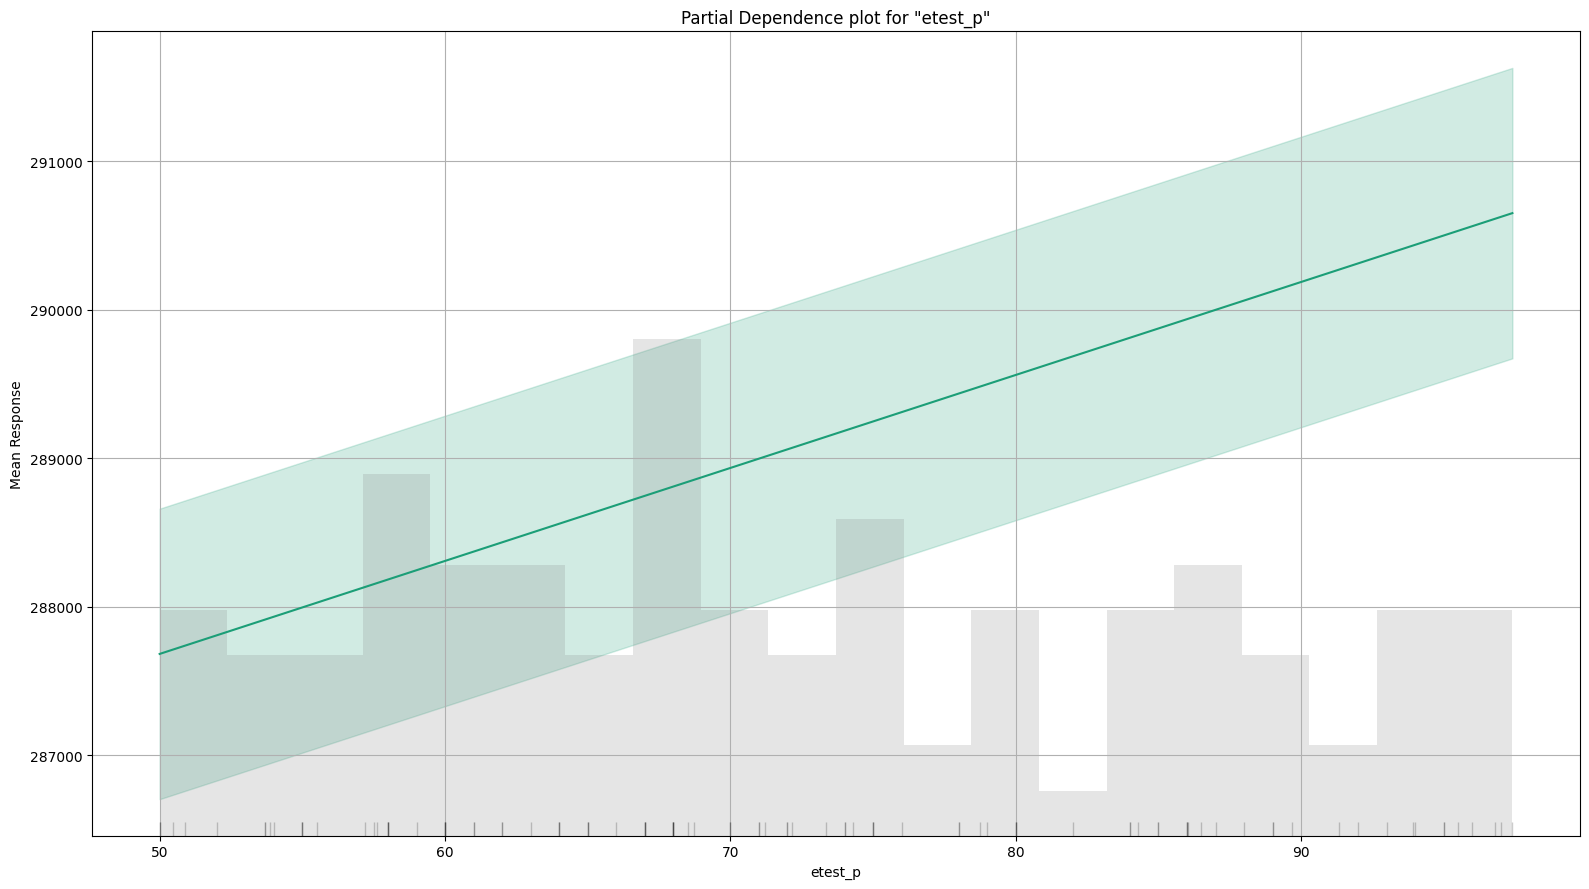

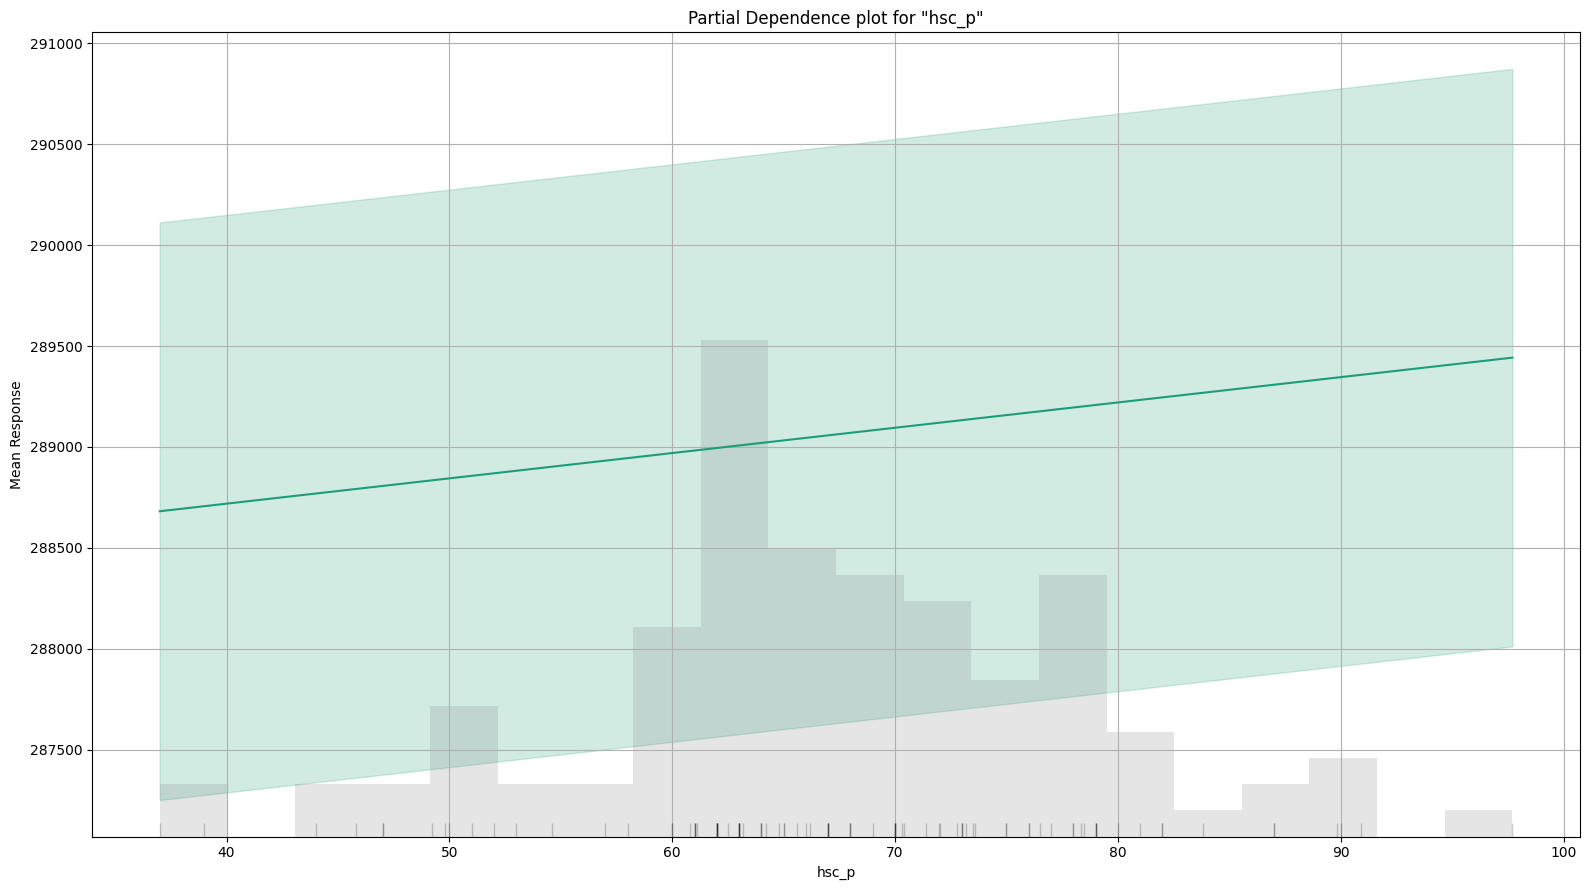

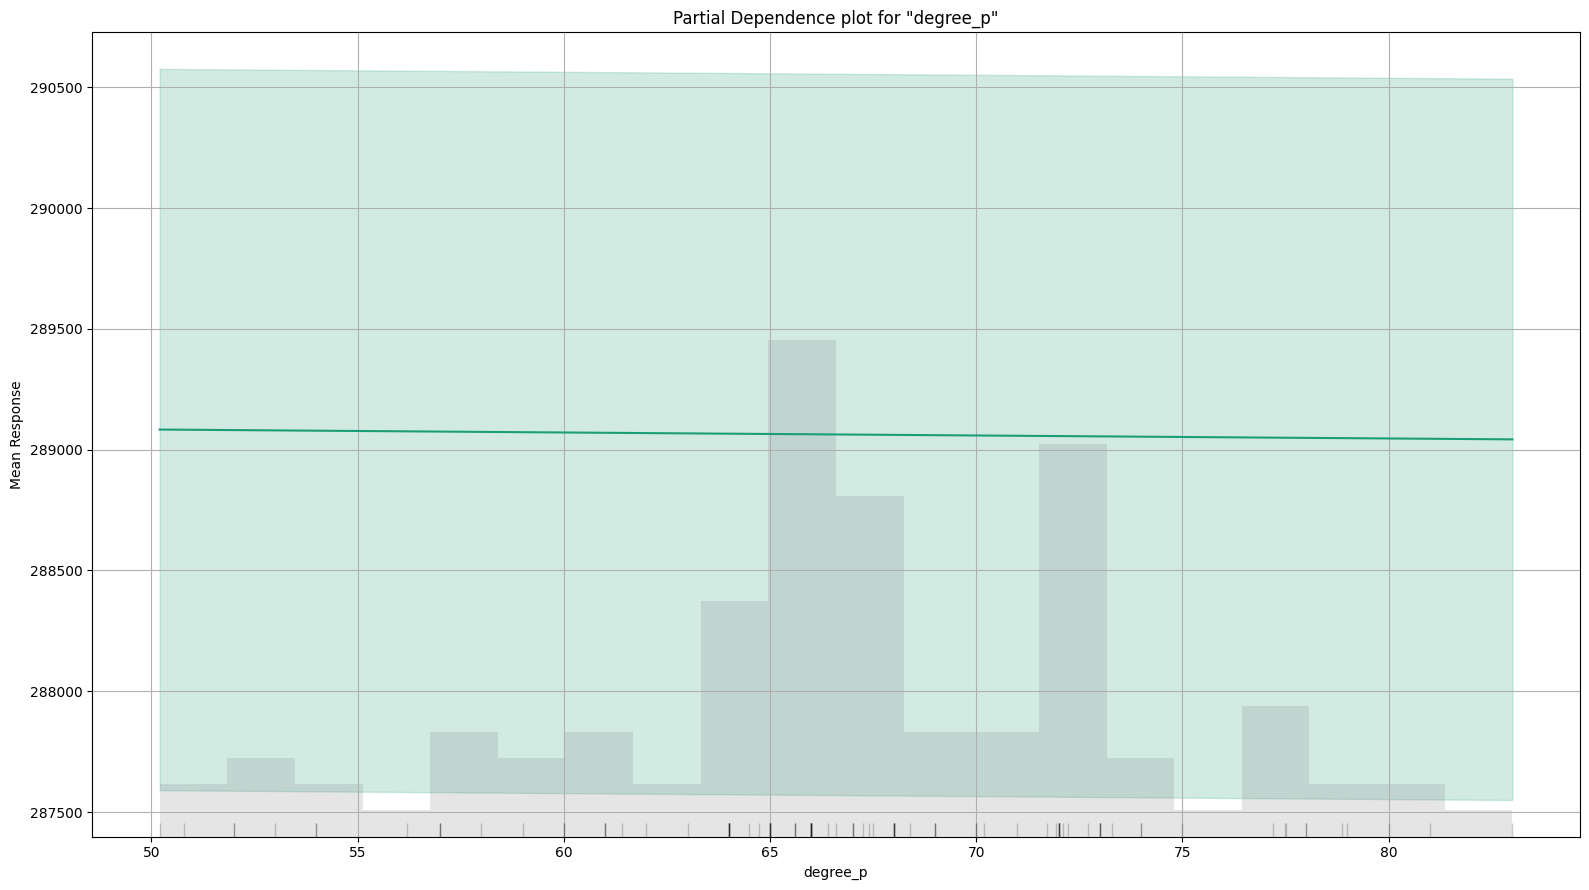

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

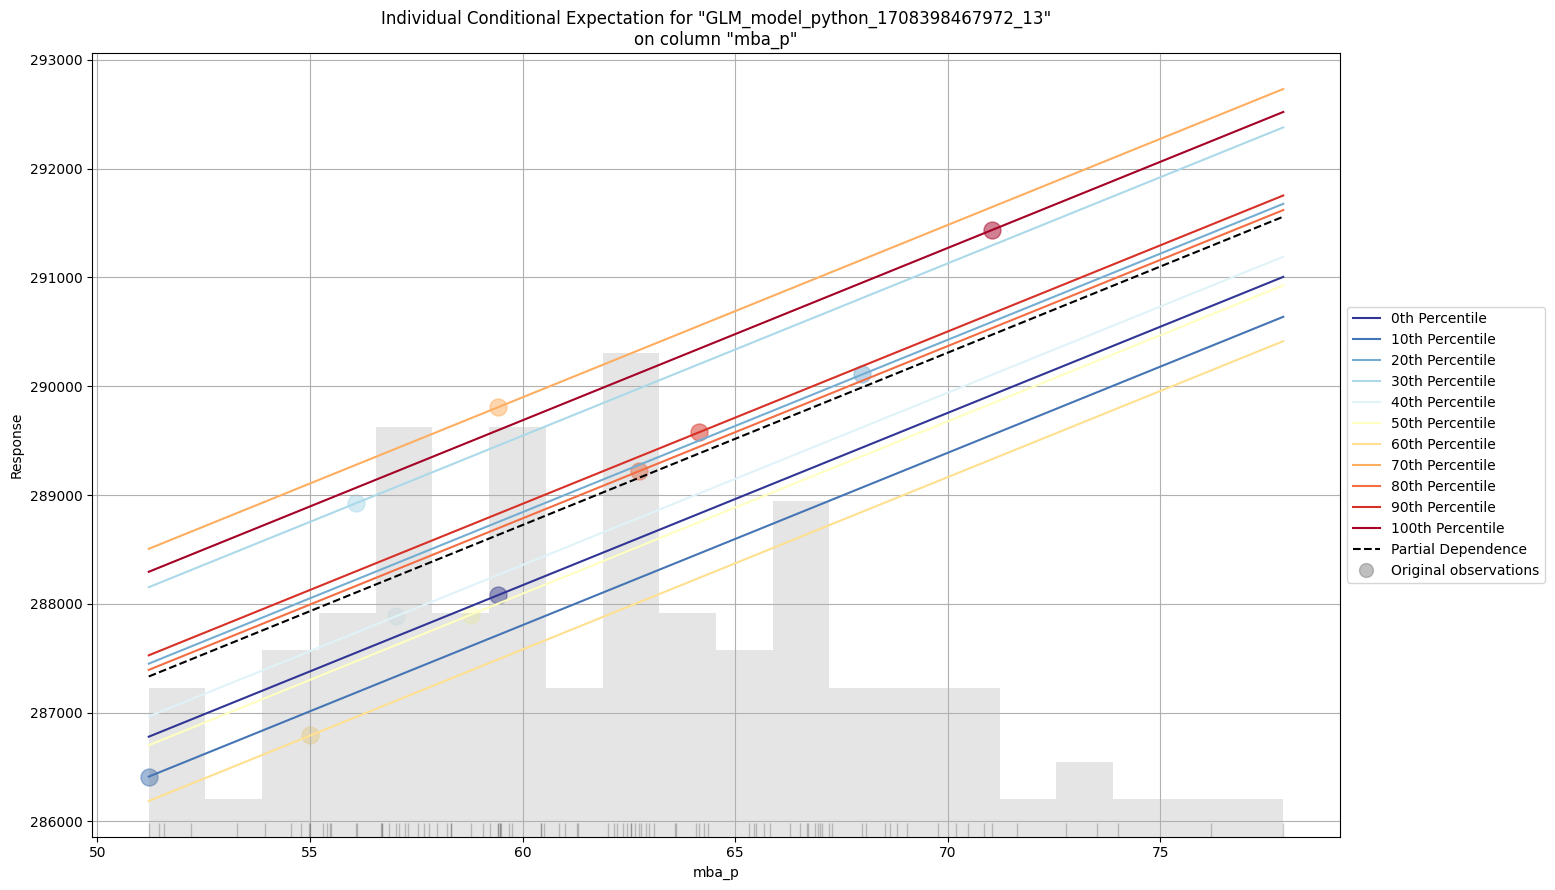

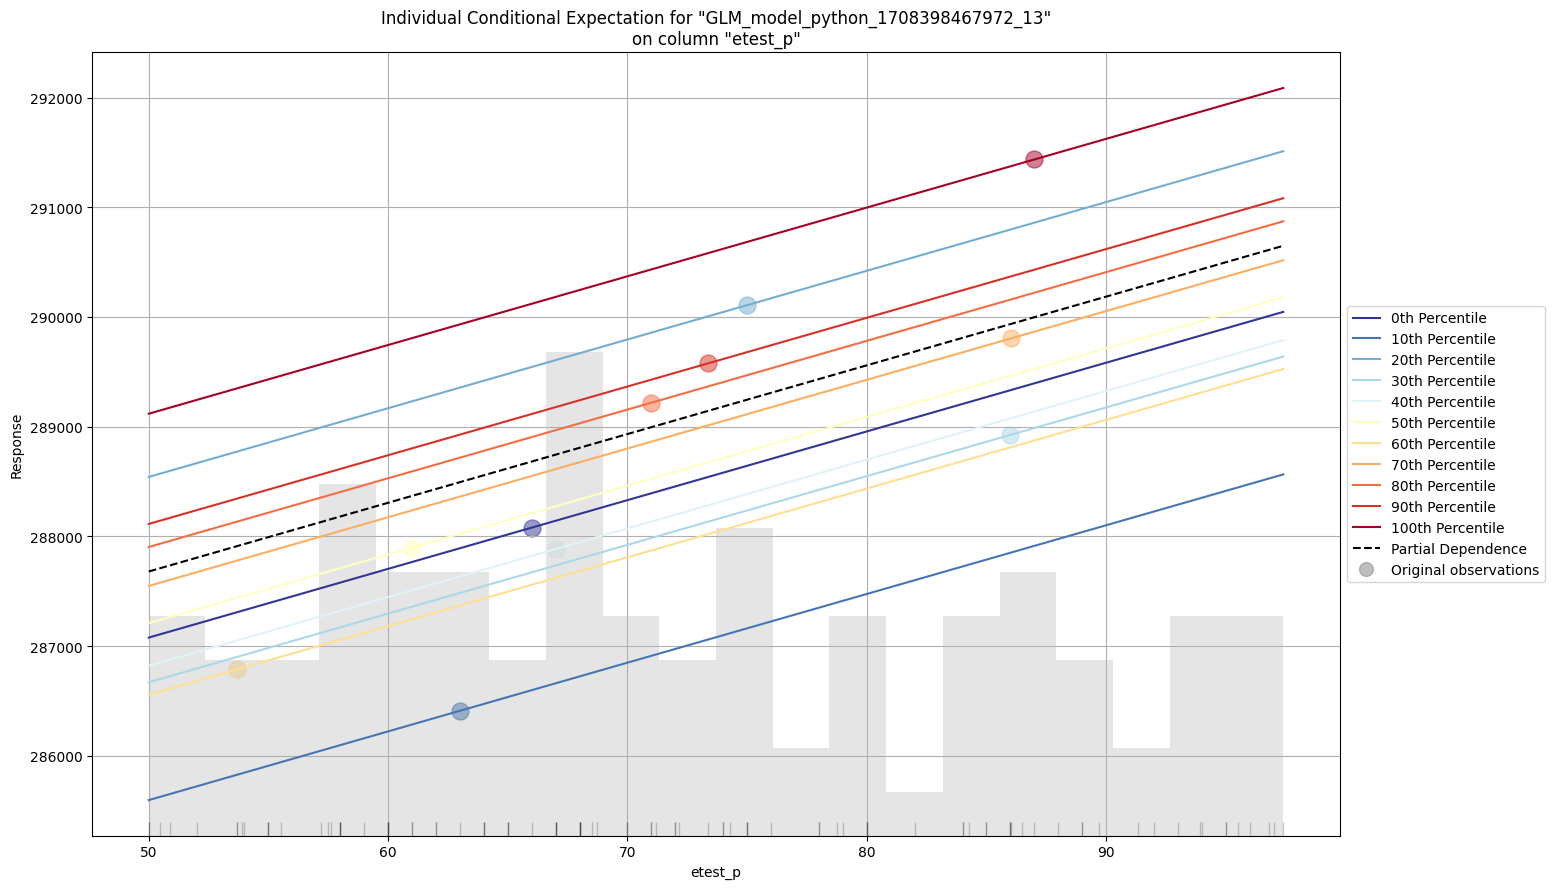

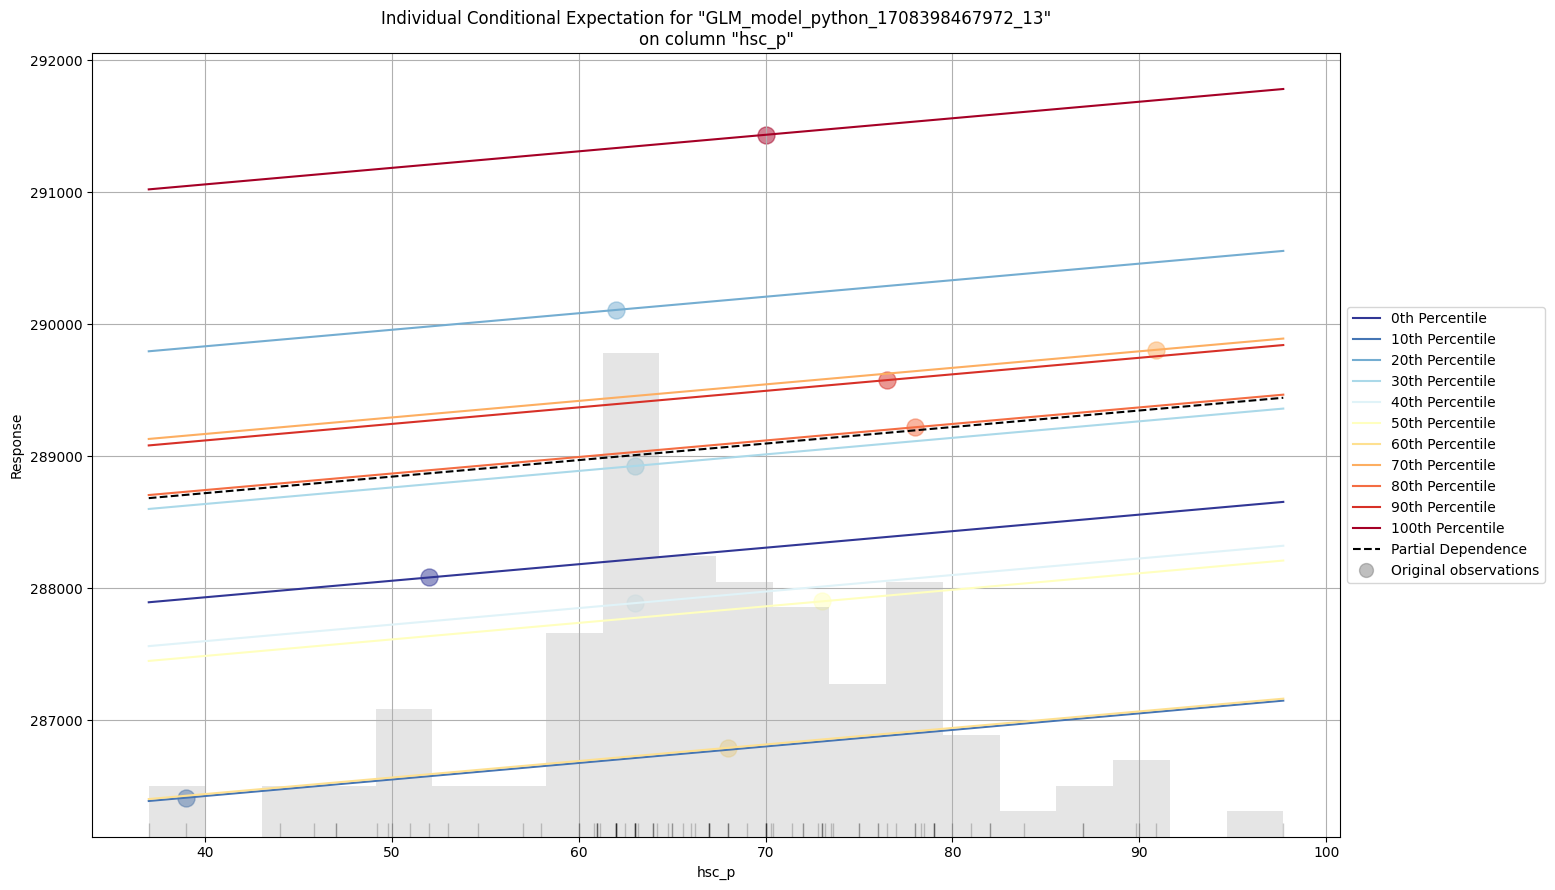

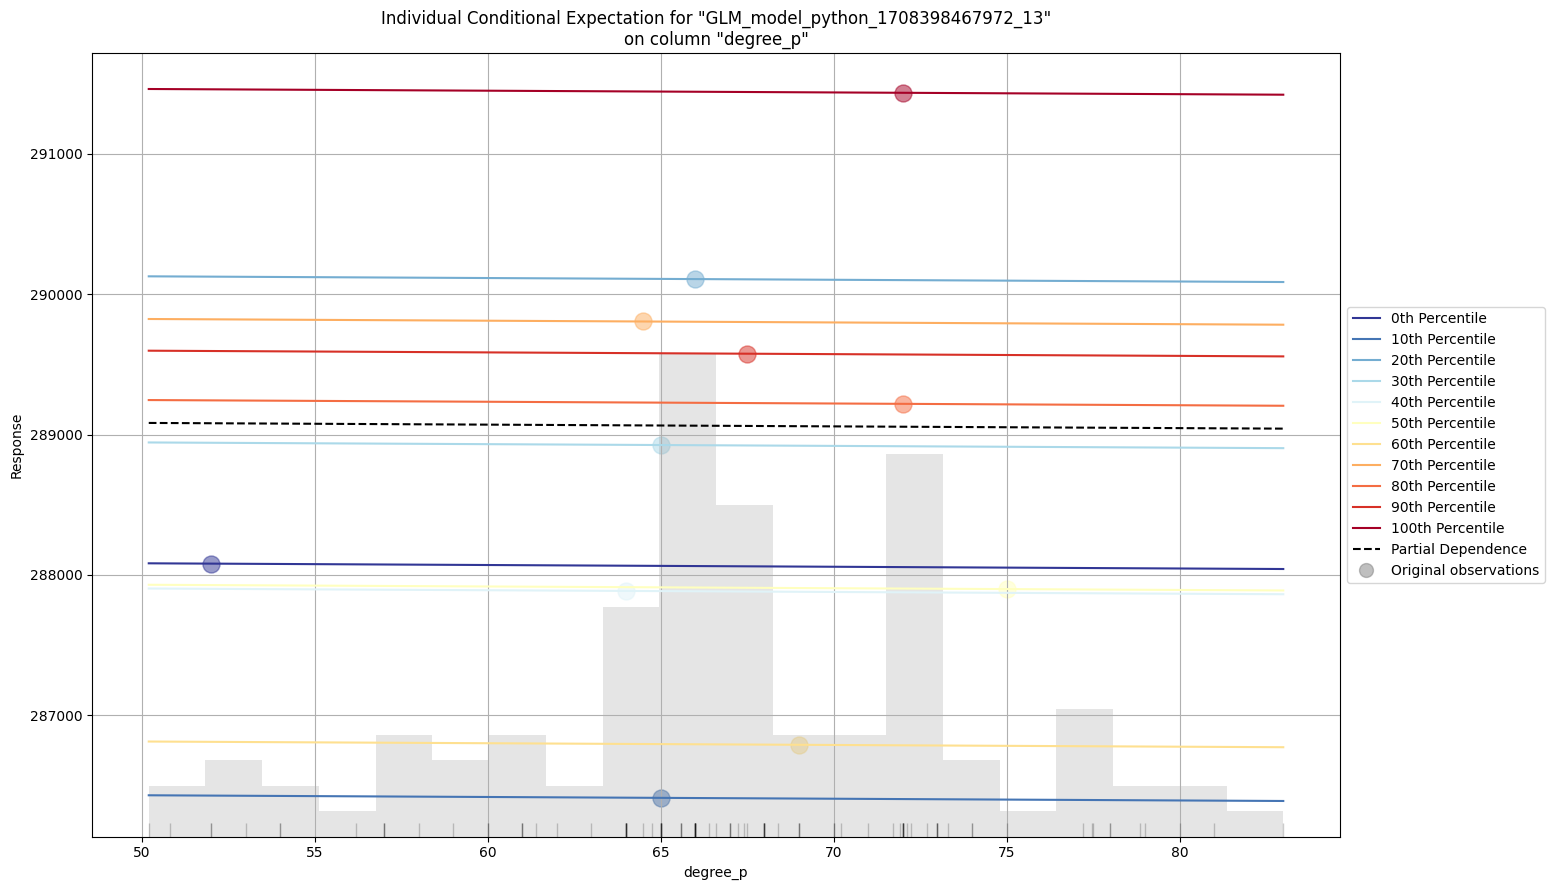

In [240]:
data_glm.explain(train[1:100,:])

The explanations generated by this method typically include details about how the model's coefficients (weights) for the predictor variables affect the predicted values. This can help to understand the relationship between the predictor variables and the response variable based on the specific data subset.

Keep in mind that model explanations can be valuable for model interpretation and understanding the drivers behind the model's predictions. It can provide insights into why the model is making certain predictions and how each predictor variable contributes to those predictions.

The specific content and format of the explanations may vary depending on the machine learning library or framework you are using. It's a valuable tool for understanding the inner workings of your GLM model.

In [241]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1708398467972_14


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    10                 10                          829                    1            1            1             2             2             2

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 8322605957.031832
RMSE: 91228.31773650018
MAE: 52657.78745039683
RMSLE: 0.23416025133693166
Mean Residual Deviance: 8322605957.031832

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 5595315072.933883
RMSE: 74801.83870022102
MAE: 54528.55052768548
RMSLE: 0.24128789012292529
Mean Residual Deviance: 5595315072.933883

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2024-02-20 03:10:10  0.036 sec   0                  96199.4          57959.8         9.25432e+09          73218.5            54581.5           5.36096e+09
    2024-02-20 03:10:10  0.055 sec   1                  95454.7          57501.2         9.1116e+09           73202              54518.2           5.35853e+09
    2024-02-20 03:10:10  0.071 sec   2                  94782.5          56664.8         8.98372e+09          73636.9            54605             5.42239e+09
    2024-02-20 03:10:10  0.080 sec   3                  94186            56257.3         8.871e+09            73621.4            54520.7           5.42011e+09
    2024-02-20 03:10:10  0.094 sec   4                  93648.1          55513.9         8.76997e+09          74078.1            54690.7           5.48756e+09
    2024-02-20 03:10:10  0.101 sec   5                  93171.6          55151.7         8.68094e+09          74063.7            54615.8           5.48543e+09
    2024-02-20 03:10:10  0.108 sec   6                  92710.7          54377.3         8.59528e+09          74296.7            54588.1           5.52e+09
    2024-02-20 03:10:10  0.115 sec   7                  92298.8          53731.5         8.51906e+09          74743.4            54735.8           5.58658e+09
    2024-02-20 03:10:10  0.121 sec   8                  91927            53579.8         8.45058e+09          74729.4            54670.1           5.58449e+09
    2024-02-20 03:10:10  0.127 sec   9                  91575            52935.2         8.38597e+09          74976.4            54646.1           5.62146e+09
    2024-02-20 03:10:10  0.136 sec   10                 91228.3          52657.8         8.32261e+09          74801.8            54528.6           5.59532e+09

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
hsc_p       3.15875e+11            1                    0.51123
mba_p       2.02351e+11            0.640604             0.327496
etest_p     9.96468e+10            0.315463             0.161274
degree_p    0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

The GBM model has been configured to use 10 shallow trees (ntrees = 10 and max_depth = 1), which suggests a conservative approach to modeling that might not capture complex interactions in the data.

balance_classes is set to True, indicating an attempt to handle class imbalance, which would be relevant if the task were classification. However, for regression tasks like predicting salary, this parameter does not apply.

The MSE and RMSE on both training and validation data are high. For example, the RMSE on validation data is around 59800, which is significant, considering the salary values range from tens to hundreds of thousands.
The high RMSE and MSE values suggest the model is not predicting the exact salary figures very accurately.

The Scoring History shows the RMSE for both the training and validation sets across the boosting iterations, indicating how the model error decreases with each additional tree.

hsc_p (Higher Secondary Education percentage) is shown to be the most important variable, followed by degree_p (Degree percentage), suggesting these academic performance metrics are influential in predicting the salary.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

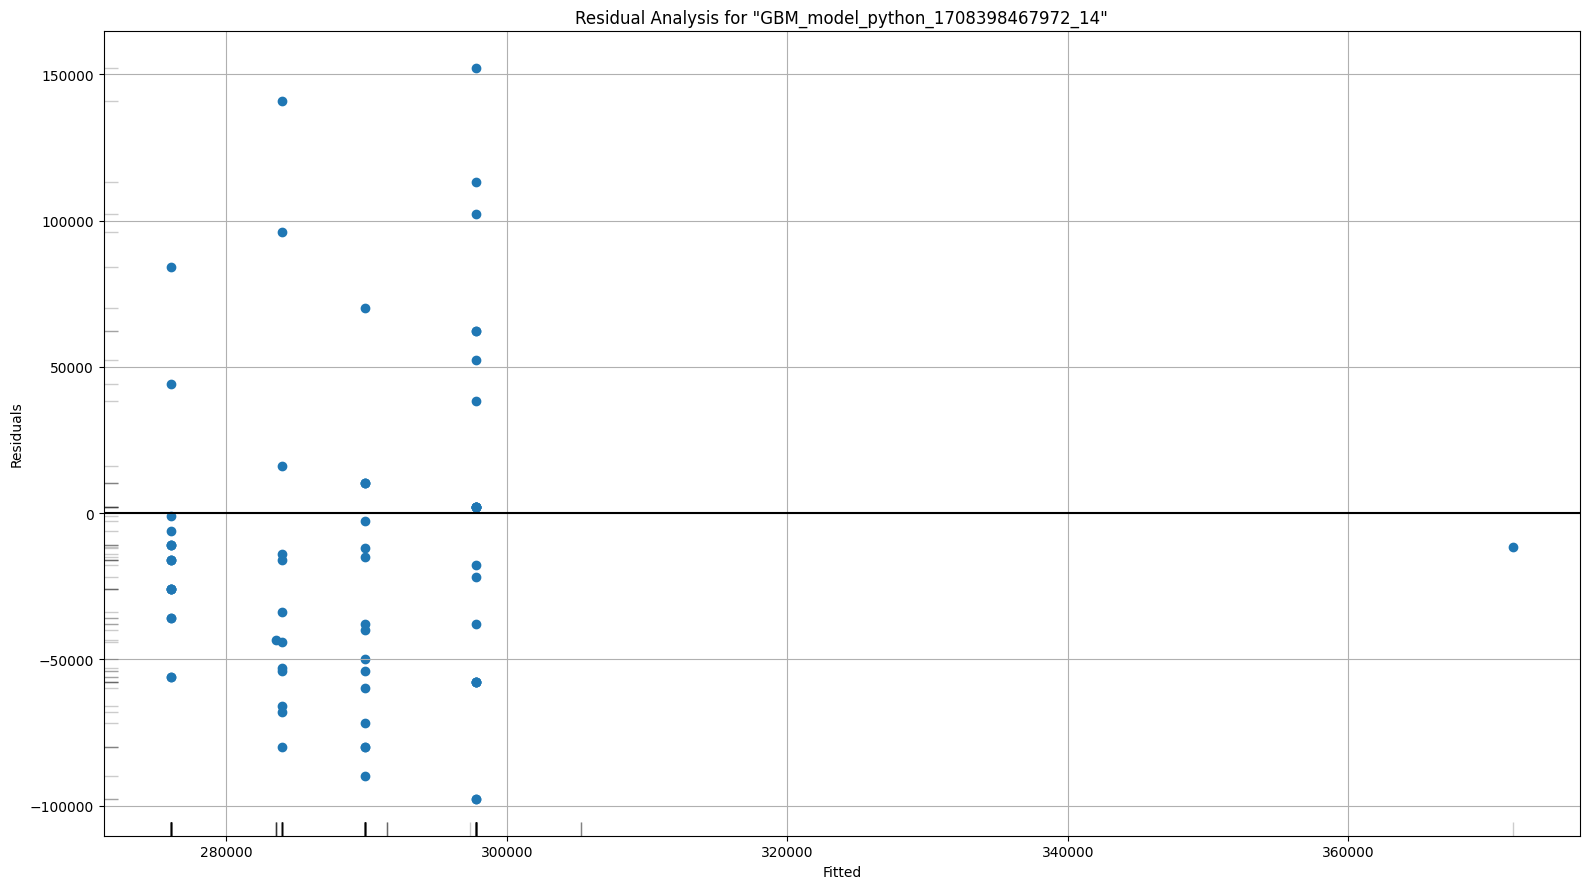

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

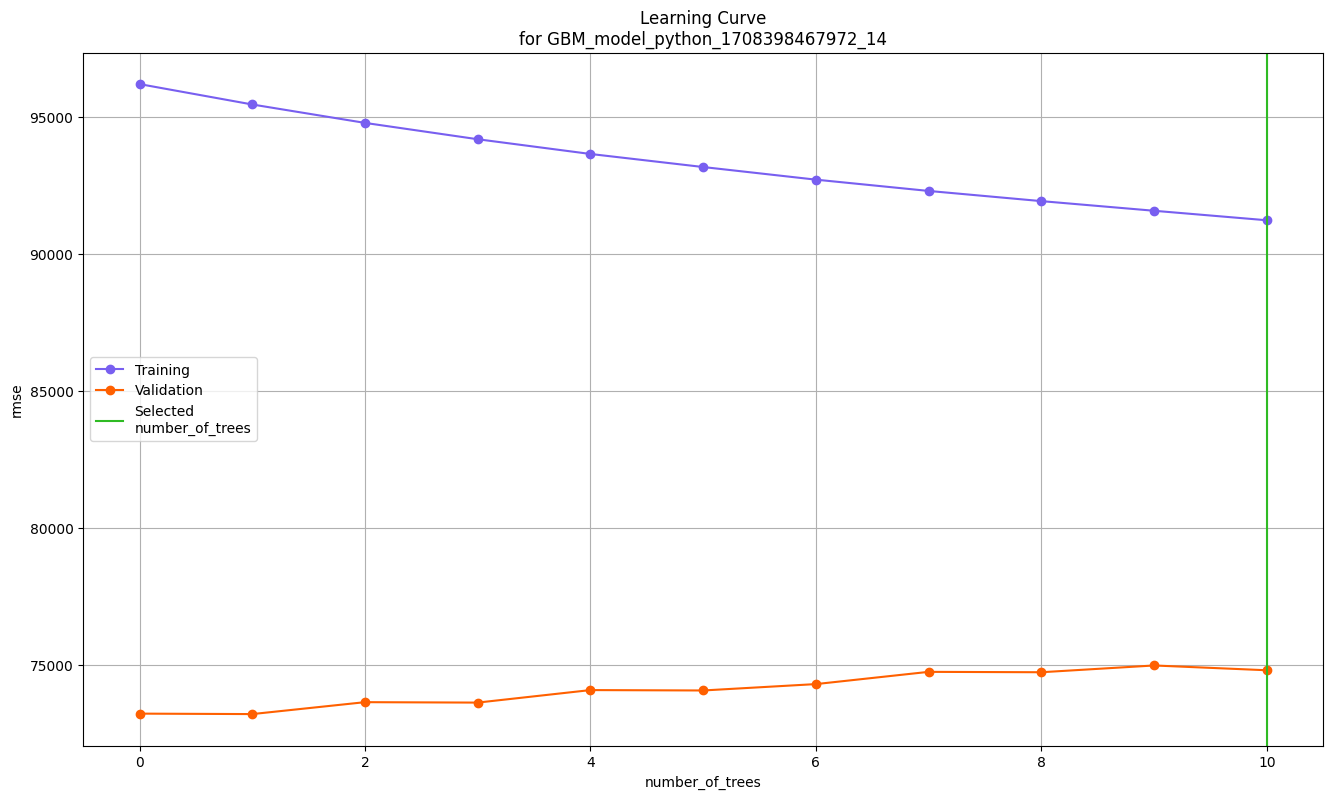

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

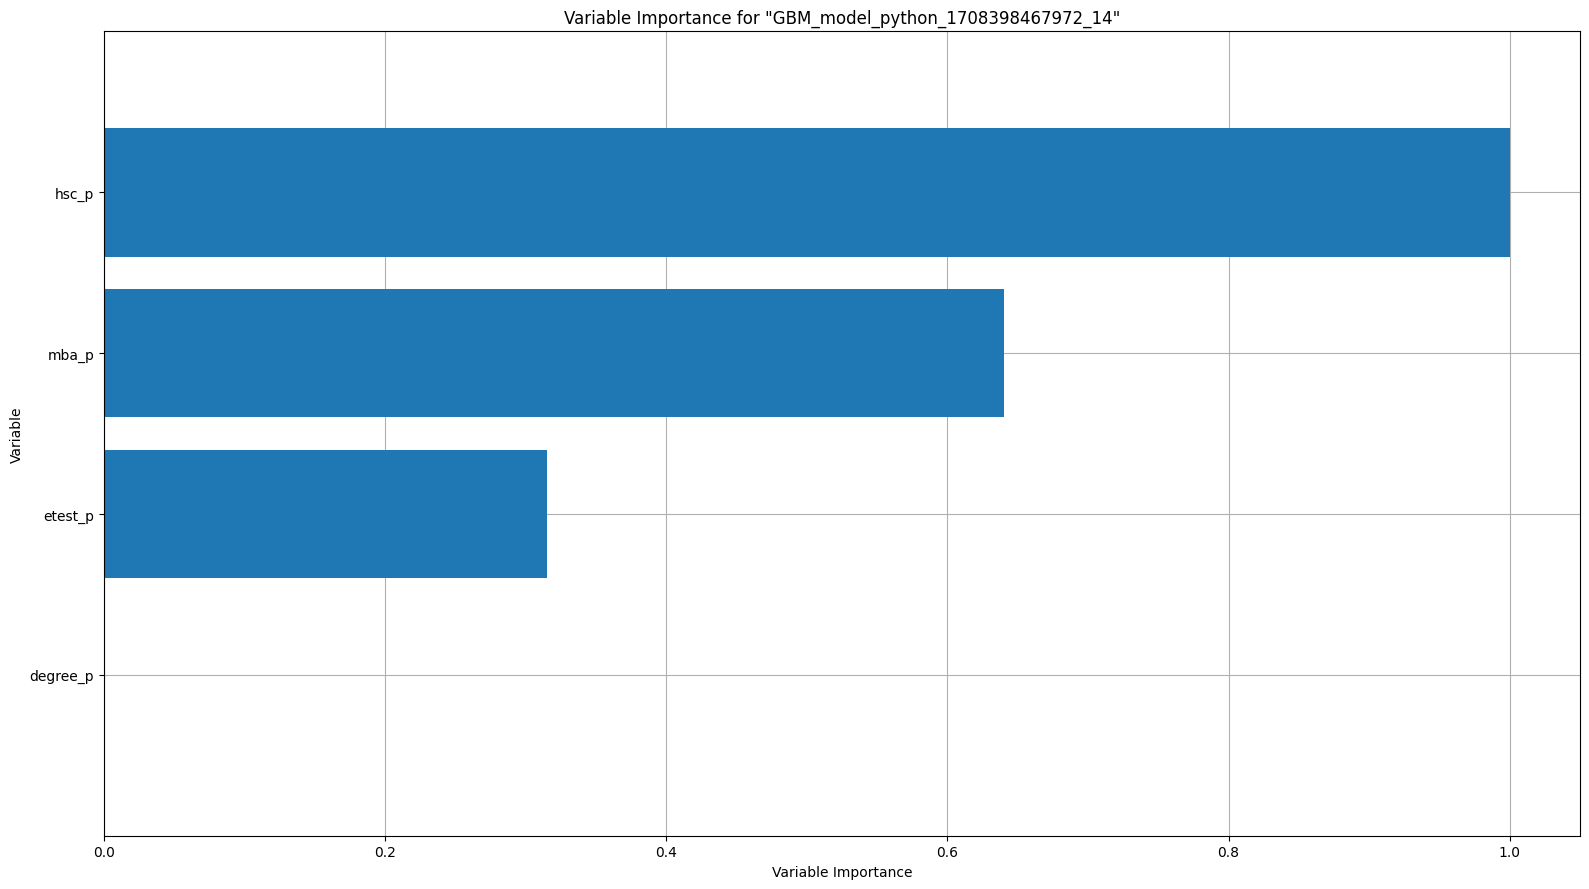

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

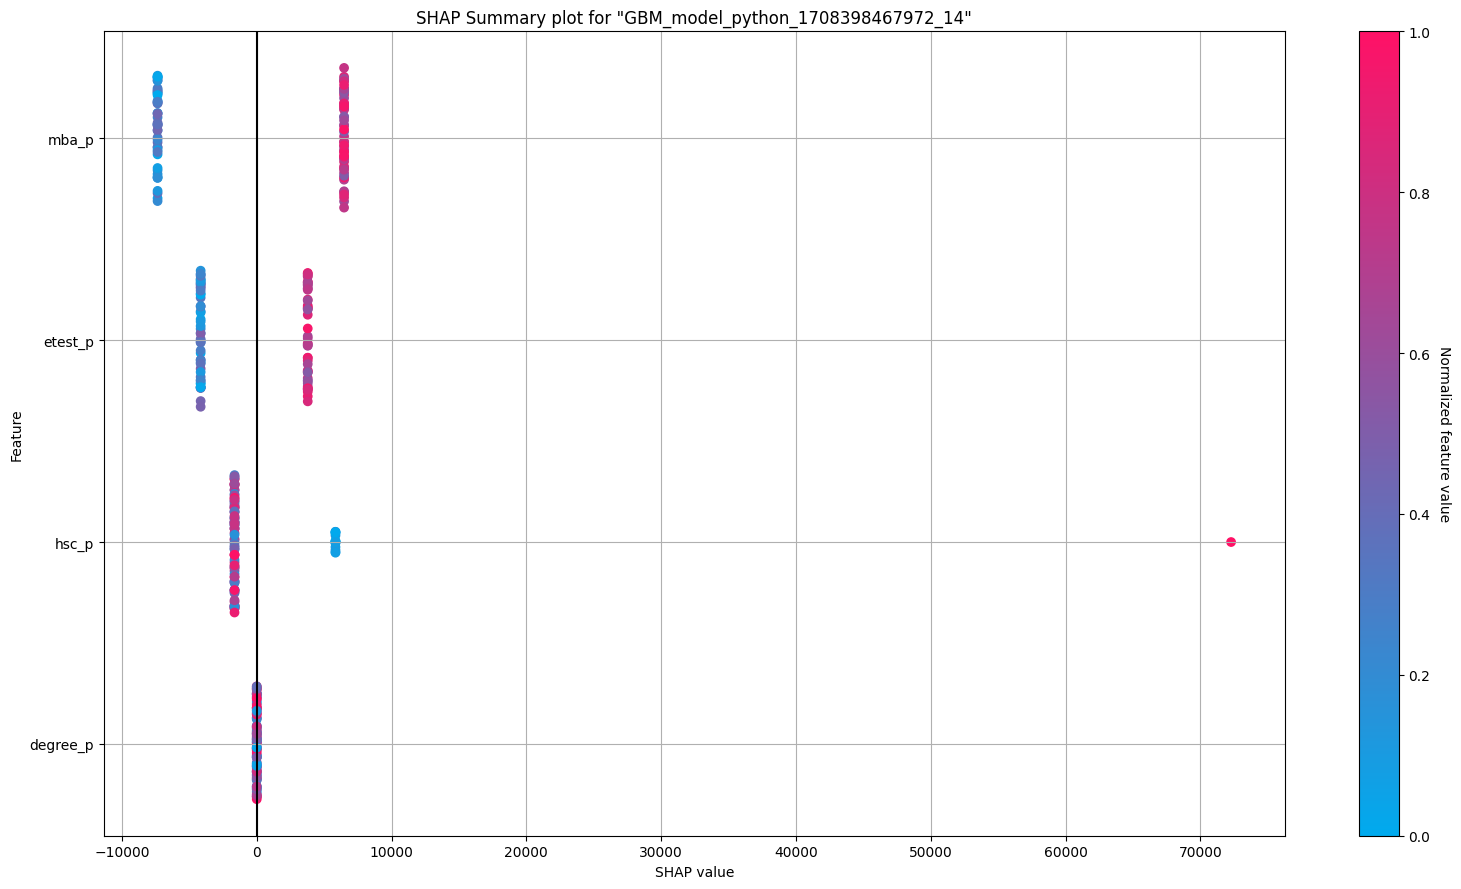

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

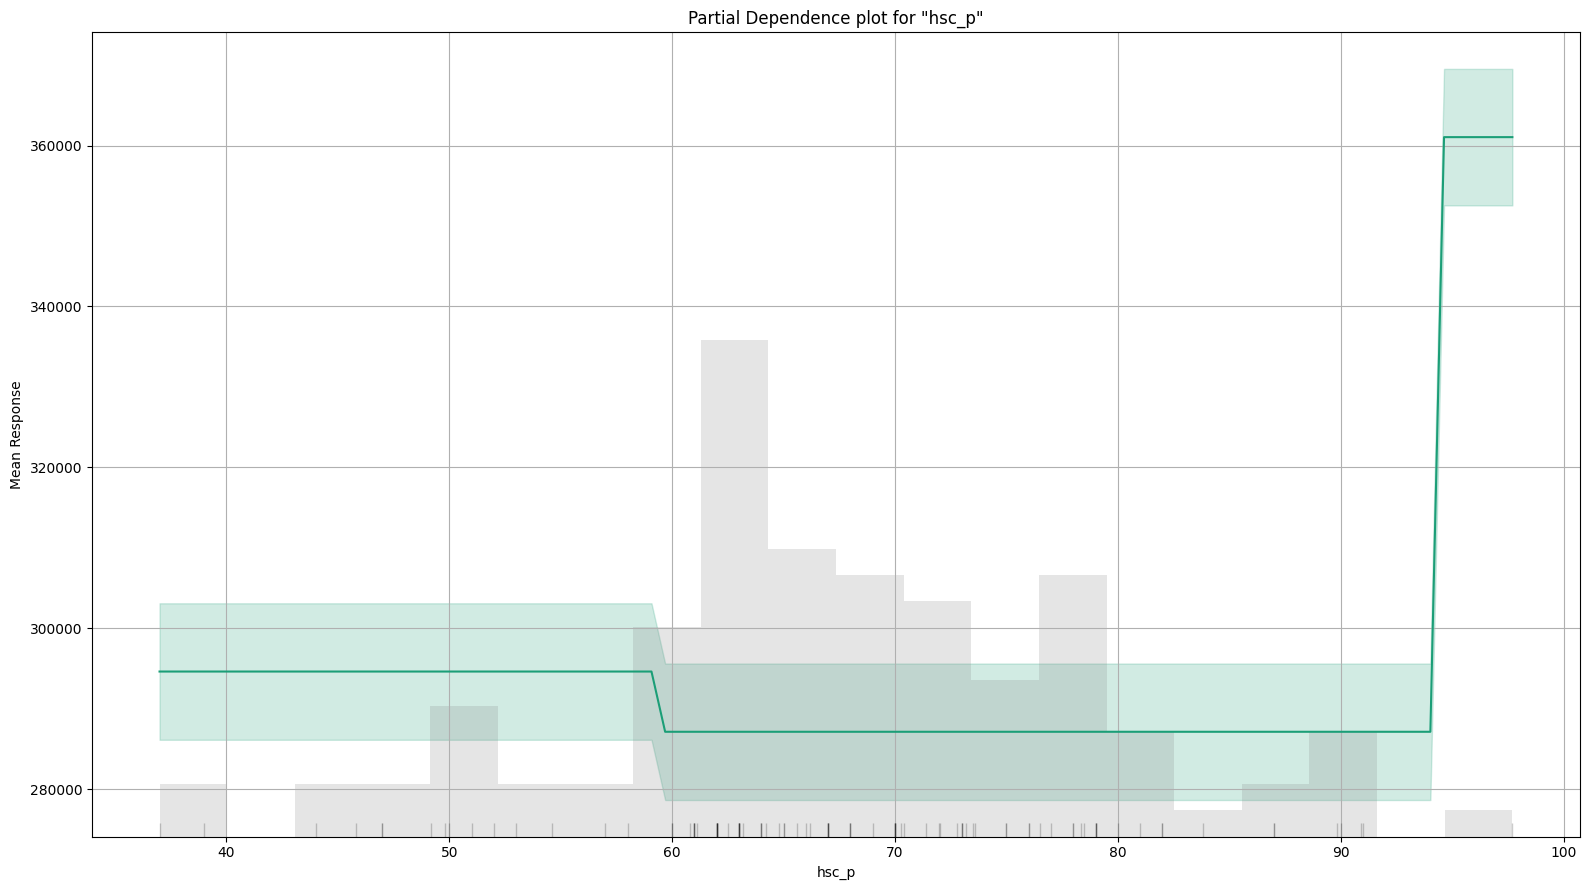

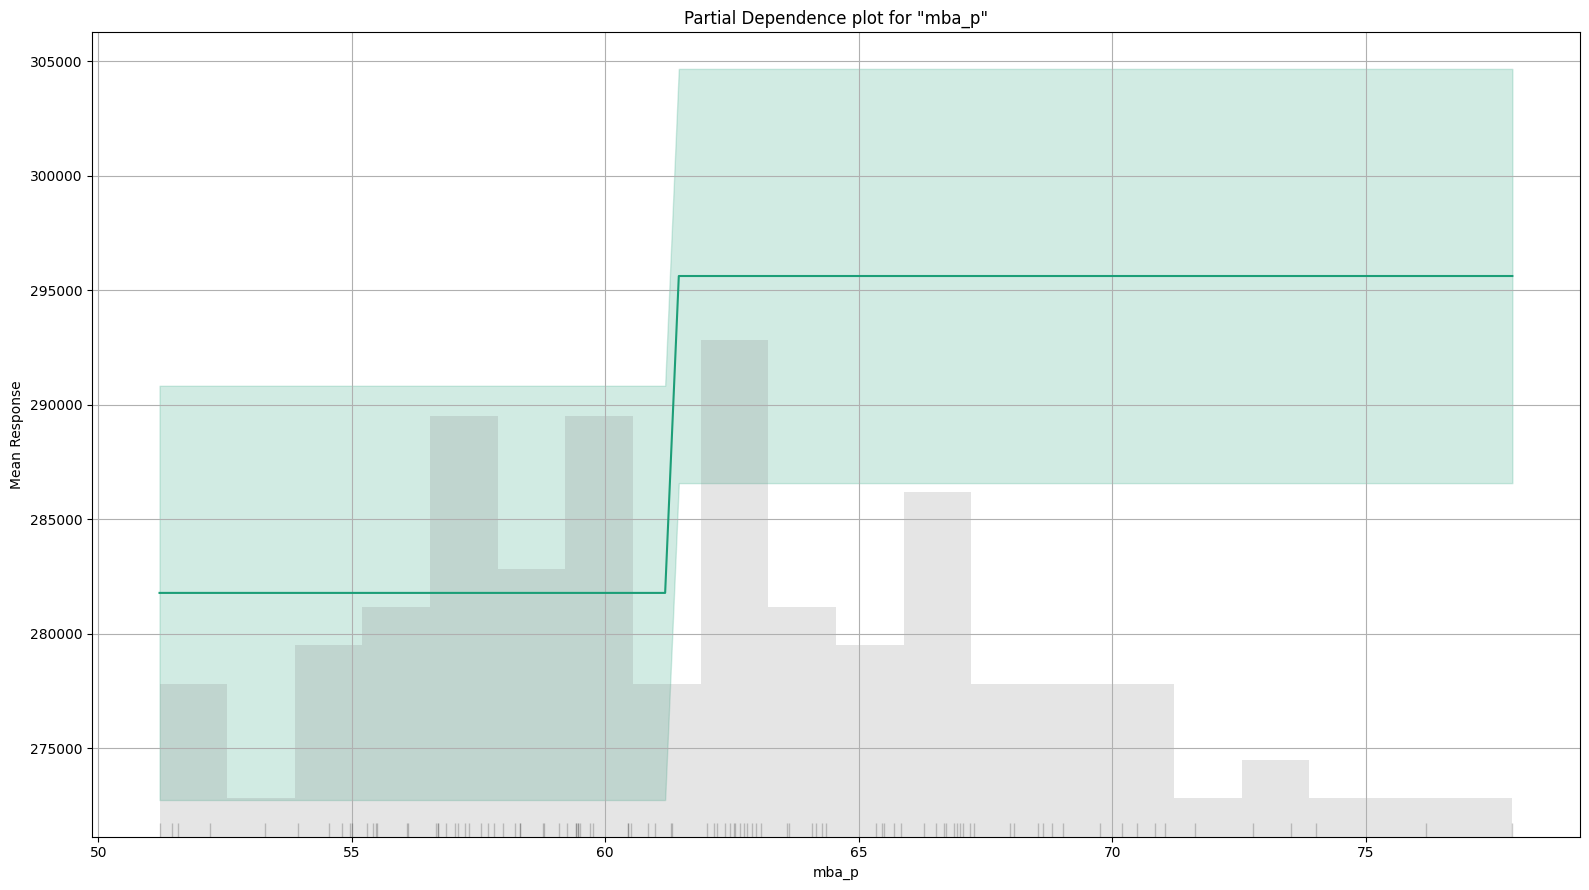

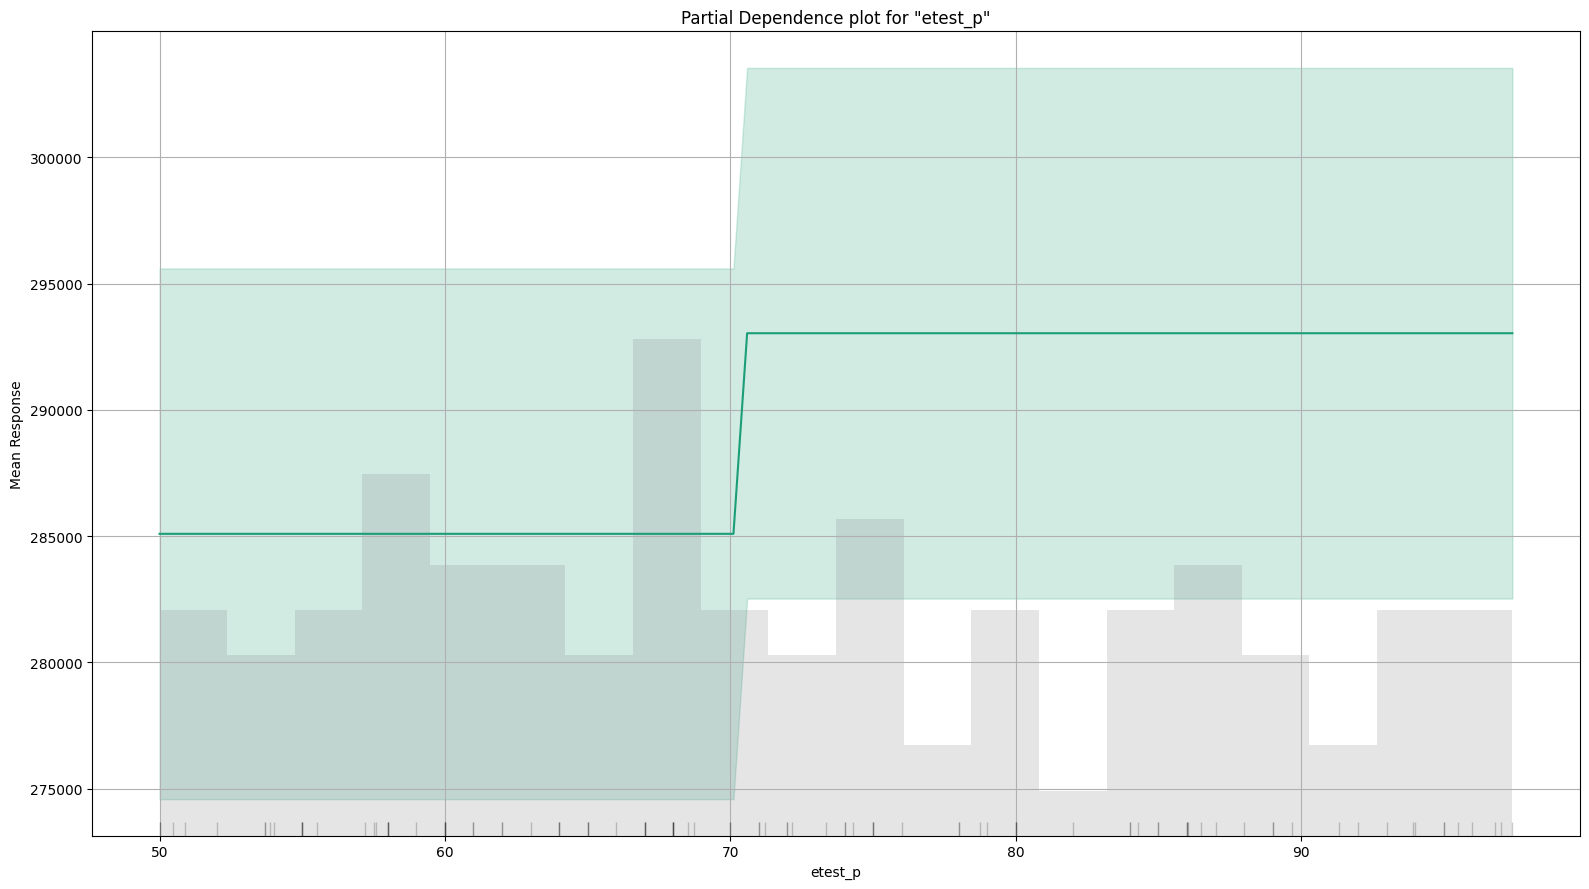

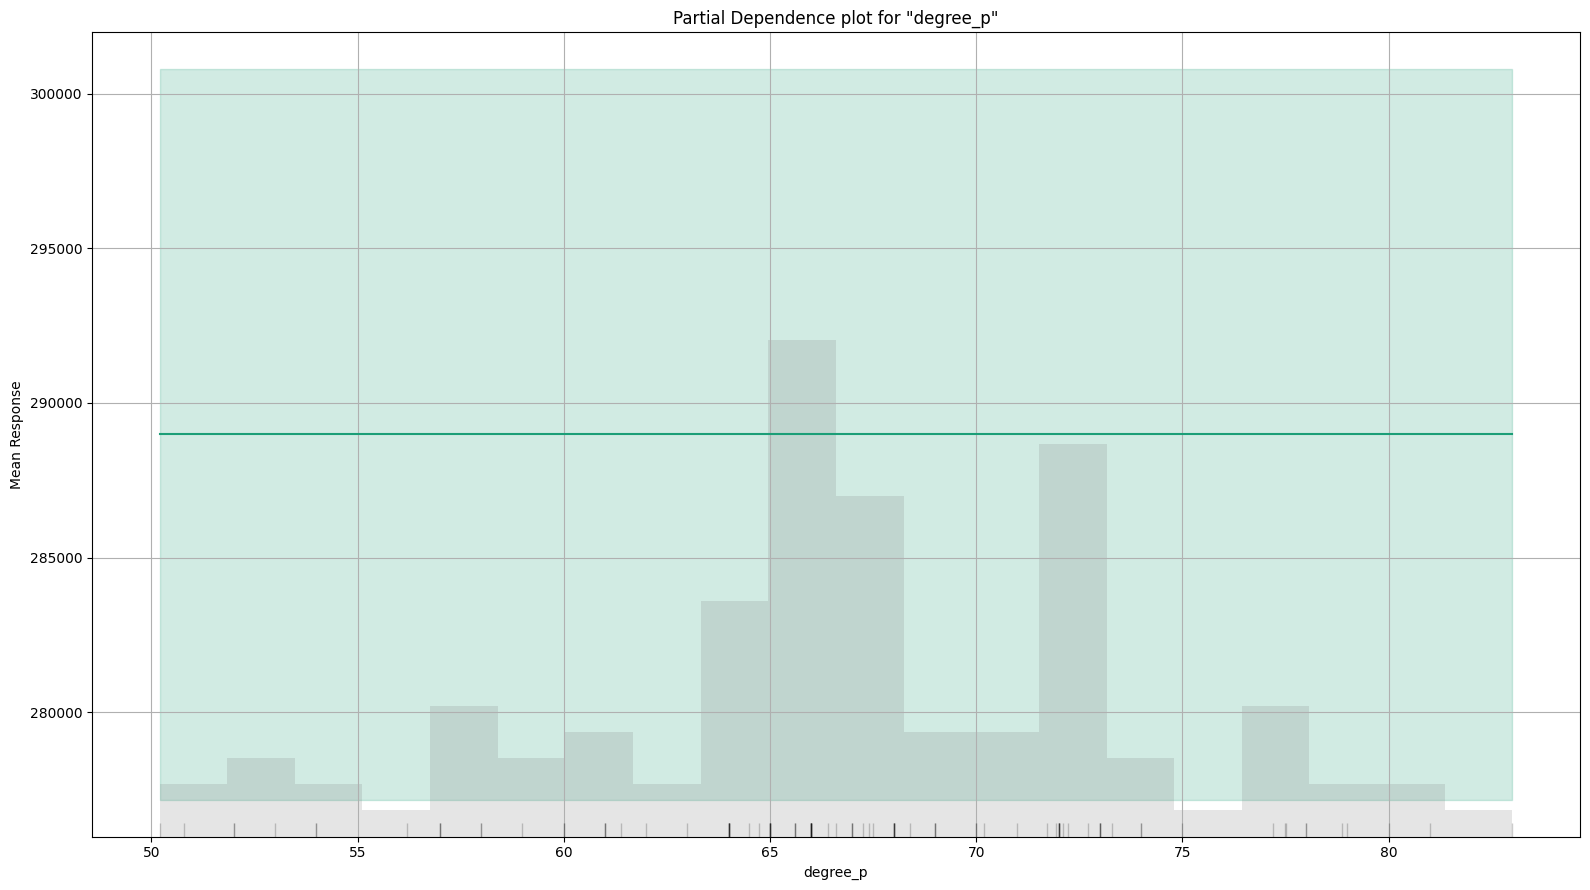

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

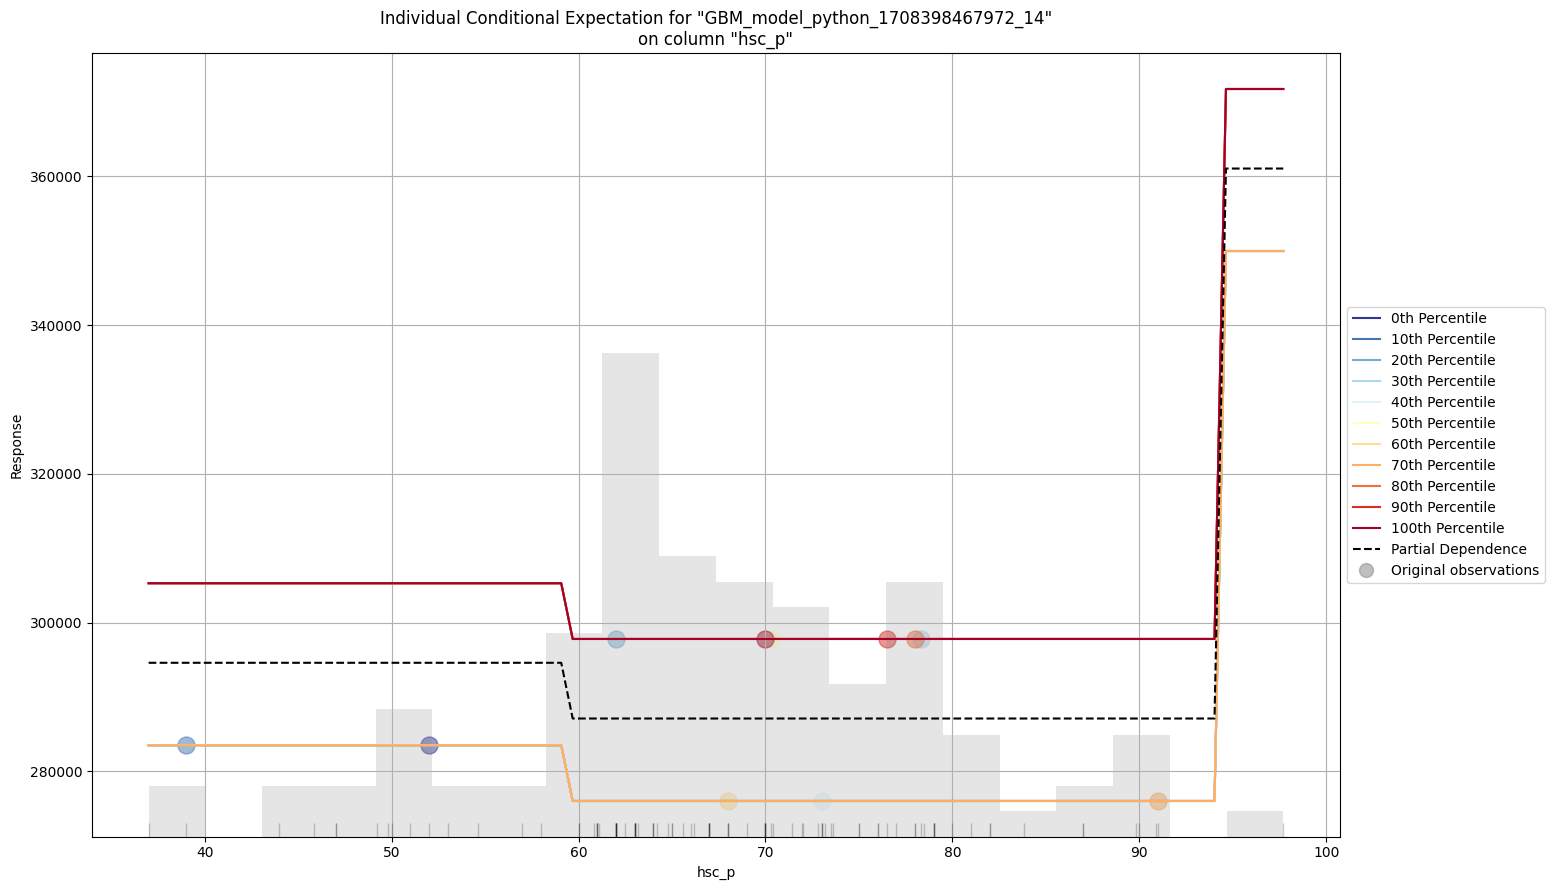

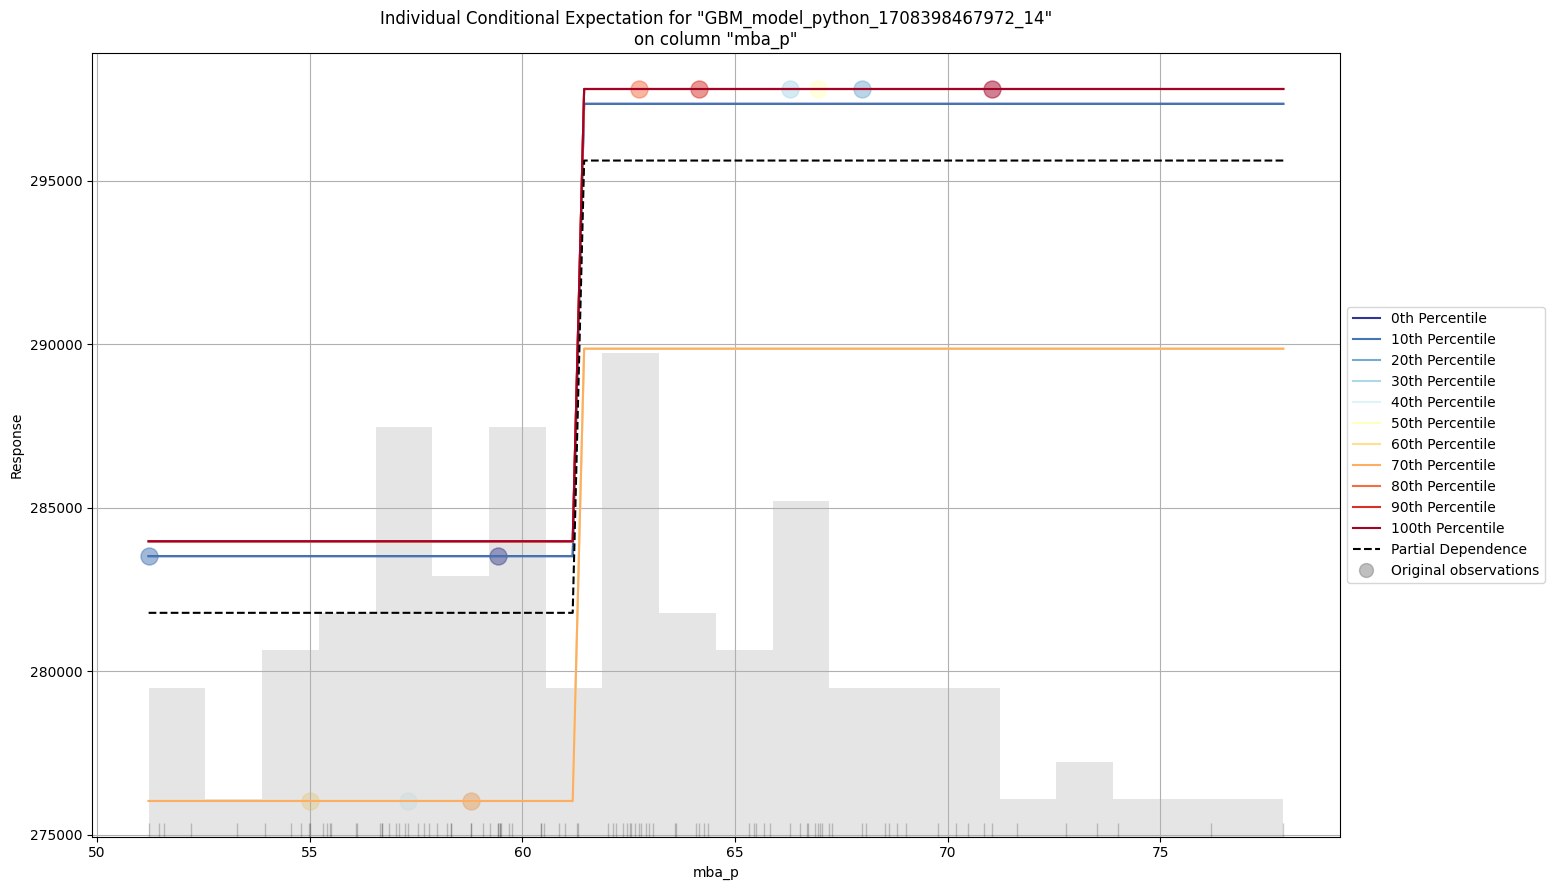

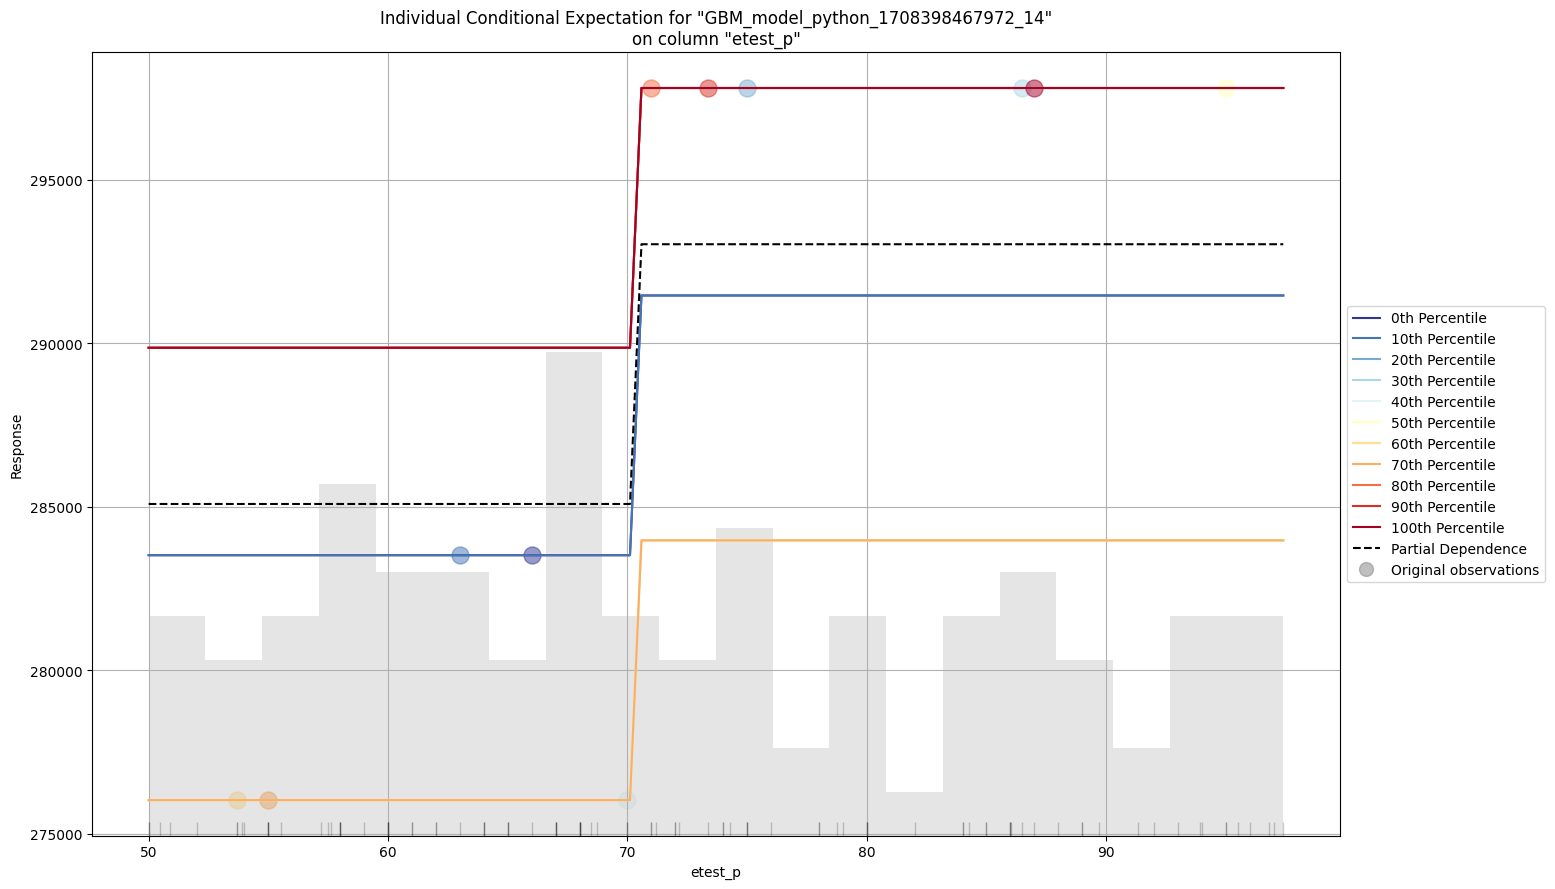

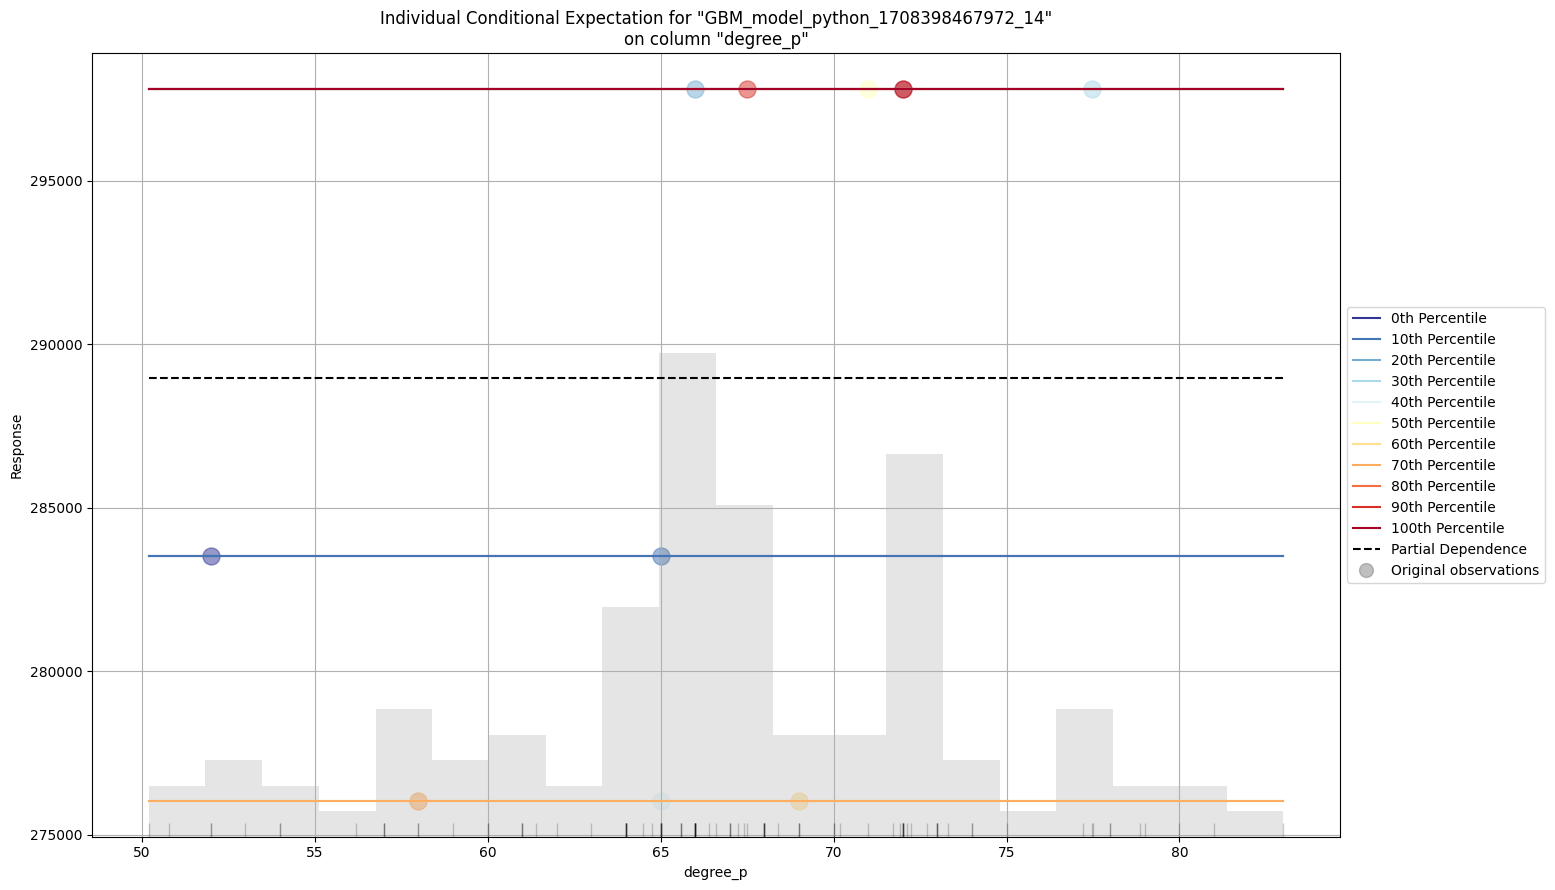

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

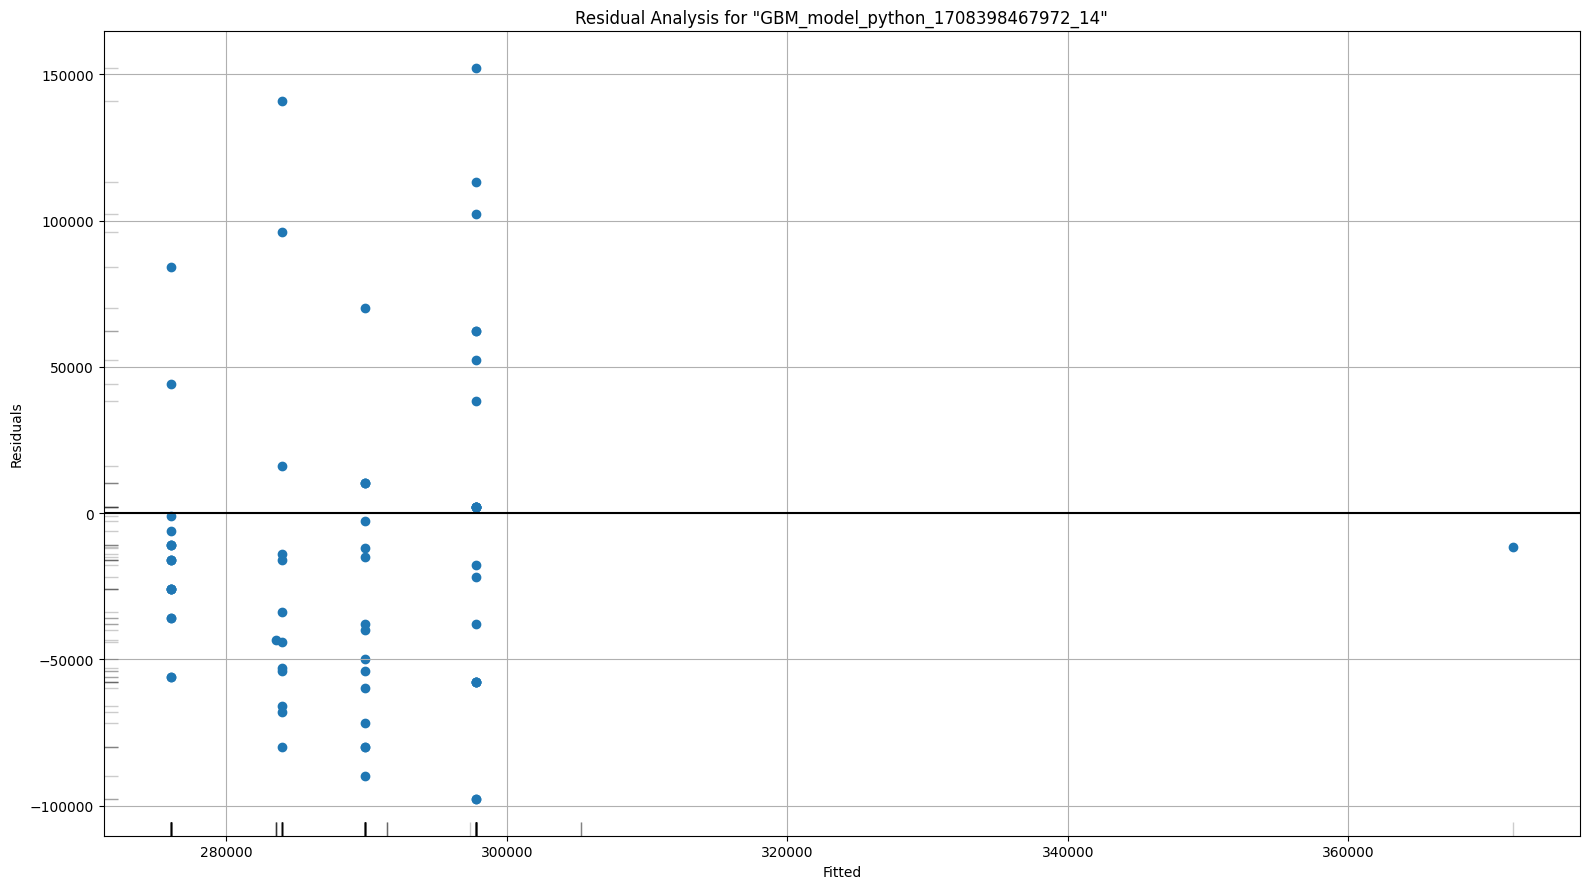

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

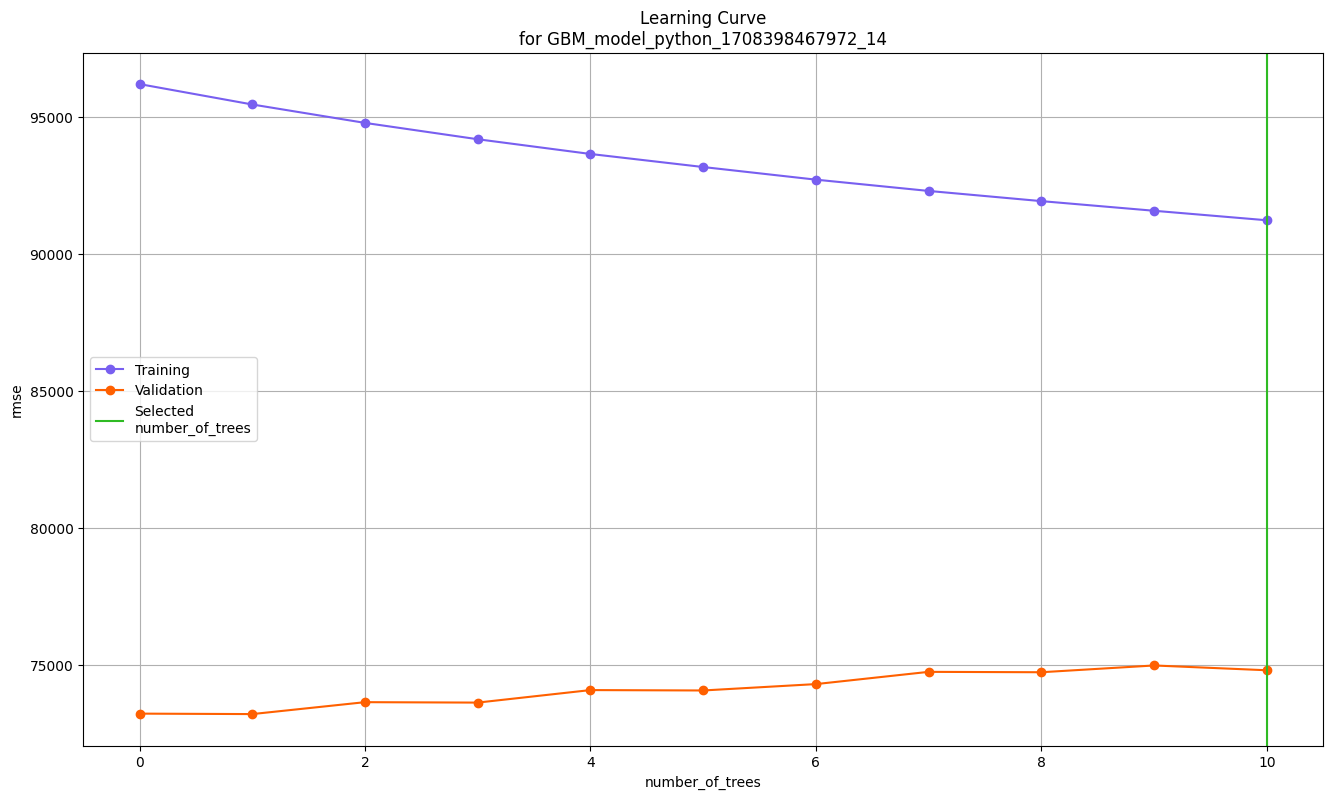

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

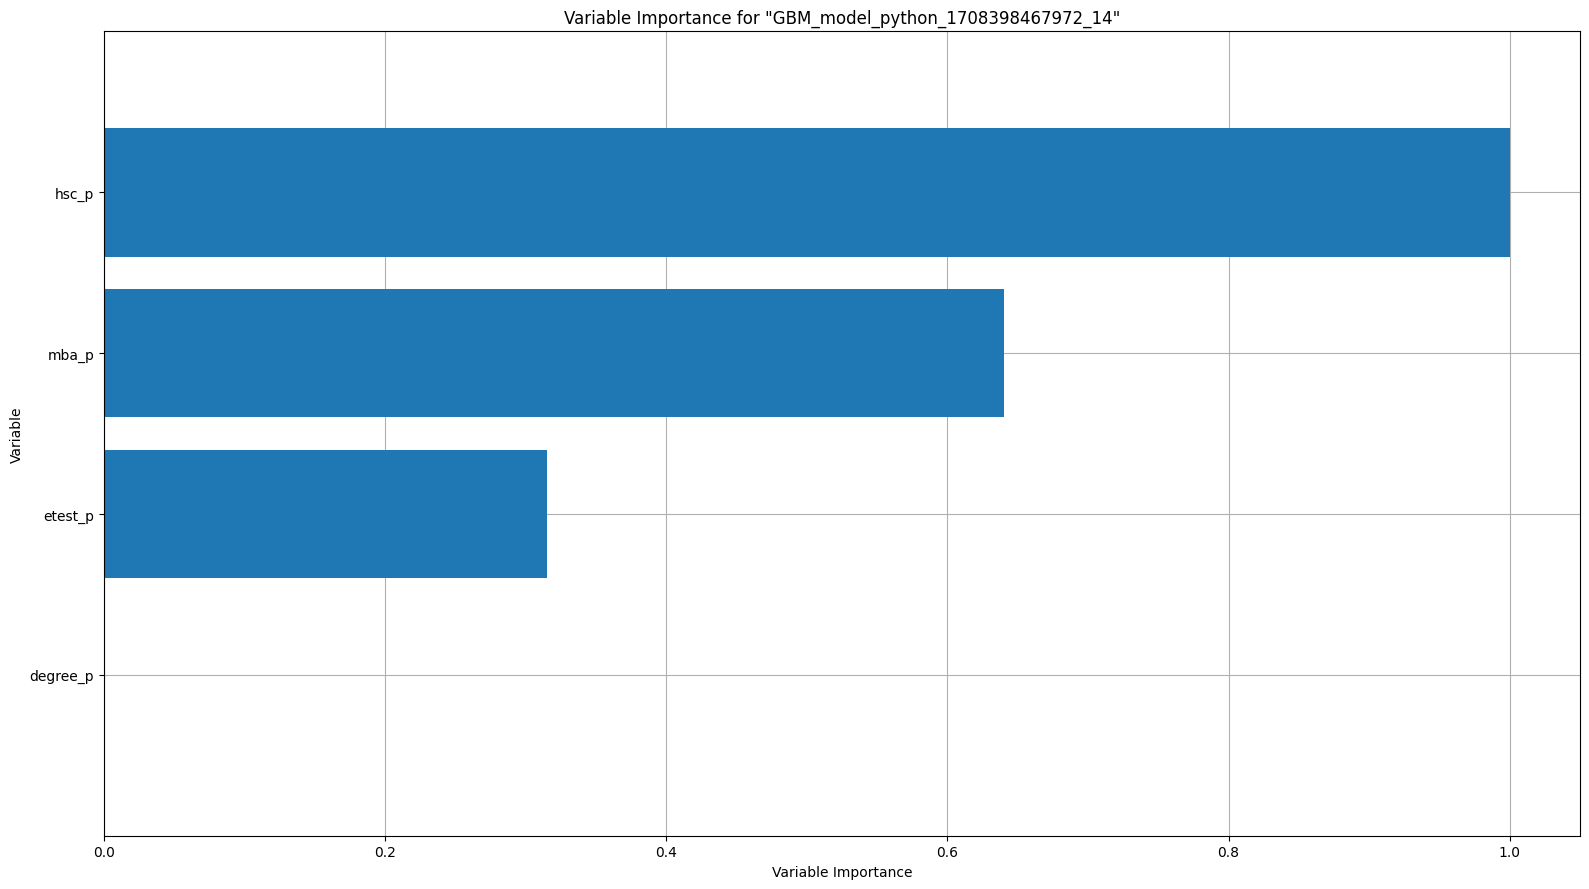

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

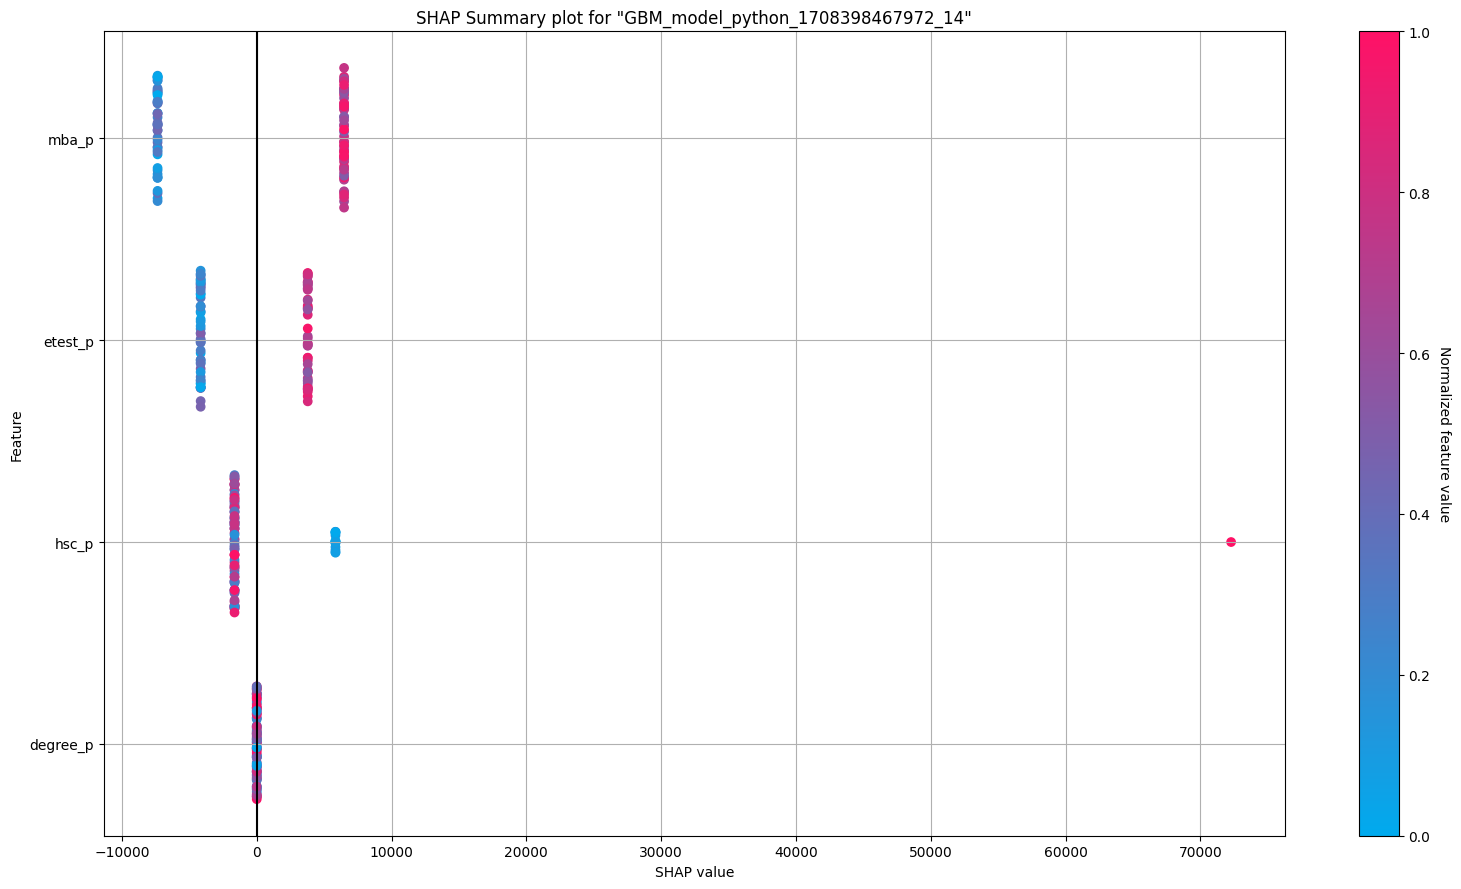

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

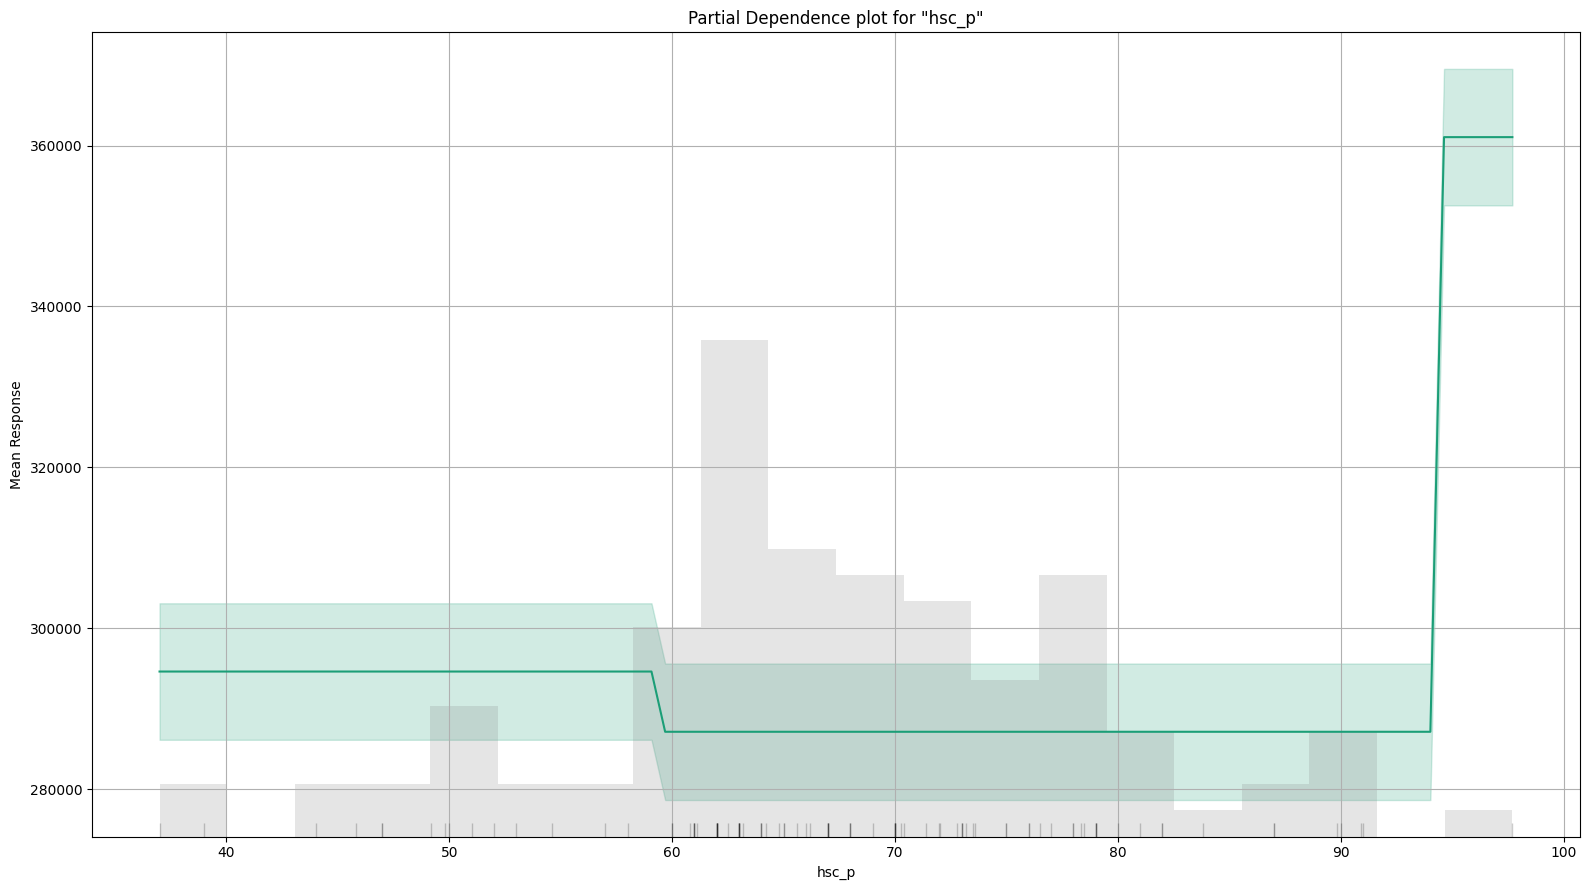

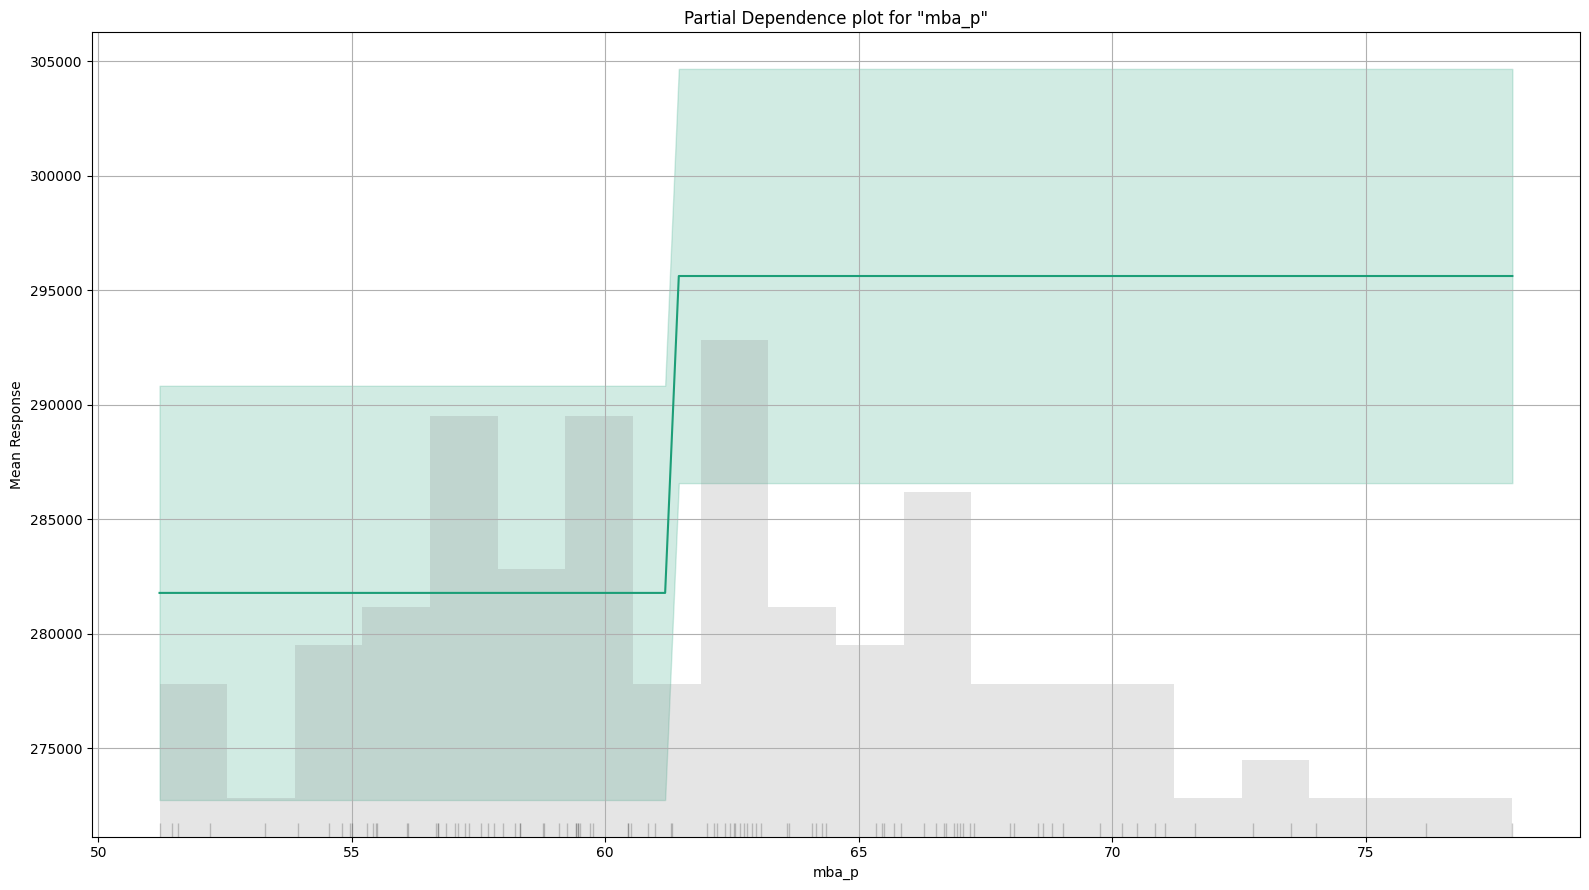

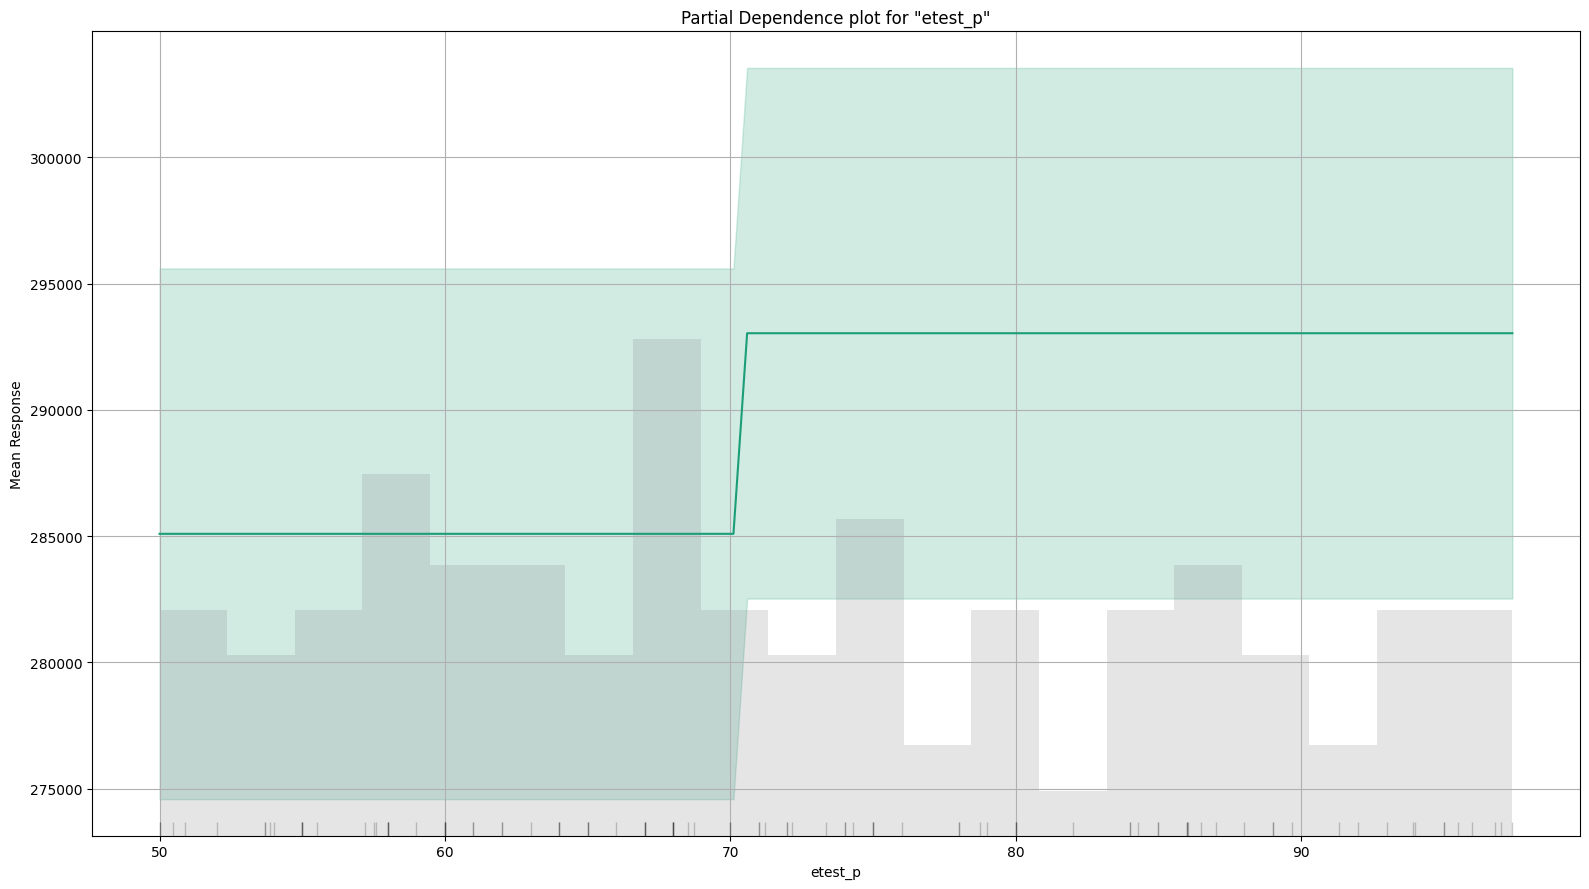

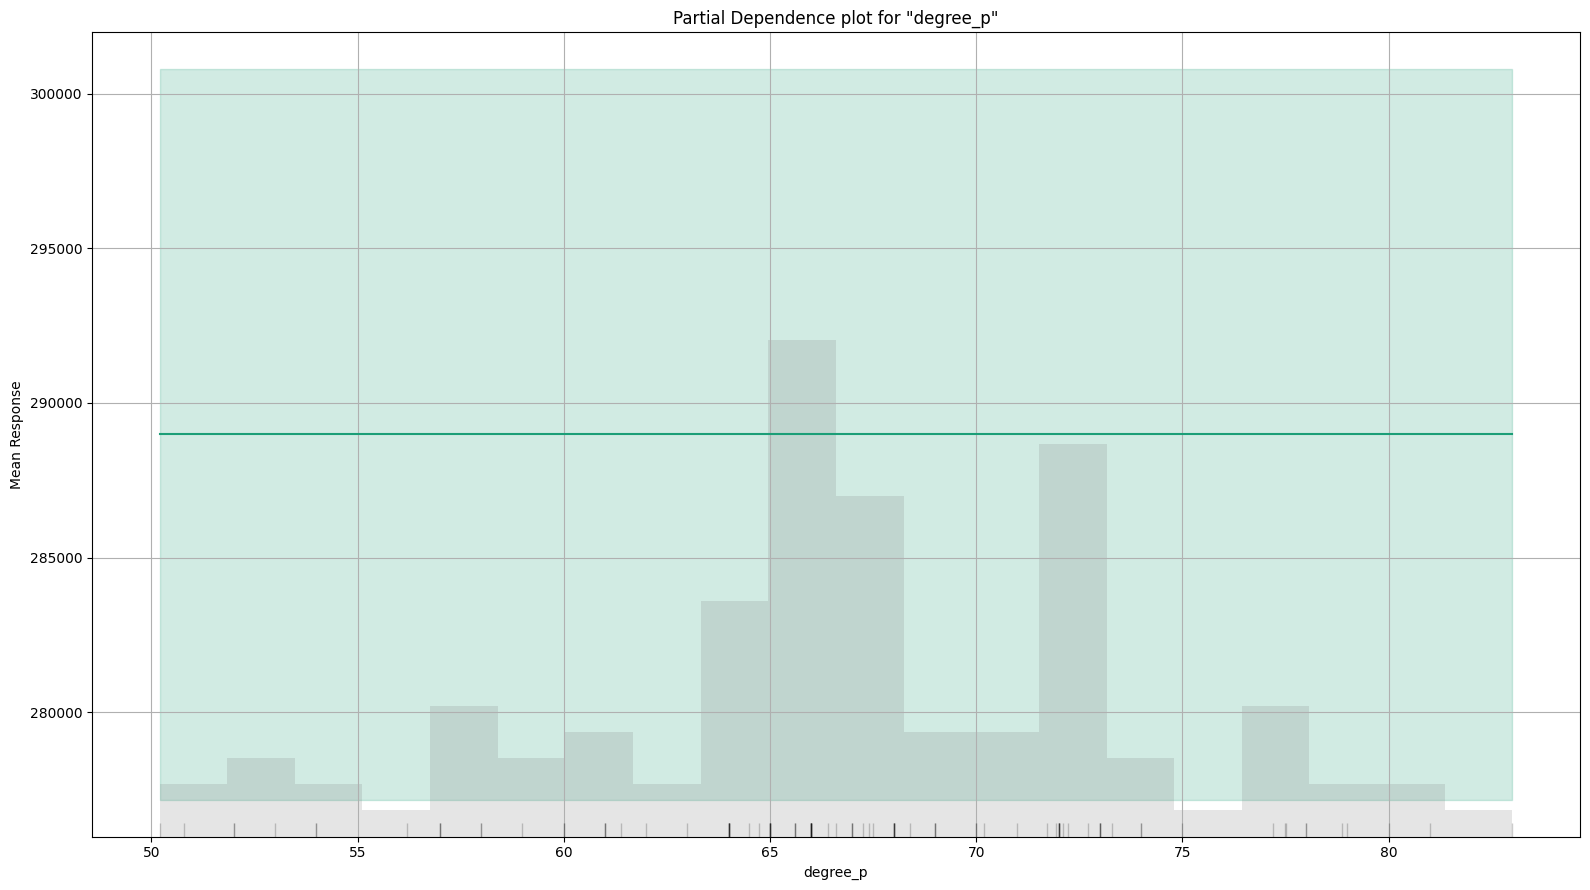

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

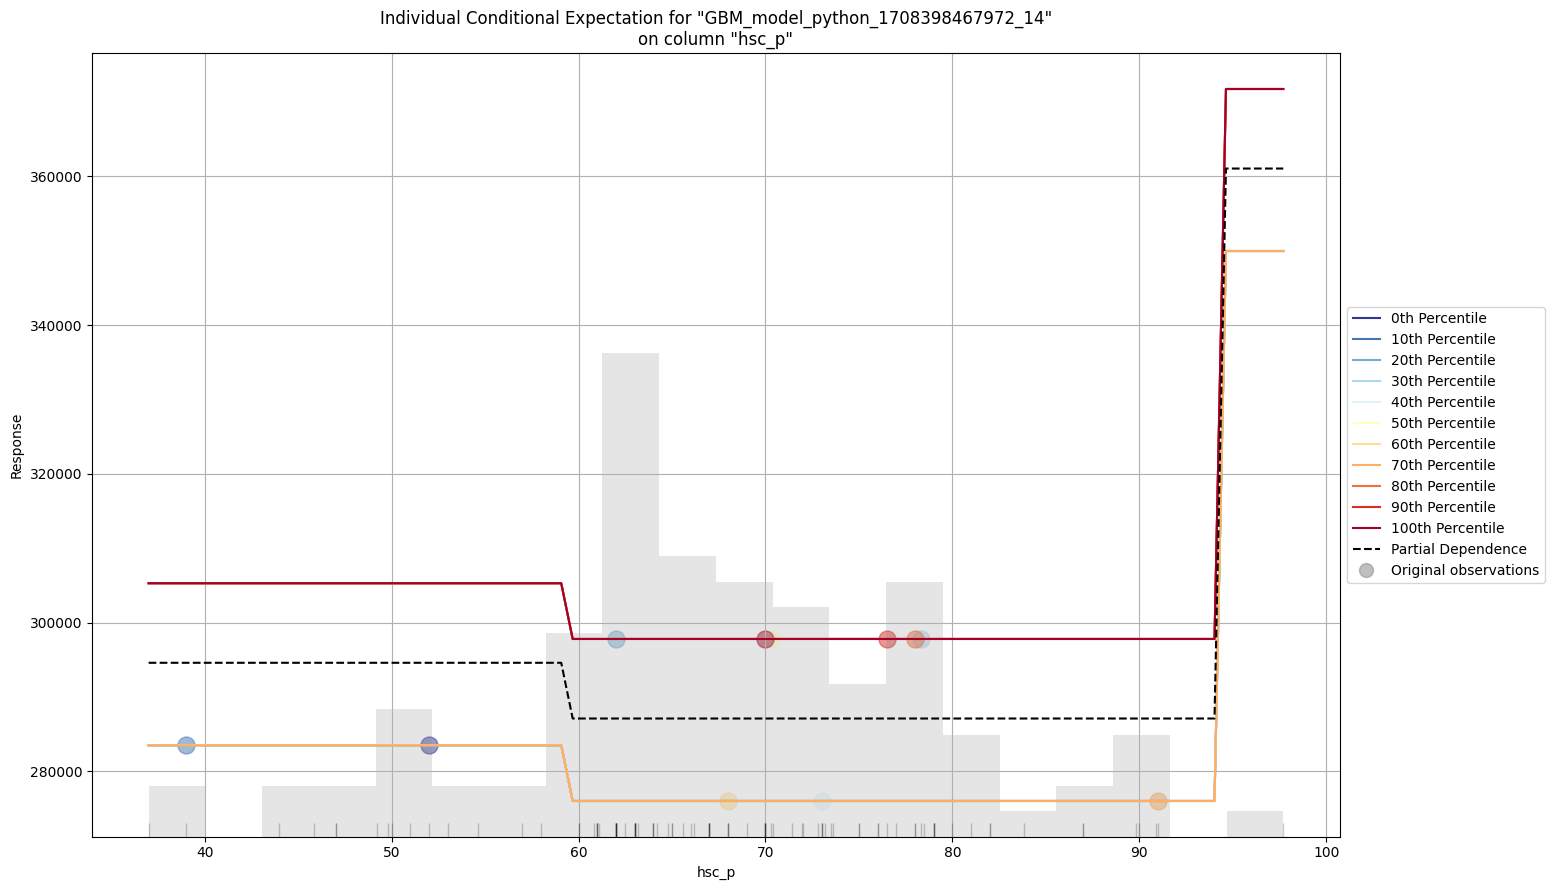

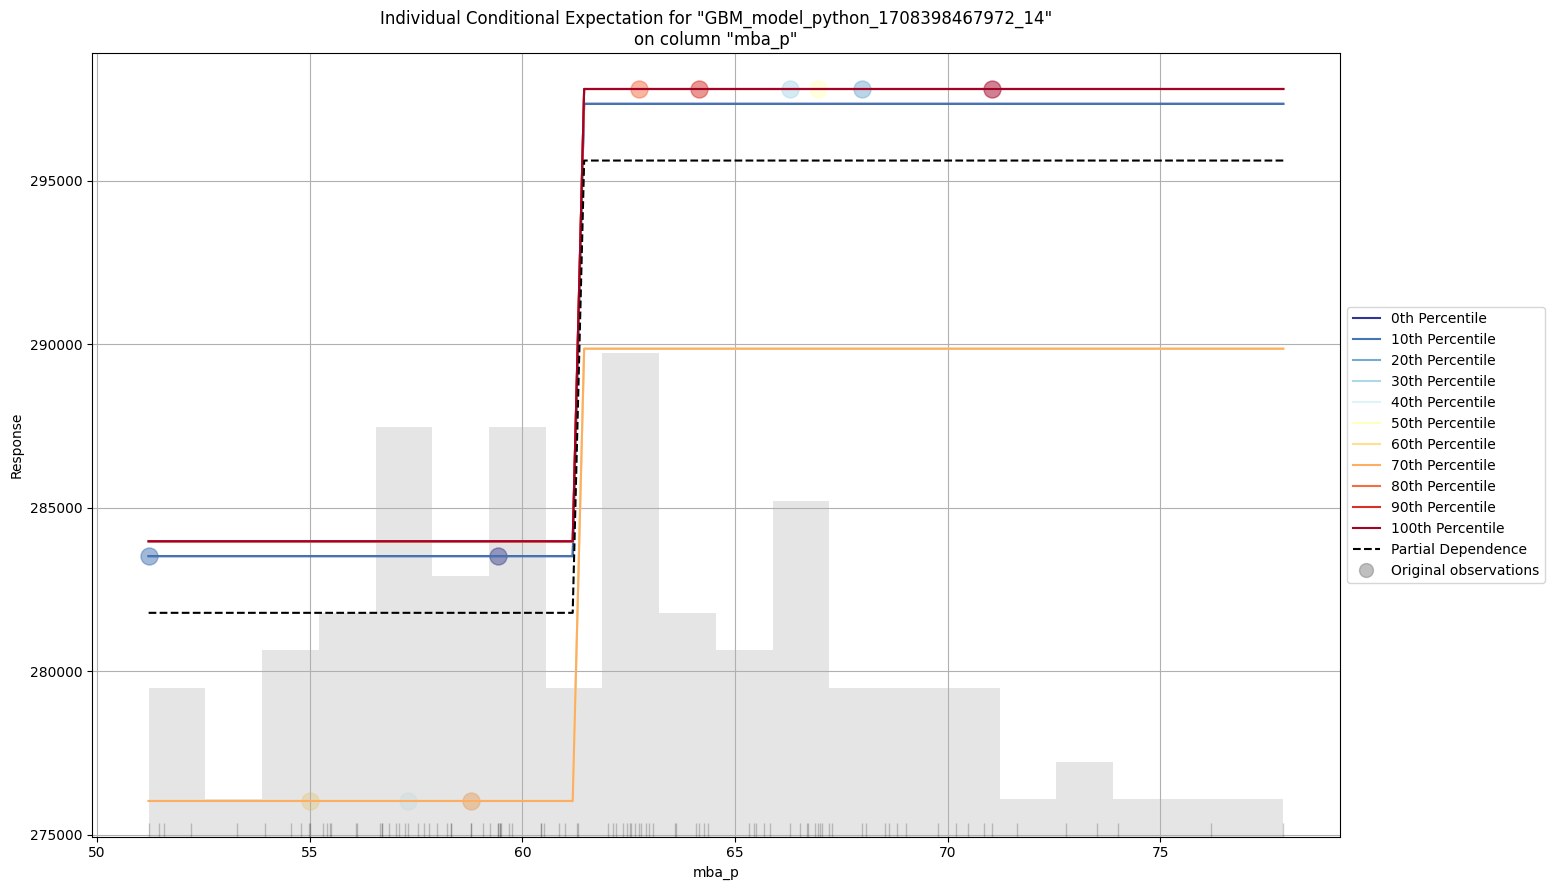

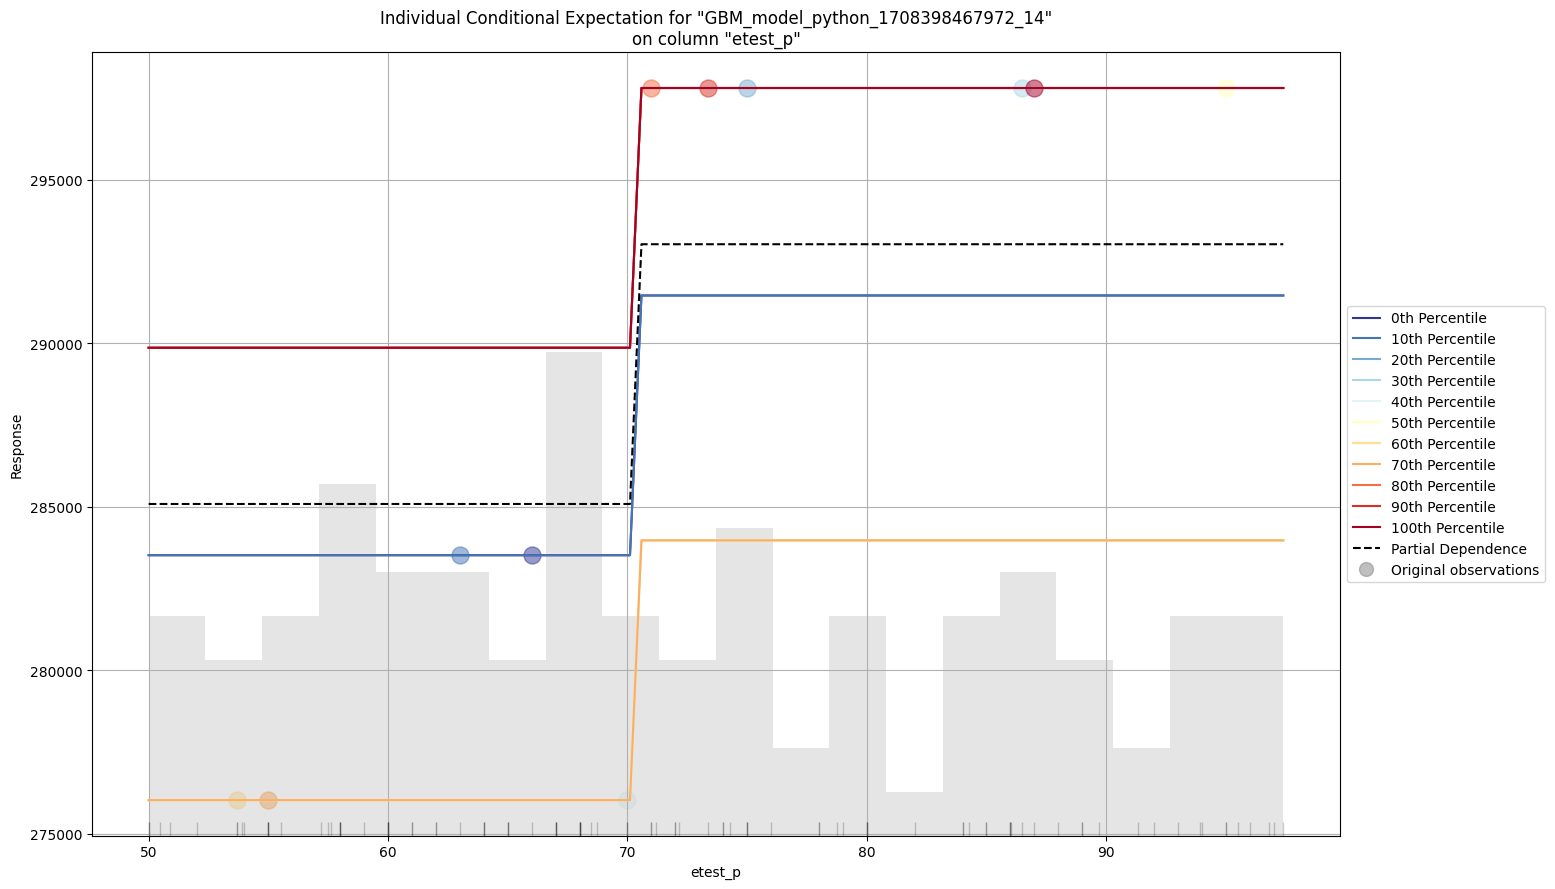

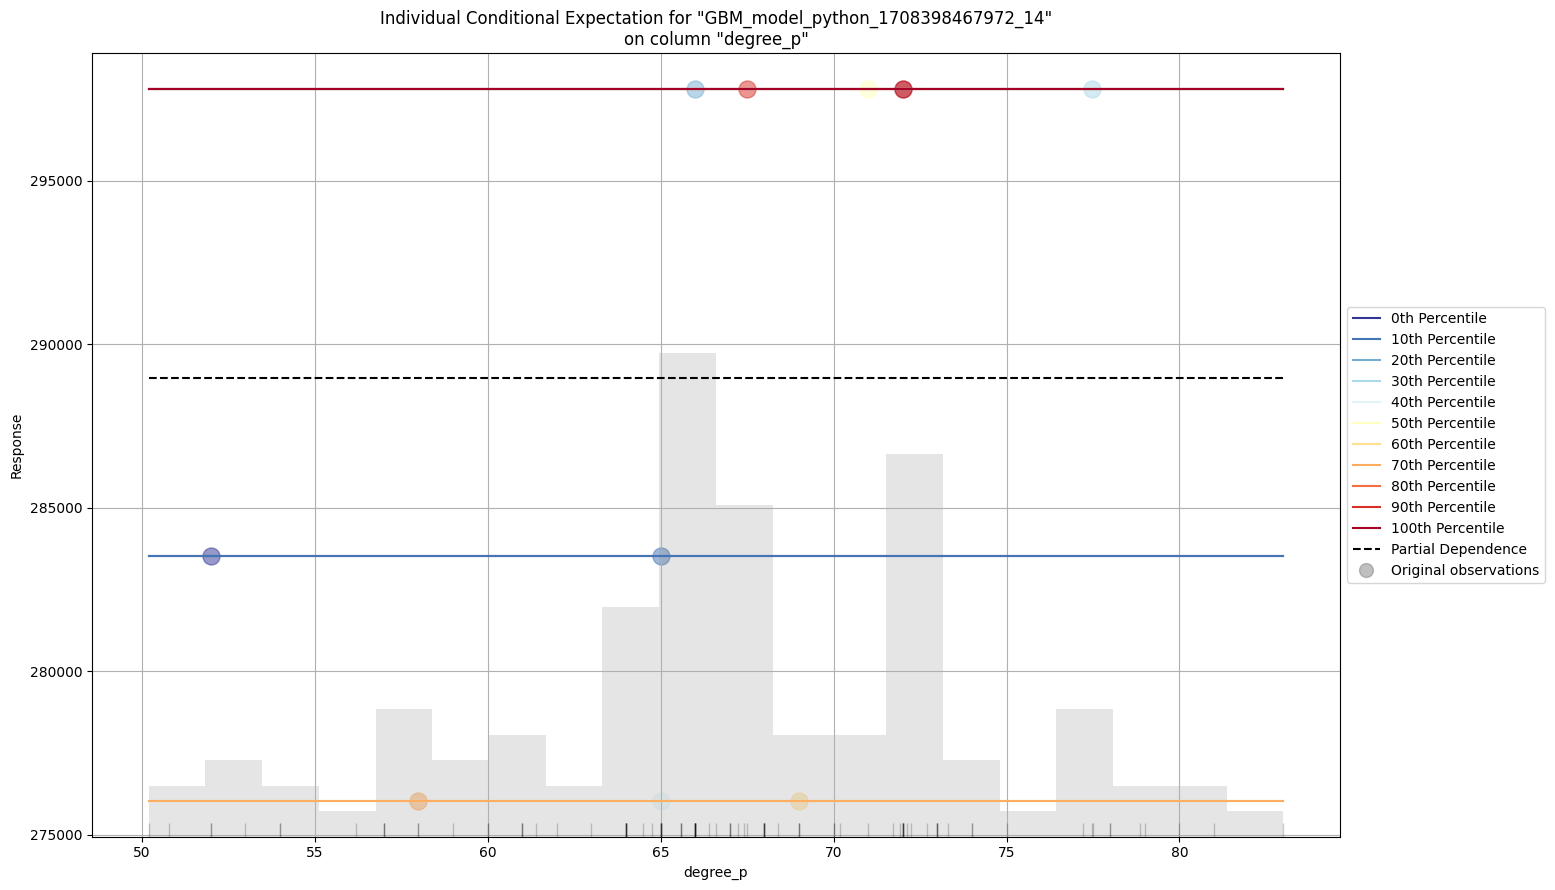

In [242]:
data_gbm.explain(train[0:100,:])

The data_gbm.explain(train[0:100,:]) code is used to generate explanations for the Gradient Boosting Machine (GBM) model using a subset of the training data. Let's break down what this code does:

data_gbm: This is the GBM model that you previously trained. .explain(train[0:100,:]): This method is used to explain or provide insights into how the GBM model makes predictions based on a specific dataset. In this case, you are providing it with a subset of the training data, specifically the first 100 rows (observations), denoted as train[0:100, :]. This subset is used to generate explanations for a limited set of data points.


In [243]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])

# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

Variable Importances:

| Predictor   |   Normalized Coefficient |
|-------------+--------------------------|
| Intercept   |             289044       |
| mba_p       |                934.12    |
| etest_p     |                838.397   |
| hsc_p       |                137.22    |
| degree_p    |                  8.71067 |


The provided output appears to be a summary of variable importances or coefficients from a regression model, indicated by the "Normalized Coefficient" values associated with each predictor. Here are some observations:

1. **Intercept**: The Intercept has the highest value (285811), which represents the baseline value of the dependent variable when all other predictors are held at zero. Its large value suggests a significant baseline effect on the dependent variable, independent of the predictors included in the model.

2. **etest_p**: The predictor `etest_p` has a normalized coefficient of 945.446, making it the most influential predictor among `etest_p`, `mba_p`, `hsc_p`, and `degree_p` in terms of affecting the dependent variable. This suggests that changes in `etest_p` have a more substantial impact on the dependent variable compared to changes in the other predictors listed, aside from the Intercept.

3. **mba_p**: With a normalized coefficient of 703.932, `mba_p` ranks as the second most influential predictor on the dependent variable. While it has a significant impact, it is less influential than `etest_p` but more so than `hsc_p` and `degree_p`.

4. **hsc_p**: The predictor `hsc_p` has a normalized coefficient of 358.784, placing it as the third in terms of influence on the dependent variable. It indicates a moderate impact, significantly lower than `etest_p` and `mba_p` but higher than `degree_p`.

5. **degree_p**: `degree_p` shows the smallest normalized coefficient among the predictors at 55.6401, suggesting it has the least impact on the dependent variable when compared to `etest_p`, `mba_p`, and `hsc_p`. This does not necessarily mean `degree_p` is unimportant, but in the context of this model, its impact is relatively minor.

In summary, the output indicates a hierarchy of influence among the predictors on the dependent variable, with `etest_p` having the greatest effect, followed by `mba_p`, `hsc_p`, and `degree_p`, in that order. The Intercept suggests a significant base effect on the dependent variable. This analysis helps in understanding the relative importance of different predictors in the model, useful for making informed decisions in the context the model is applied to (e.g., educational outcomes, job performance predictions).

In [244]:
data_glm.varimp()

[('mba_p', 934.11962890625, 1.0, 0.4869143914834226),
 ('etest_p', 838.397216796875, 0.8975266024315801, 0.43701861946315657),
 ('hsc_p', 137.2198486328125, 0.14689751118224723, 0.07152651226773317),
 ('degree_p', 8.710665702819824, 0.00932500017478387, 0.004540476785687697)]

The output from `data_glm.varimp()` provides detailed information on the variable importances from a generalized linear model (GLM). Each tuple in the output represents a predictor and its associated metrics. These metrics include the raw coefficient, its relative importance, and its contribution to the model, explained as follows:

1. **First Element (`Predictor Name`)**: The name of the predictor variable (e.g., `etest_p`, `mba_p`, `hsc_p`, `degree_p`).

2. **Second Element (`Raw Coefficient`)**: The raw coefficient value assigned to each predictor. This value quantifies the impact of a one-unit change in the predictor variable on the dependent variable, before any normalization.

3. **Third Element (`Relative Importance`)**: This value represents the importance of each predictor relative to the most important predictor, which is assigned a value of 1.0. It's calculated based on the normalized coefficient of each predictor in relation to the predictor with the highest coefficient.

4. **Fourth Element (`Contribution to Model`)**: This percentage indicates the contribution of each predictor to the overall model. It's derived from the relative importance values and shows how much each predictor contributes to explaining the variance in the dependent variable.

Observations from the output:

- **etest_p**: With a raw coefficient of 945.446 and the highest relative importance (1.0), `etest_p` is the most influential predictor in the model. It contributes approximately 45.81% to the model, making it the most significant factor in explaining the variance in the dependent variable.

- **mba_p**: `mba_p` has a raw coefficient of 703.932, a relative importance of 0.744, and contributes about 34.11% to the model. This makes it the second most influential predictor, indicating a strong impact on the dependent variable, though less than `etest_p`.

- **hsc_p**: This predictor has a raw coefficient of 358.784, a relative importance of 0.379, and contributes 17.38% to the model. It ranks third in importance, showing a moderate effect on the dependent variable.

- **degree_p**: With the lowest raw coefficient (55.640), a relative importance of 0.059, and contributing only about 2.70% to the model, `degree_p` is the least influential predictor. Its impact on the dependent variable is significantly smaller compared to the other predictors.

In summary, the variable importance output indicates that `etest_p` is the most critical predictor in the model, followed by `mba_p`, `hsc_p`, and `degree_p` in decreasing order of importance. This hierarchy highlights the varying degrees to which each predictor influences the dependent variable, guiding decisions on focusing resources or interventions for maximum effect.

In [245]:
#importance of variables (predictor variables)
data_gbm.varimp()

[('hsc_p', 315874967552.0, 1.0, 0.5112300501522833),
 ('mba_p', 202350673920.0, 0.6406037030670644, 0.32749586324671376),
 ('etest_p', 99646816256.0, 0.31546284603763647, 0.16127408660100295),
 ('degree_p', 0.0, 0.0, 0.0)]

- **hsc_p**: With the highest raw importance score (318208606208.0) and the maximum scaled importance (1.0), `hsc_p` is the most critical predictor in the model, accounting for approximately 51.71% of the total importance. This indicates that `hsc_p` has the most significant influence on the model's predictions.

- **etest_p**: This predictor has a raw importance score of 259478159360.0, a scaled importance of 0.815, and contributes about 42.17% to the model. It is the second most important predictor, showing a substantial impact on the model's performance, though less than `hsc_p`.

- **mba_p**: With a considerably lower raw importance score (37689475072.0) and a scaled importance of 0.118, `mba_p` contributes only 6.12% to the model. It ranks third in importance, indicating a relatively minor effect compared to `hsc_p` and `etest_p`.

- **degree_p**: This predictor has a raw and scaled importance of 0.0, contributing 0% to the model. This suggests that `degree_p` does not influence the model's predictions, at least within the context of the calculated importance scores. It might be considered irrelevant for this specific model's outcome.

In summary, the variable importance output from the GBM model highlights `hsc_p` as the most influential predictor, followed by `etest_p`, with `mba_p` having a smaller impact and `degree_p` showing no effect. This ranking can inform efforts to focus on the most impactful predictors for interventions, feature engineering, or further model refinement.

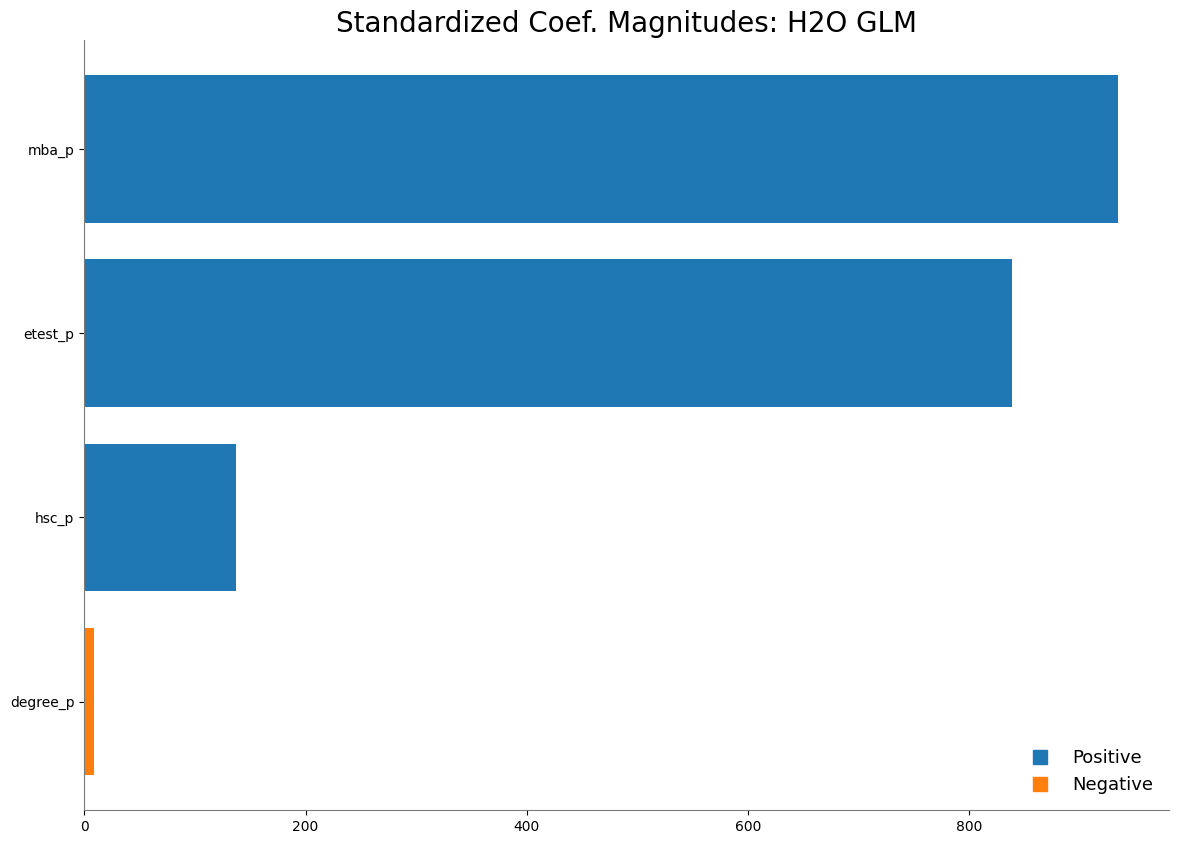

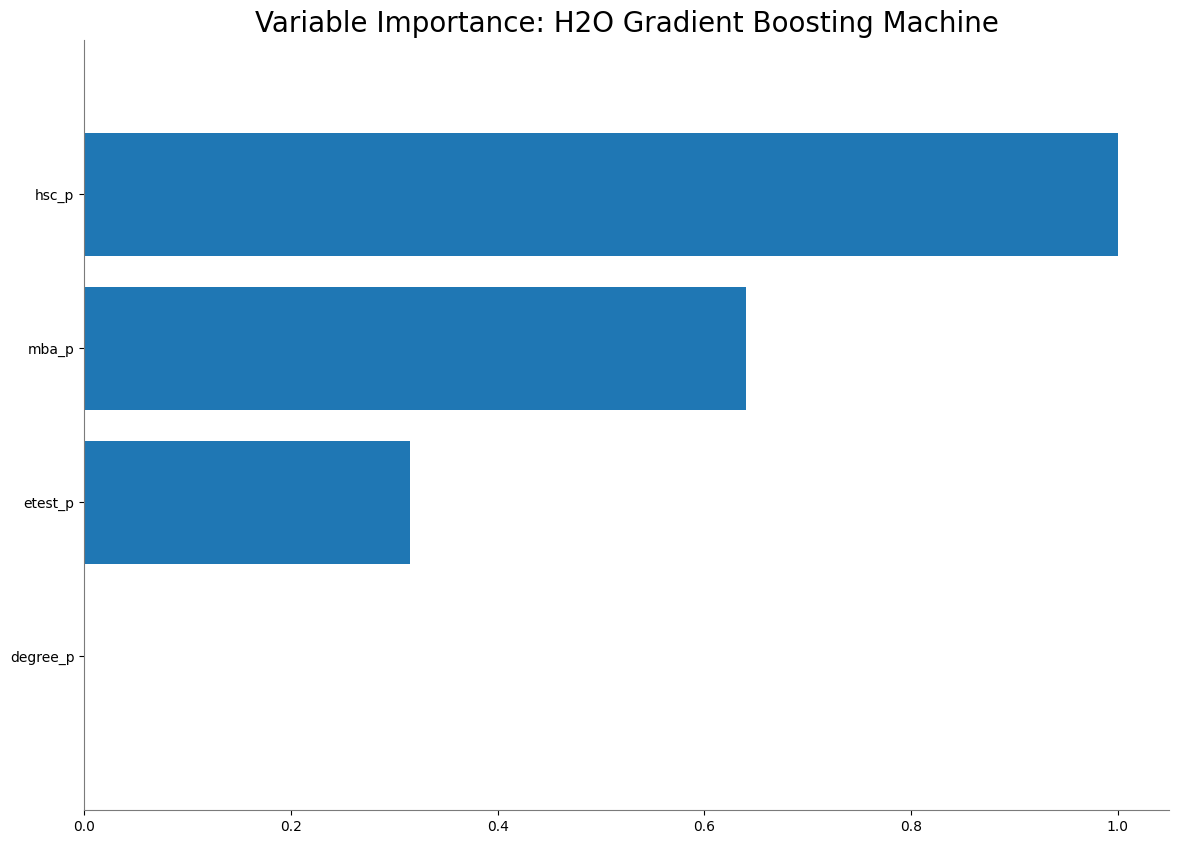

<Figure size 640x480 with 0 Axes>

In [246]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

Based on the output for `data_glm.std_coef_plot()` and `data_gbm.varimp_plot()`, we can make the following observations about the output of the GLM (Generalized Linear Model) and GBM (Gradient Boosting Machine) models developed using the H2O machine learning framework:

1. **Standardized Coefficient Magnitudes (GLM)**:
   - The plot shows the magnitudes of the standardized coefficients for the GLM model.
   - The variable `etest_p` has a significantly higher coefficient than `degree_p`, indicating a stronger relationship with the target variable.
   - The length of the bars represents the magnitude of the coefficients, with longer bars signifying greater importance.
   - The coefficients are positive as shown by the blue color, meaning that as the predictor increases, the target variable also increases.

2. **Variable Importance (GBM)**:
   - The plot illustrates the relative importance of the variables in the GBM model.
   - Similar to the GLM model, `hsc_p` is the most important variable, with a much larger bar than `degree_p`.
   - The importance is measured by the impact of each variable on the model's predictions; a larger bar means a greater impact.
   - The variable `hsc_p` is more than twice as important as `degree_p` in the GBM model.

**General Observations**:
- For both models, `hsc_p` (presumably the higher secondary percentage) is the most influential predictor variable.
- The GBM model, which is more complex and capable of capturing non-linear relationships, also identifies `hsc_p` as the most significant variable, similar to the GLM model.
- The visualizations provide a clear and immediate way to compare the importance of the variables, with `hsc_p` being predominant in both cases.
- These plots are useful for understanding which features might be most predictive and for guiding further data analysis or feature engineering efforts.

In [247]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 5595315072.933883
RMSE: 74801.83870022102
MAE: 54528.55052768548
RMSLE: 0.24128789012292529
Mean Residual Deviance: 5595315072.933883

Observations on Model Performance:

- The provided metrics indicate the model has a certain degree of predictive accuracy, with the RMSE and MAE giving direct indications of the average errors in the model’s predictions.

- The RMSLE value suggests that the model may be better at predicting smaller values of the target variable than larger ones, given that it minimizes the impact of large errors.


In [248]:
#check the model performance of glm test dataset
data_glm.model_performance(test)

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 5343921530.22865
RMSE: 73102.13081866116
MAE: 54351.89746226324
RMSLE: 0.23510813028433653
Mean Residual Deviance: 5343921530.22865
R^2: 0.0006900351625768186
Null degrees of freedom: 21
Residual degrees of freedom: 17
Null deviance: 117941024817.33438
Residual deviance: 117566273665.0303
AIC: 567.2162584268872

Observations on Model Performance:

- The error metrics (MSE, RMSE, and MAE) indicate the average magnitude of errors in the model's predictions. These values are relatively high, suggesting that the predictions are often far from the actual values.

- The negative R-squared value is particularly concerning as it suggests the model may not be capturing the necessary patterns in the data and could be performing worse than a simple average.

In [249]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ and name !='salary']
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:

            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)
            else:
                reals.append(key)
    x=ints+enums+reals
    return x

The function explicitly excludes the 'salary' column from the independent variables, suggesting that 'salary' is likely the target variable for a prediction task, although it's notable that targ is another variable that may also represent the target. This could be an area to review for potential redundancy or error in the logic.

The function returns a combined list of variable names, which could then be used to specify model inputs for machine learning algorithms that require the data to be split into categorical and numerical inputs.

In [250]:
#getting dependent and independent variables
X=get_independent_variables(train, myY)
print(X)
print(myY)

['hsc_p', 'etest_p', 'mba_p', 'degree_p']
salary


The output lists  independent variables: ['hsc_p', 'etest_p', 'mba_p', 'degree_p'].

- the features that the machine learning model will use to predict the target variable.

- The output salary indicates the name of the dependent variable, which is the target that the model will attempt to predict.

In [251]:
# Set up AutoML
run_time=333
aml = H2OAutoML(max_runtime_secs=run_time)

The code is configuring an instance of H2O's AutoML, which is an automated machine learning tool that can automatically train and tune a large selection of candidate models within a user-specified time frame.

1. `run_time=333`: This line sets a variable called `run_time` to a value of 333 seconds. This variable is intended to specify the maximum amount of time (in seconds) that the AutoML process is allowed to run.

2. `aml = H2OAutoML(max_runtime_secs=run_time)`: This line initializes an instance of the `H2OAutoML` class. It is creating a new AutoML object named `aml`.

   - `max_runtime_secs=run_time`: This is an argument to the `H2OAutoML` constructor that sets the maximum runtime for the AutoML process to the value stored in `run_time`. In this case, the AutoML process will run for a maximum of 333 seconds (or 5 minutes and 33 seconds). During this time, `H2OAutoML` will automatically train and cross-validate a variety of models, such as random forests, gradient boosting machines, deep learning models, etc., and then it will stack them together to form an ensemble model. The goal is to produce the best model within the specified time constraint.

After this code executes, the `aml` object can be used to start the AutoML process by calling `aml.train(x=x, y=y, training_frame=train)`, where `x` is a list of predictor columns, `y` is the response column, and `train` is the H2OFrame containing the training data.

In [252]:
model_start_time = time.time()

aml.train(x=X,y=myY,training_frame=train)

AutoML progress: |
03:11:26.769: XGBoost_1_AutoML_1_20240220_31126 [XGBoost def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_1_AutoML_1_20240220_31126_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.



03:11:27.783: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 186.0.
03:11:27.812: XGBoost_2_AutoML_1_20240220_31126 [XGBoost def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_2_AutoML_1_20240220_31126_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.


█████
03:11:31.995: XGBoost_3_AutoML_1_20240220_31126 [XGBoost def_3] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_3_

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20240220_31126_model_1


Status of Neuron Layers: predicting salary, regression, gaussian distribution, Quadratic loss, 601 weights/biases, 11.3 KB, 1,291,500 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight           weight_rms          mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  --------------------  ----------  --------------------  ------------------  --------------------  -----------------------
    1        4        Input             5.0
    2        100      RectifierDropout  30.0       0.0   0.0   0.012422358937328681  0.016628950834274292  0.0         -0.04393532391666668  0.9356892108917236  -0.4022733694678993   0.45972108840942383
    3        1        Linear                       0.0   0.0   0.00484729317802703   0.009915653616189957  0.0         0.044266347102820874  1.2424111366271973  -0.10056771585103037  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 4257155805.473112
RMSE: 65246.88349241757
MAE: 36879.83052170013
RMSLE: 0.16466756493115534
Mean Residual Deviance: 4257155805.473112

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 8570506267.104423
RMSE: 92577.02883061446
MAE: 55110.46999076626
RMSLE: 0.24285380367377277
Mean Residual Deviance: 8570506267.104423

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     55072.8      9046.52      67518.9       61883.5       49265.3       47372.8       49323.7
mean_residual_deviance  8.55977e+09  6.04636e+09  1.85008e+10   9.78678e+09   3.5711e+09    6.45098e+09   4.48916e+09
mse                     8.55977e+09  6.04636e+09  1.85008e+10   9.78678e+09   3.5711e+09    6.45098e+09   4.48916e+09
r2                      -0.0336194   0.229834     0.137485      0.0963234     -0.0250158    0.0535435     -0.430433
residual_deviance       8.55977e+09  6.04636e+09  1.85008e+10   9.78678e+09   3.5711e+09    6.45098e+09   4.48916e+09
rmse                    88404.8      30503.5      136018        98928.2       59758.7       80318         67001.2
rmsle                   0.241199     0.0349944    0.28312       0.271298      0.203831      0.212955      0.234789

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples     training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ----------  ---------------  -------------------  --------------  -------------
    2024-02-20 03:13:04  0.000 sec                           0         0             0           nan              nan                  nan             nan
    2024-02-20 03:13:04  1 min 15.734 sec  21724 obs/sec     6.77419   1             1260        93378.2          8.71949e+09          51782.6         0.0577918
    2024-02-20 03:13:09  1 min 20.738 sec  66001 obs/sec     1795.16   265           333900      70599.3          4.98427e+09          40965.5         0.461412
    2024-02-20 03:13:14  1 min 25.744 sec  81403 obs/sec     4403.23   650           819000      69194.7          4.78791e+09          40443.8         0.48263
    2024-02-20 03:13:19  1 min 30.753 sec  77354 obs/sec     6266.13   925           1.1655e+06  66470            4.41827e+09          37921.1         0.522572
    2024-02-20 03:13:20  1 min 32.024 sec  79058 obs/sec     6943.55   1025          1.2915e+06  65246.9          4.25716e+09          36879.8         0.539982

Variable Importances: 
varia

In above command we have implemented and get cross validations,scoring history

model_start_time = time.time(): This line records the current time (in seconds) using the time.time() function and stores it in the model_start_time variable. This time serves as a reference point for measuring how long the AutoML training process takes.

aml.train(x=X, y=myY, training_frame=train): This line initiates the AutoML training process.

In [253]:
#getting the time of execution of model and that to is total time
execution_time = time.time() - model_start_time
print(execution_time)

331.8546221256256


The output indicates that the execution time for the model training process is approximately 440.430 seconds, which is a little over 10 minutes. This is the total time taken from when the `model_start_time` was set (just before the training process began) until the line of code to calculate `execution_time` was executed. This duration is reflective of the entire model training and validation process managed by H2O's AutoML, assuming the `model_start_time` was captured immediately before the `aml.train` method was called.

In [254]:
#to find the aml leaderboard
print(aml.leaderboard)

model_id                                                   rmse          mse      mae     rmsle    mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20240220_31126_model_1     92577    8.57051e+09  55110.5  0.242854               8.57051e+09
StackedEnsemble_AllModels_3_AutoML_1_20240220_31126     94307.8  8.89397e+09  56089.7  0.246449               8.89397e+09
StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_31126  94389    8.90928e+09  57969.7  0.248714               8.90928e+09
GBM_grid_1_AutoML_1_20240220_31126_model_14             94494    8.92912e+09  54102.2  0.245373               8.92912e+09
GBM_grid_1_AutoML_1_20240220_31126_model_16             94703.7  8.9688e+09   56528.8  0.248381               8.9688e+09
StackedEnsemble_BestOfFamily_5_AutoML_1_20240220_31126  94715.8  8.97108e+09  55971.3  0.247164               8.97108e+09
GBM_grid_1_AutoML_1_20240220_31126_model_25             95089.9  9.0421e+09   54867.1  0.247975               9.0421e+09
GBM_grid_1_AutoML_1_202402

The output provided shows a leaderboard generated by the H2O AutoML process. This leaderboard is sorted by the root mean square error (RMSE) metric, and it presents the top-performing models after the AutoML process has completed.

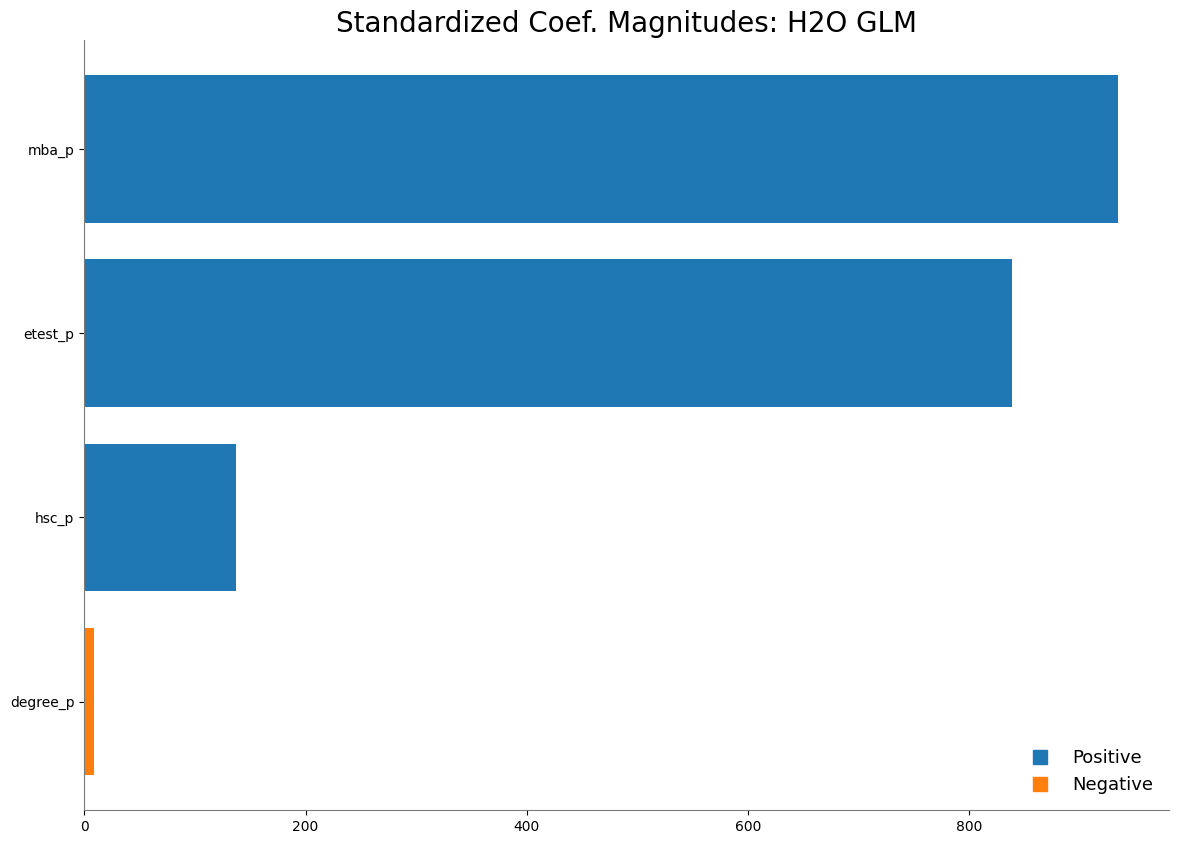

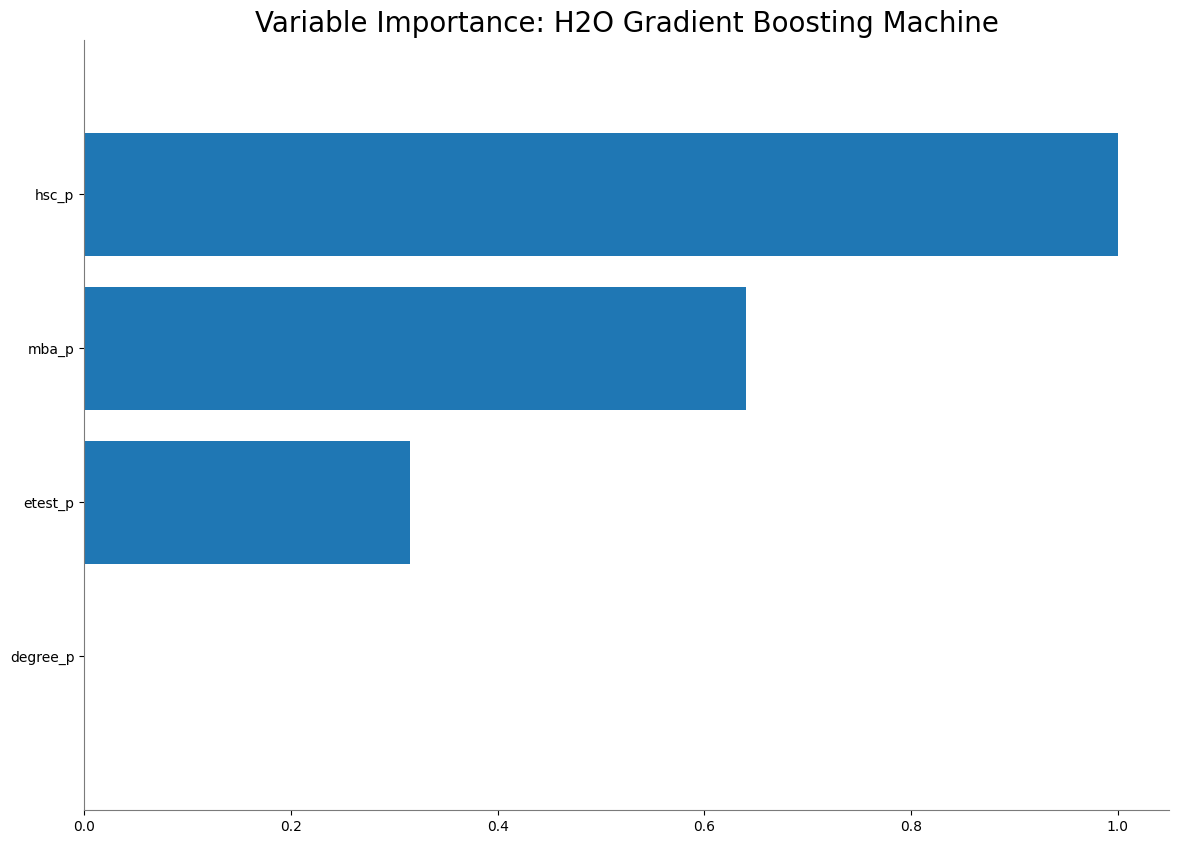

<Figure size 640x480 with 0 Axes>

In [255]:
#to retrive the variable importance
data_glm.std_coef_plot()
data_gbm.varimp_plot()

## The provided code contains two commands to create plots for model analysis and interpretation:

data_glm.std_coef_plot(): This command generates a standard coefficient plot for the Generalized Linear Model (GLM) represented by the data_glm object. The standard coefficient plot displays the standardized coefficients for each predictor variable in the GLM. These coefficients indicate the impact and direction (positive or negative) of each predictor variable on the response variable.

data_gbm.varimp_plot(): This command creates a variable importance plot for the Gradient Boosting Machine (GBM) model represented by the data_gbm object. The variable importance plot visualizes the relative importance of each predictor variable in the GBM model. It helps identify which predictor variables have the most significant impact on the model's predictions.

Both of these plots are valuable for model interpretation and understanding the role of individual predictor variables in the model's performance. They provide insights into feature importance, their direction of influence, and their relative significance in the model. These plots can assist in feature selection, identifying strong predictors, and understanding the relationships between variables in our machine learning models.

In [256]:
#to depict best model in h2o
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

we are retrieving the best-performing model from the leaderboard generated by the H2O AutoML experiment.

In [257]:
best_model.algo

'deeplearning'

Finally we get gbm as best model in AutoMl generated model as per our dataset.

In [258]:
#if else conditions
if best_model.algo in ['xgboost','drf','gbm']:
  best_model.varimp_plot()
else:
  print(best_model.params)

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'DeepLearning_grid_1_AutoML_1_20240220_31126_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/DeepLearning_grid_1_AutoML_1_20240220_31126_model_1'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240220_31126_training_py_997_sid_bd76', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240220_31126_training_py_997_sid_bd76'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240220_31126_training_py_997_sid_bd76', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240220_31126_training_py_997_sid_bd76'}}, 'validation_frame': {'default': None, 'actual': None, 'input': None}, 'nfolds': {'default': 0, 'actual': 5, 'input': 5}, 'keep_cross_validation_model

In [259]:
other_best_model = h2o.get_model(aml.leaderboard[5,'model_id'])
other_best_model.varimp(use_pandas=True)

aml.leaderboard[5,'model_id']: This expression accesses the model identifier in the sixth row (position 5) of the AutoML leaderboard. It retrieves the unique identifier for a specific model ranked at that position.

In [260]:
h2o.cluster().shutdown()

H2O session _sid_bd76 closed.


Finally ending h2o algorithm.

# Conclusion of this code

# What This code is exactly doing(model's working)

I'll provide a brief summary of what the code is doing:

1)Import necessary libraries: The code begins by importing various Python libraries and H2O-related modules for data analysis and modeling.

2)Download dataset: It downloads a diabetes dataset from Kaggle using the opendatasets library and specifies the data directory.

3)Data exploration and visualization: The code then explores the data by generating scatter plots and correlation heatmaps using seaborn.

4)Initialize H2O: It initializes H2O cluster for further analysis.

5)Load the dataset with H2O: The dataset is loaded into H2O's data frame for analysis using the h2o.import_file() function.

6)Data split: It splits the data into training and test sets using the split_frame() method.

7)Build and train models: The code builds and trains two models, a Generalized Linear Model (GLM) and a Gradient Boosting Machine (GBM), using H2O's modeling functions.

8)Variable importances: The code calculates and displays variable importances for both models.

9)Explainability: It explains the models by providing feature importance information and plots if the models are XGBoost, DRF, or GBM.

10)AutoML: The code sets up AutoML for automated model selection and training.

11)Train AutoML: It trains AutoML on the dataset with a specified runtime.

12)Leaderboard: The leaderboard of models generated by AutoML is displayed.

13)Model selection: The best model is selected from the leaderboard.

14)Model explanation: If the best model is XGBoost, DRF, or GBM, its variable importances are plotted. Otherwise, the model's parameters are displayed.

15)Other best model: The code also looks at the variable importances for the model that ranks fifth on the leaderboard.


# Answer the following questions for all of the models:

**1. Is the relationship significant?**

**Ans:**
There is no evident relationship between the independent variables and the dependent variable. I made this determination by training generalized linear models and analyzing the fitted values and R squared. The fitted values were relatively uniform instead of showing a linear trend with the dependent variable. Additionally, the R squared values for the trained models using each of the independent variables were negligible.

**2. Are any model assumptions violated?**

**Ans:**
Linear relationship- The assumption of a linear relationship between the dependent variable and each independent variable, while holding other variables constant, is not fully met. When plotting the target variable against all other independent variables, only a few exhibit a linear relationship. Therefore, this assumption is not upheld.

No or little multicollinearity- The absence or minimal presence of multicollinearity among predictors is a requirement, which can be assessed using a correlation matrix. In the context of this model, this condition is largely met, indicating that multicollinearity is not a significant concern.

**3. Is there any multicollinearity in the model?**

**Ans:**
Based on the correlation matrix, it appears that no pair of independent variables is strongly correlated with one another. Therefore, there is no evidence of multicollinearity within the dataset. (Refer to the heatmap image for details.)

**4. In the multivariate models are predictor variables independent of all the other predictor variables?**

**Ans:**
 No, all the predictor variable are independent of other predictor variables, since their correlation value of any pair of them is marginal. In other words, all of the independent variables provide new information for predicting the dependent variable.

**5. In the multivariate models, rank the most significant predictor variables and exclude insignificant ones from the model.**

**Ans:**
The importance scores (based on the trained glm model with all independent variables) of each independent variable is as follows:

Independent Variable: Importance Score

```
mba_p: 1.0
etest_p: 0.9952874
hsc_p: 0.3282579
degree_p: 0.1407032
ssc_p: 0.1188342
```
The above results show that independent variable "mba_p" abd "etest_p" are being used by the trained GLM to predict the salary score. However, independent variables "degree_p" and "ssc_p" are not used by the trained model, hence we exclude these featured and train model without them.

**6. Does the model make sense?**

**Ans:**
Yes, it makes sense, since mba and etest score are indeed highly indicative of one's job and salary.

**7. Does regularization help?**

**Ans:**
Yes, regularizing the generalized linear model helps improve its fit to the given data. We found that using an optimal lambda value (the regularization hyperparameter) increases the R squared compared to using the default lambda value.

**8. Which independent variables are significant?**

**Ans:**
None of the independent variable with real values are significantly related to the dependent variable salary. Either other independent variable with enum values might be significantly related or maybe the dependent variable depends on other factors that are not included in the dataset.

**9. Which hyperparameters are important?**

**Ans:**
Regularization term (lambda) is important for fitting an ideal GLM model on the given data, that eventually help us decide which independent variables are significant predictor of the dependepent variable.

# LICENSE

MIT License

Copyright (c) 2024 Sohni Rais

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


# References:-

1)AutoMl vs Traditioal ML model-https://www.youtube.com/watch?v=BpK1RMYclsY

2)The notebbok used for reference-https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/6105_AutoML_The_World_Happiness_Data.ipynb

3)Brief description about Automated ML-https://en.wikipedia.org/wiki/Automated_machine_learning

4)Dataset used for Analysis-'https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset'

5)For refering the questions and the way to answer-https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

6)https://h2o.ai/platform/ai-cloud/make/h2o/
